<a href="https://colab.research.google.com/github/ivanshauck/ivanshauck/blob/main/CAPSTONE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  The purpose of this project is to determine factors that can influence whether or not an icu patient dies. The data comes from kaggle, it has about 91,700 rows and 85 columns. There are a variety of medical stats from various blood pressure readings, to what are known as apache scores. Apache scores are used in hospitals and icu's to assess the severity of a patient's condition, together they also lead to the apache 4a hospital death and apache 4a icu death probability values, which will also be amongst the features in this dataset. The target variable is hospital_death, 0 means the patient survived and 1 means they did not. The data I got from kaggle (https://www.kaggle.com/datasets/mitishaagarwal/patient) was an abriged version of a dataset used for a kaggle competition in 2020 (https://www.kaggle.com/competitions/widsdatathon2020/overview). The data was drawn from a variety of ICU's in multiple countries, including 200 hospitals in the U.S.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

  To begin with we upload the data and then stratify it into a training set, and a test set that comprise 60% and 40% of the data, respectively. This is done to test out models trained on undersampled data and oversampled data, something that was done to try and mitigate the effect of having an unbalanced dataset(there were far more patients who survived than died).

In [ ]:
data = pd.read_csv(r'C:\Users\450G2\OneDrive\Documents\dataset.csv')

In [ ]:
y = data['hospital_death']
X = data

xtrain, xtest, ytrain, ytest = train_test_split(X,y,stratify=y,test_size=0.4)

In [ ]:

xtrain.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
49846,31865,661,24,81.0,26.393430,0,African American,M,180.30,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
16754,94163,107383,76,47.0,26.597686,0,Hispanic,F,165.10,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
22487,30784,53857,147,61.0,25.308642,0,Caucasian,M,180.00,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
8415,64848,10870,137,83.0,23.831131,0,Caucasian,F,149.86,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
43912,49853,19163,87,20.0,20.576132,0,Caucasian,F,162.00,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0


In [ ]:
xtest.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
91346,15057,106379,30,57.0,27.493071,0,Caucasian,F,157.50,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0
16518,45464,56172,98,48.0,23.776527,0,Caucasian,M,187.96,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
41492,122419,819,186,31.0,27.932099,0,Caucasian,M,180.00,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
15778,89006,10403,116,49.0,21.445786,1,Caucasian,F,162.60,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,1.0,Gastrointestinal,Gastrointestinal,NaN,0
60302,20334,22240,39,79.0,23.428592,1,Caucasian,M,167.00,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0


Next I will calculate the ratio of instances where the patients survived to the total number of patients for each of the two datasets that were separated by stratification. This is just to ensure that both have a similar percentage of each class for the target variable.

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(55027, 85)
(36686, 85)


In [ ]:
ratio1 = xtrain.loc[xtrain['hospital_death']==0].count()/55207
print(ratio1)
ratio2 = xtest.loc[xtest['hospital_death']==0].count()/36686
print(ratio2)

encounter_id                   0.910718
patient_id                     0.910718
hospital_id                    0.910718
age                            0.871375
bmi                            0.877697
                                 ...   
solid_tumor_with_metastasis    0.903690
apache_3j_bodysystem           0.894108
apache_2_bodysystem            0.894108
Unnamed: 83                    0.000000
hospital_death                 0.910718
Length: 85, dtype: float64
encounter_id                   0.913700
patient_id                     0.913700
hospital_id                    0.913700
age                            0.875157
bmi                            0.879818
                                 ...   
solid_tumor_with_metastasis    0.907104
apache_3j_bodysystem           0.897100
apache_2_bodysystem            0.897100
Unnamed: 83                    0.000000
hospital_death                 0.913700
Length: 85, dtype: float64


The stratified datasets have a similar percentage of the two target classes, so we may proceed.

In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 49846 to 24227
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   55027 non-null  int64  
 1   patient_id                     55027 non-null  int64  
 2   hospital_id                    55027 non-null  int64  
 3   age                            52485 non-null  float64
 4   bmi                            53008 non-null  float64
 5   elective_surgery               55027 non-null  int64  
 6   ethnicity                      54185 non-null  object 
 7   gender                         55010 non-null  object 
 8   height                         54263 non-null  float64
 9   icu_admit_source               54957 non-null  object 
 10  icu_id                         55027 non-null  int64  
 11  icu_stay_type                  55027 non-null  object 
 12  icu_type                       55027 non-n

In [ ]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36686 entries, 91346 to 58736
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   36686 non-null  int64  
 1   patient_id                     36686 non-null  int64  
 2   hospital_id                    36686 non-null  int64  
 3   age                            35000 non-null  float64
 4   bmi                            35276 non-null  float64
 5   elective_surgery               36686 non-null  int64  
 6   ethnicity                      36133 non-null  object 
 7   gender                         36678 non-null  object 
 8   height                         36116 non-null  float64
 9   icu_admit_source               36644 non-null  object 
 10  icu_id                         36686 non-null  int64  
 11  icu_stay_type                  36686 non-null  object 
 12  icu_type                       36686 non-n

Some of the categorical variables are already in 0 and 1 dummy variable form. For the ones that aren't we check to see how many unique categories there are. So as to avoid potentially having too many features after the one hot encoding that will be performed later.

In [ ]:
print('The number of different ethnicities is {}'.format(xtrain['ethnicity'].nunique()))
print('The number of apache 3 admission diagnosis groups is {}.'.format(xtrain['apache_3j_bodysystem'].nunique()))
print('The number of apache 2 admission diagnosis groups is {}'.format(xtrain['apache_2_bodysystem'].nunique()))
print('The number of types of places admits came from is {}'.format(xtrain['icu_admit_source'].nunique()))
print('The number of icu stay types is {}'.format(xtrain['icu_stay_type'].nunique()))
print('The number of different types of icu\'s is {}'.format(xtrain['icu_type'].nunique()))

The number of different ethnicities is 6
The number of apache 3 admission diagnosis groups is 11.
The number of apache 2 admission diagnosis groups is 10
The number of types of places admits came from is 5
The number of icu stay types is 3
The number of different types of icu's is 8


Next we create dummy variables, and leave one category out.

In [ ]:
traindummies = pd.get_dummies(xtrain[['ethnicity','apache_3j_bodysystem','apache_2_bodysystem','icu_admit_source',
                                     'icu_stay_type','icu_type','gender']],drop_first=True)

In [ ]:
traindummies.head()

,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,...,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M
49846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
16754,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22487,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8415,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
43912,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
xtrain1 = pd.concat([xtrain,traindummies],axis=1)

In [ ]:
xtrain1.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M
49846,31865,661,24,81.0,26.393430,0,African American,M,180.30,Accident & Emergency,...,0,0,0,0,0,0,1,0,0,1
16754,94163,107383,76,47.0,26.597686,0,Hispanic,F,165.10,Accident & Emergency,...,0,0,0,0,0,0,1,0,0,0
22487,30784,53857,147,61.0,25.308642,0,Caucasian,M,180.00,Accident & Emergency,...,0,0,0,0,0,0,1,0,0,1
8415,64848,10870,137,83.0,23.831131,0,Caucasian,F,149.86,Accident & Emergency,...,0,0,0,0,0,0,1,0,0,0
43912,49853,19163,87,20.0,20.576132,0,Caucasian,F,162.00,Accident & Emergency,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
xtrain1.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 49846 to 24227
Data columns (total 123 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    encounter_id                                55027 non-null  int64  
 1    patient_id                                  55027 non-null  int64  
 2    hospital_id                                 55027 non-null  int64  
 3    age                                         52485 non-null  float64
 4    bmi                                         53008 non-null  float64
 5    elective_surgery                            55027 non-null  int64  
 6    ethnicity                                   54185 non-null  object 
 7    gender                                      55010 non-null  object 
 8    height                                      54263 non-null  float64
 9    icu_admit_source                            54957 non-null  object

In [ ]:
xtrain1 = xtrain1.drop(xtrain1.columns[83],axis=1)
xtrain1 = xtrain1.select_dtypes(exclude=['object'])
pd.set_option('display.max_columns',None)
xtrain1.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M
49846,31865,661,24,81.0,26.393430,0,180.30,523,0.141667,85.80,108.0,203.01,0,0.0,NaN,NaN,1.0,NaN,63.0,1.0,53.0,38.0,NaN,1.0,72.0,45.0,72.0,45.0,86.0,63.0,88.0,53.0,88.0,53.0,38.0,0.0,100.0,93.0,117.0,69.0,117.0,69.0,NaN,NaN,66.0,50.0,66.0,50.0,86.0,73.0,77.0,58.0,77.0,58.0,38.0,15.0,100.0,99.0,100.0,75.0,100.0,75.0,125.0,125.0,3.2,3.2,0.28,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
16754,94163,107383,76,47.0,26.597686,0,165.10,290,0.105556,72.50,112.0,107.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,64.0,35.0,36.1,0.0,79.0,46.0,79.0,46.0,115.0,85.0,88.0,62.0,88.0,62.0,36.0,5.0,100.0,99.0,126.0,91.0,126.0,91.0,36.9,36.1,57.0,57.0,57.0,57.0,106.0,106.0,68.0,68.0,68.0,68.0,28.0,28.0,100.0,100.0,111.0,111.0,111.0,111.0,240.0,146.0,3.9,3.5,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
22487,30784,53857,147,61.0,25.308642,0,180.00,317,0.068750,82.00,109.0,108.01,0,0.0,4.0,6.0,0.0,5.0,52.0,0.0,76.0,8.0,36.5,0.0,84.0,63.0,84.0,63.0,83.0,54.0,101.0,78.0,101.0,78.0,21.0,8.0,98.0,92.0,158.0,126.0,158.0,126.0,37.0,36.5,78.0,64.0,78.0,64.0,75.0,54.0,78.0,78.0,78.0,78.0,17.0,16.0,98.0,92.0,145.0,128.0,145.0,128.0,100.0,100.0,NaN,NaN,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8415,64848,10870,137,83.0,23.831131,0,149.86,143,0.019444,53.52,113.0,502.01,0,1.0,3.0,6.0,0.0,5.0,97.0,0.0,47.0,11.0,38.5,0.0,52.0,30.0,52.0,30.0,74.0,68.0,67.0,49.0,67.0,49.0,20.0,11.0,100.0,90.0,115.0,83.0,115.0,83.0,38.5,37.7,48.0,48.0,48.0,48.0,69.0,69.0,NaN,NaN,NaN,NaN,11.0,11.0,90.0,90.0,107.0,107.0,107.0,107.0,98

Next we select variables that have already been converted into dummy variables (such as aids:0 for doesn't have and 1 for has), as well as gcs ratings. Gcs stands for Glasgow Coma Scale. Each score ranges from 1-4,1-5, or 1-6, with the highest score being the best (for example, for verbal, 5 is the best, and it means the patient is well oriented to their current time and space and responsive, a 1 means there is no response whatsoever). Here I'll be finding the mode for each of these columns.

In [ ]:
missing_categorical = xtrain1[['elective_surgery','apache_post_operative','arf_apache','gcs_eyes_apache',
                              'gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache','intubated_apache',
                              'ventilated_apache','aids','cirrhosis','diabetes_mellitus','hepatic_failure',
                              'immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis']]
for col in missing_categorical:
    print('{}{}'.format(col,missing_categorical[col].mode()))

elective_surgery0    0
dtype: int64
apache_post_operative0    0
dtype: int64
arf_apache0    0.0
dtype: float64
gcs_eyes_apache0    4.0
dtype: float64
gcs_motor_apache0    6.0
dtype: float64
gcs_unable_apache0    0.0
dtype: float64
gcs_verbal_apache0    5.0
dtype: float64
intubated_apache0    0.0
dtype: float64
ventilated_apache0    0.0
dtype: float64
aids0    0.0
dtype: float64
cirrhosis0    0.0
dtype: float64
diabetes_mellitus0    0.0
dtype: float64
hepatic_failure0    0.0
dtype: float64
immunosuppression0    0.0
dtype: float64
leukemia0    0.0
dtype: float64
lymphoma0    0.0
dtype: float64
solid_tumor_with_metastasis0    0.0
dtype: float64


Here we substitute missing values for the rating variables and the already existing dummy variables with the mode
of each column.

In [ ]:
xtrain1['gcs_eyes_apache'] = xtrain1['gcs_eyes_apache'].fillna(4.0)
xtrain1['gcs_motor_apache'] = xtrain1['gcs_motor_apache'].fillna(6.0)
xtrain1['gcs_verbal_apache'] = xtrain['gcs_verbal_apache'].fillna(5.0)
zero_columns = xtrain1[['elective_surgery','apache_post_operative','arf_apache','gcs_unable_apache',
                       'intubated_apache','ventilated_apache','aids','cirrhosis','diabetes_mellitus','hepatic_failure',
                       'immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis']]
for col in zero_columns:
    xtrain1[col] = xtrain1[col].fillna(0.0)

xtrain1.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M
49846,31865,661,24,81.0,26.393430,0,180.30,523,0.141667,85.80,108.0,203.01,0,0.0,4.0,6.0,1.0,5.0,63.0,1.0,53.0,38.0,NaN,1.0,72.0,45.0,72.0,45.0,86.0,63.0,88.0,53.0,88.0,53.0,38.0,0.0,100.0,93.0,117.0,69.0,117.0,69.0,NaN,NaN,66.0,50.0,66.0,50.0,86.0,73.0,77.0,58.0,77.0,58.0,38.0,15.0,100.0,99.0,100.0,75.0,100.0,75.0,125.0,125.0,3.2,3.2,0.28,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
16754,94163,107383,76,47.0,26.597686,0,165.10,290,0.105556,72.50,112.0,107.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,64.0,35.0,36.1,0.0,79.0,46.0,79.0,46.0,115.0,85.0,88.0,62.0,88.0,62.0,36.0,5.0,100.0,99.0,126.0,91.0,126.0,91.0,36.9,36.1,57.0,57.0,57.0,57.0,106.0,106.0,68.0,68.0,68.0,68.0,28.0,28.0,100.0,100.0,111.0,111.0,111.0,111.0,240.0,146.0,3.9,3.5,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
22487,30784,53857,147,61.0,25.308642,0,180.00,317,0.068750,82.00,109.0,108.01,0,0.0,4.0,6.0,0.0,5.0,52.0,0.0,76.0,8.0,36.5,0.0,84.0,63.0,84.0,63.0,83.0,54.0,101.0,78.0,101.0,78.0,21.0,8.0,98.0,92.0,158.0,126.0,158.0,126.0,37.0,36.5,78.0,64.0,78.0,64.0,75.0,54.0,78.0,78.0,78.0,78.0,17.0,16.0,98.0,92.0,145.0,128.0,145.0,128.0,100.0,100.0,NaN,NaN,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8415,64848,10870,137,83.0,23.831131,0,149.86,143,0.019444,53.52,113.0,502.01,0,1.0,3.0,6.0,0.0,5.0,97.0,0.0,47.0,11.0,38.5,0.0,52.0,30.0,52.0,30.0,74.0,68.0,67.0,49.0,67.0,49.0,20.0,11.0,100.0,90.0,115.0,83.0,115.0,83.0,38.5,37.7,48.0,48.0,48.0,48.0,69.0,69.0,NaN,NaN,NaN,NaN,11.0,11.0,90.0,90.0,107.0,107.0,107.0,107.0,98

In [ ]:
xtrain1.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 49846 to 24227
Data columns (total 115 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    encounter_id                                55027 non-null  int64  
 1    patient_id                                  55027 non-null  int64  
 2    hospital_id                                 55027 non-null  int64  
 3    age                                         52485 non-null  float64
 4    bmi                                         53008 non-null  float64
 5    elective_surgery                            55027 non-null  int64  
 6    height                                      54263 non-null  float64
 7    icu_id                                      55027 non-null  int64  
 8    pre_icu_los_days                            55027 non-null  float64
 9    weight                                      53422 non-null  float6

Next we drop the remaining non feature columns then replace the remainder of the missing values from the continous variables with the mean of each column.

In [ ]:
xtrain1 = xtrain1.drop(columns=['encounter_id','patient_id','hospital_id','apache_2_diagnosis','apache_3j_diagnosis'])
xtrain1 = xtrain1.fillna(xtrain1.mean())


In [ ]:
xtrain1.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 49846 to 24227
Data columns (total 110 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    age                                         55027 non-null  float64
 1    bmi                                         55027 non-null  float64
 2    elective_surgery                            55027 non-null  int64  
 3    height                                      55027 non-null  float64
 4    icu_id                                      55027 non-null  int64  
 5    pre_icu_los_days                            55027 non-null  float64
 6    weight                                      55027 non-null  float64
 7    apache_post_operative                       55027 non-null  int64  
 8    arf_apache                                  55027 non-null  float64
 9    gcs_eyes_apache                             55027 non-null  float6

Next we take a look at the boxplot for each continous variable, to get a look at the outlier situation is like.
This is mostly out of curiosity given that patients who die likely have outlier vital stats, so winsorization
may not be appropriate for this analysis.

C:\Users\450G2\AppData\Local\Temp/ipykernel_9832/1710669809.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20,20))


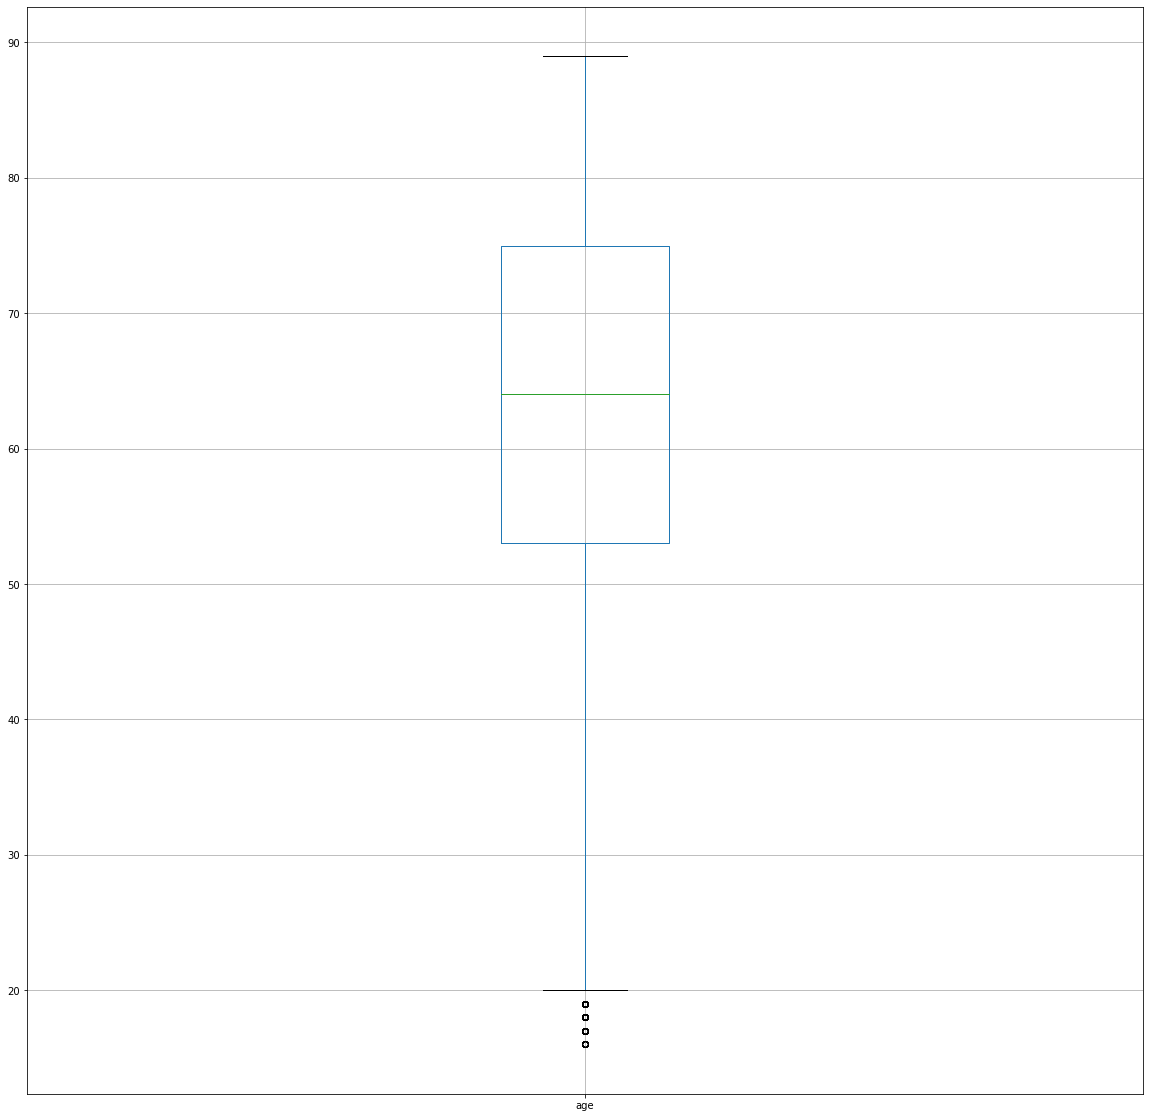

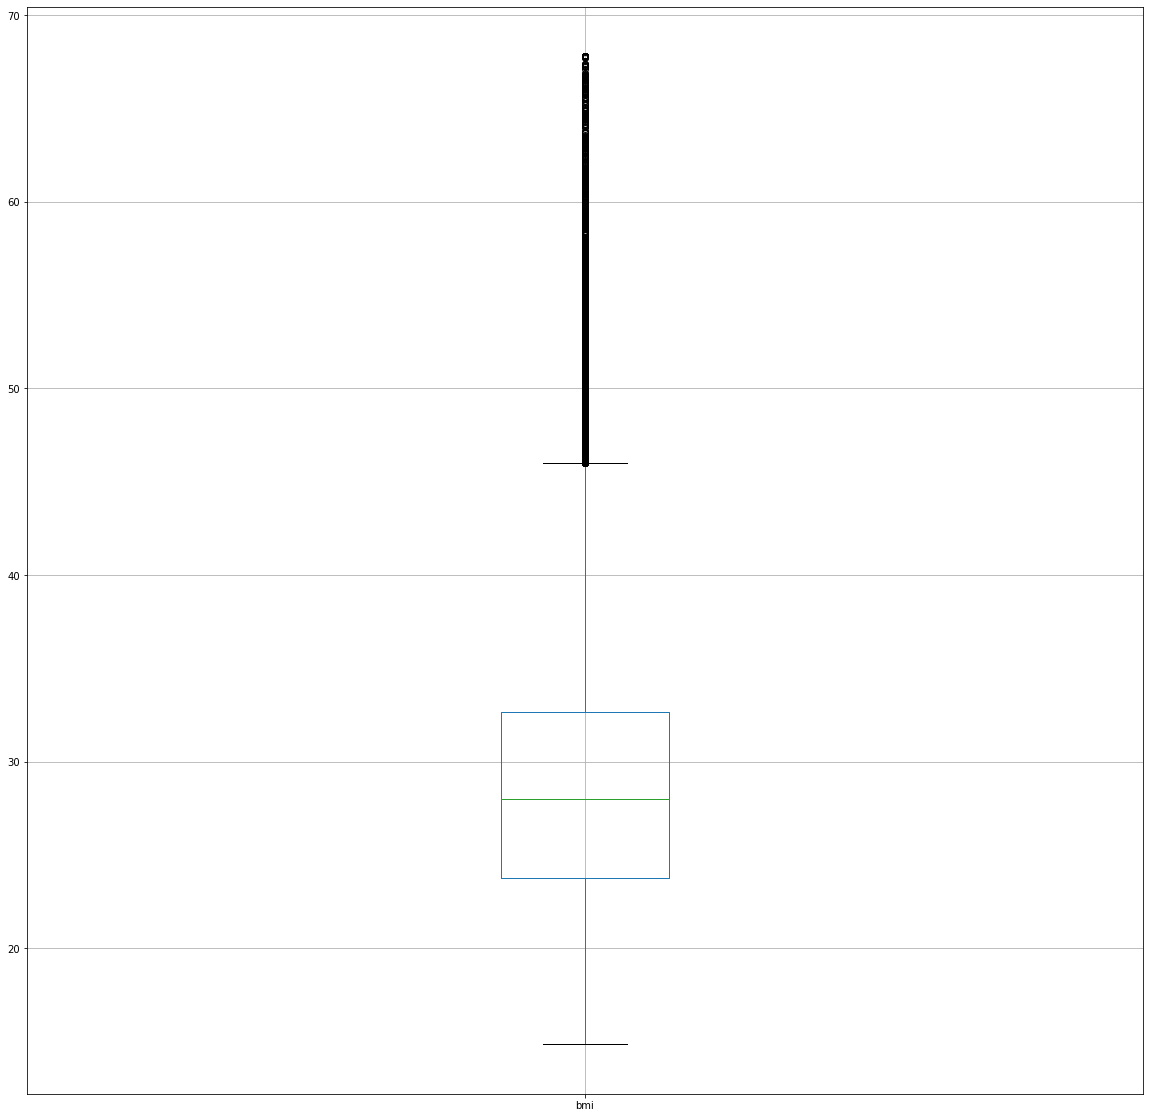

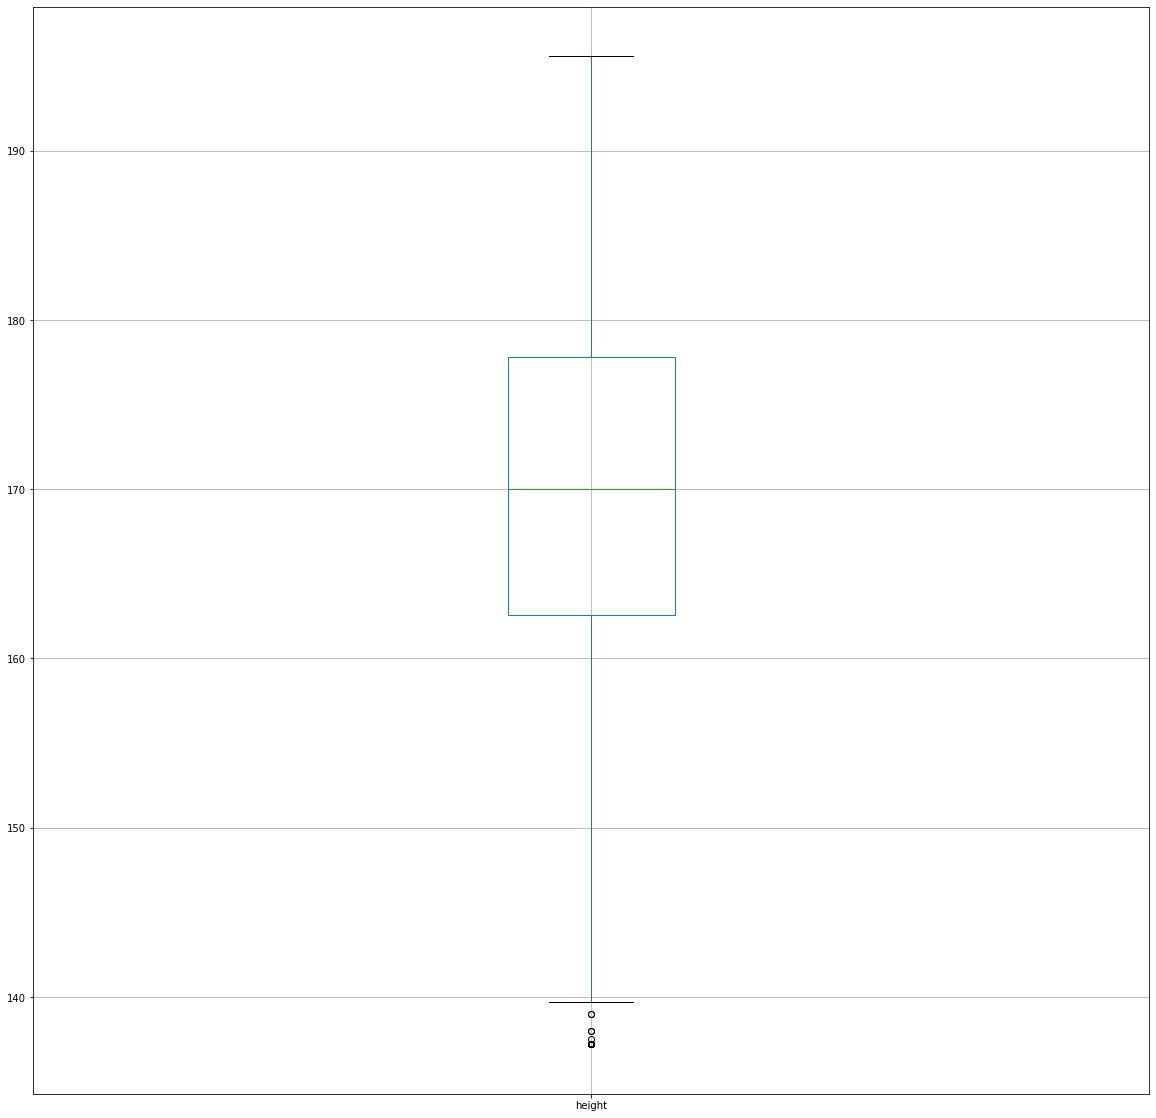

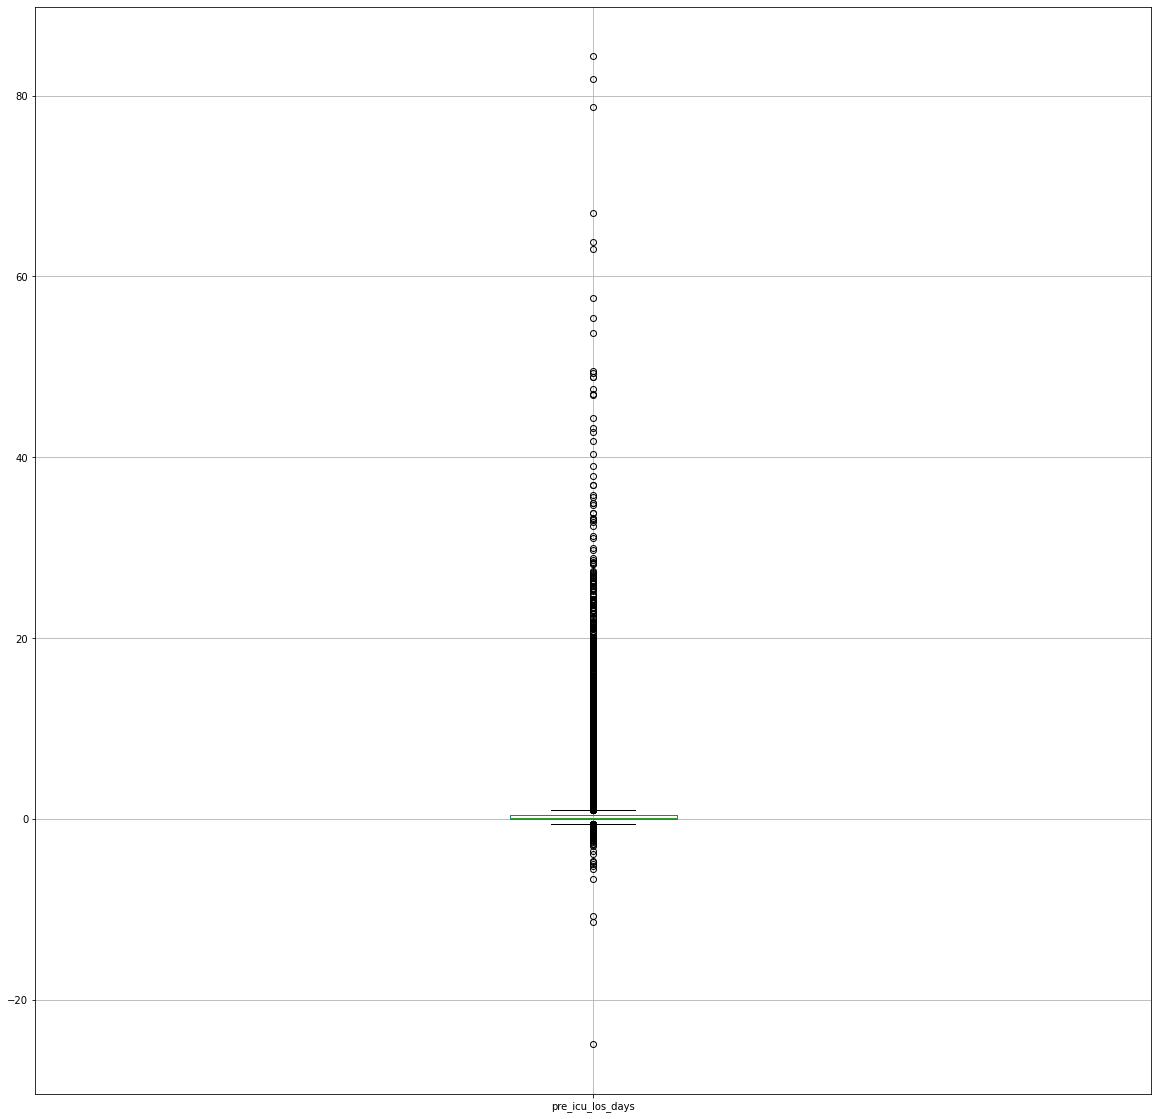

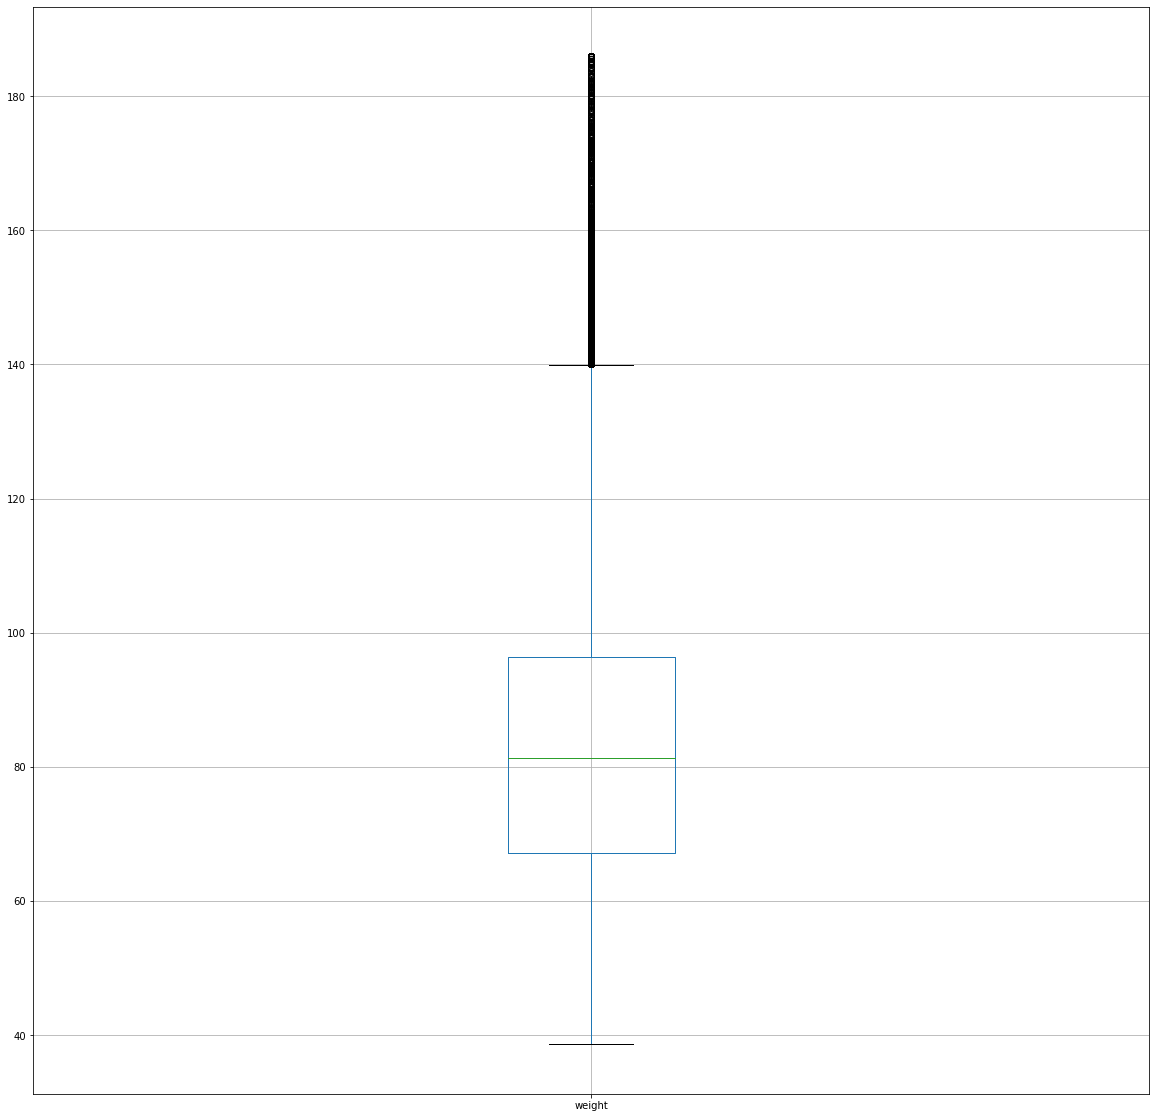

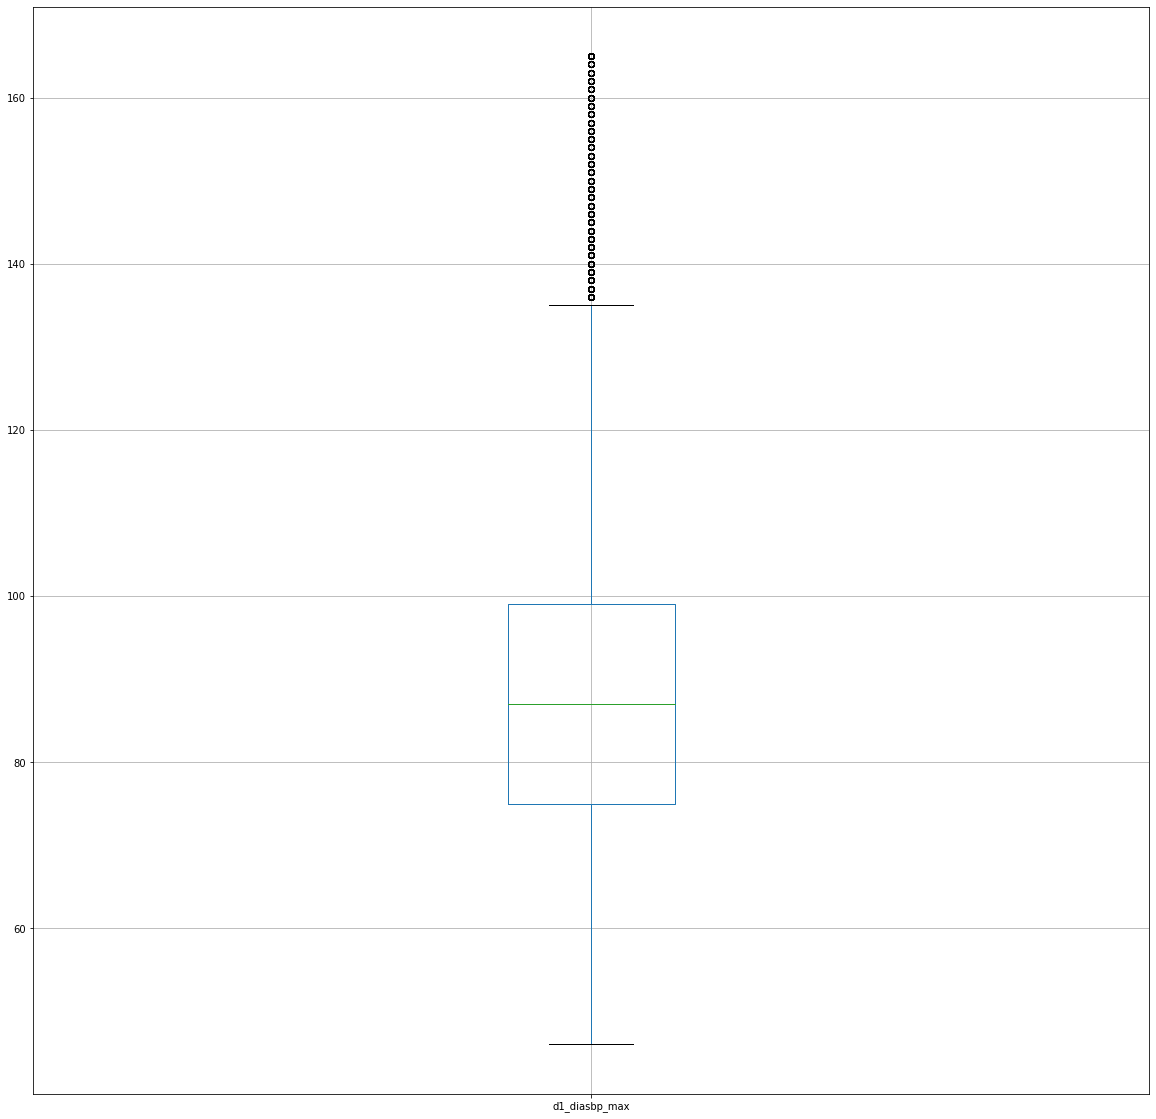

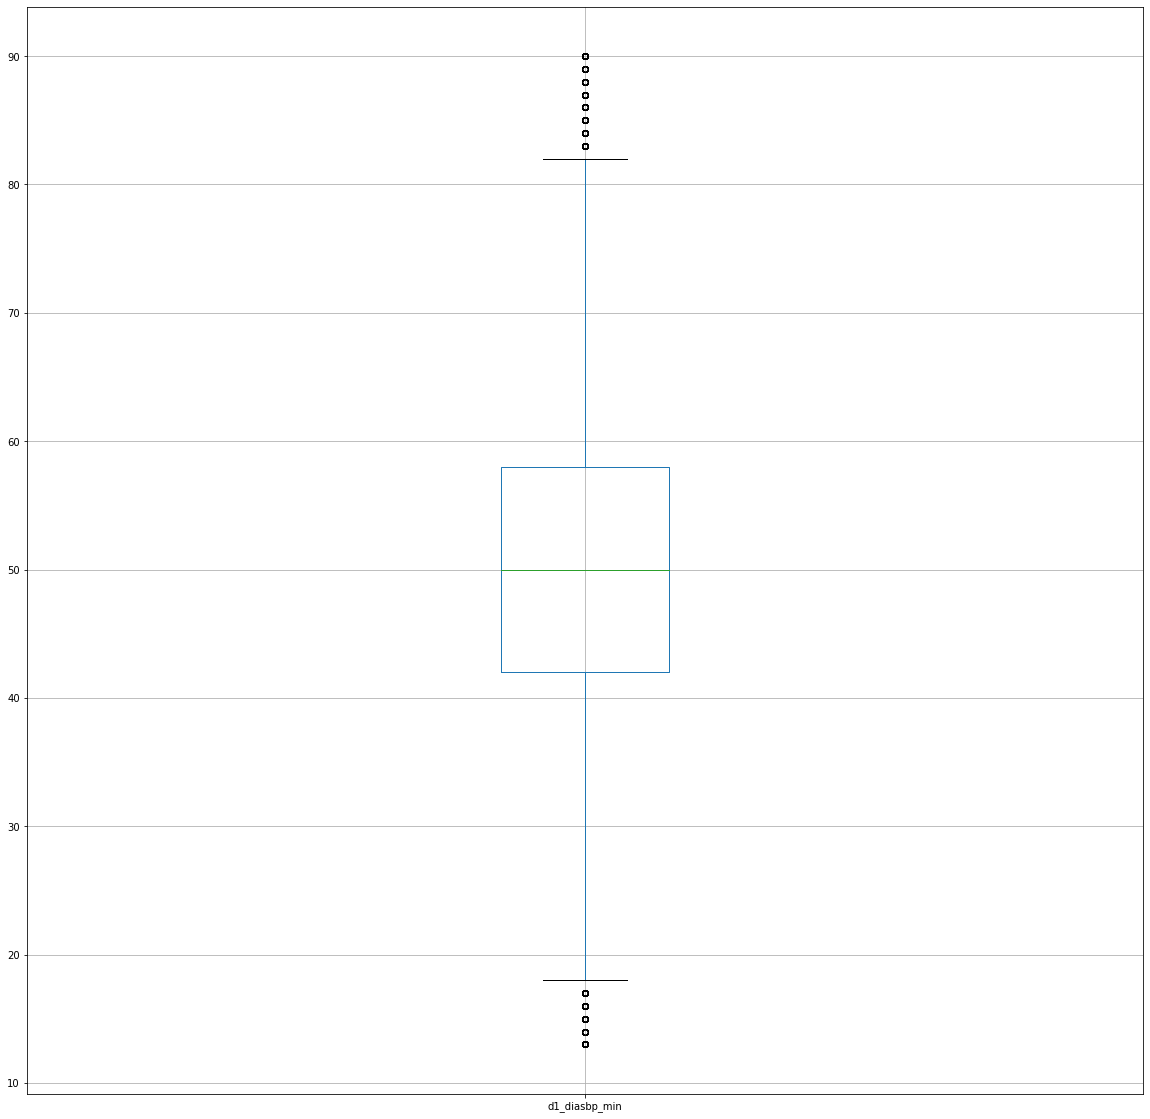

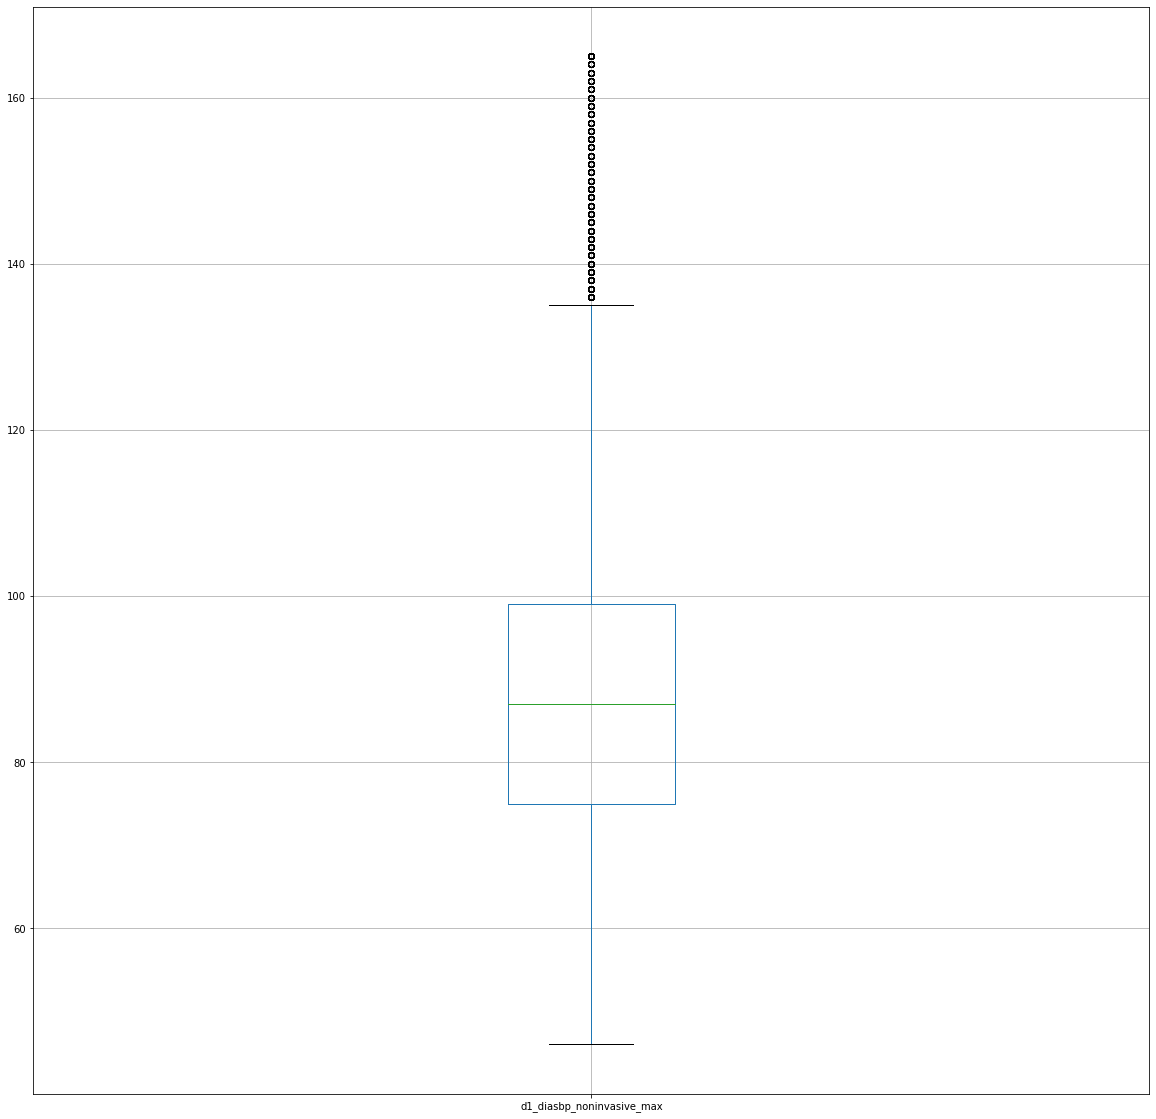

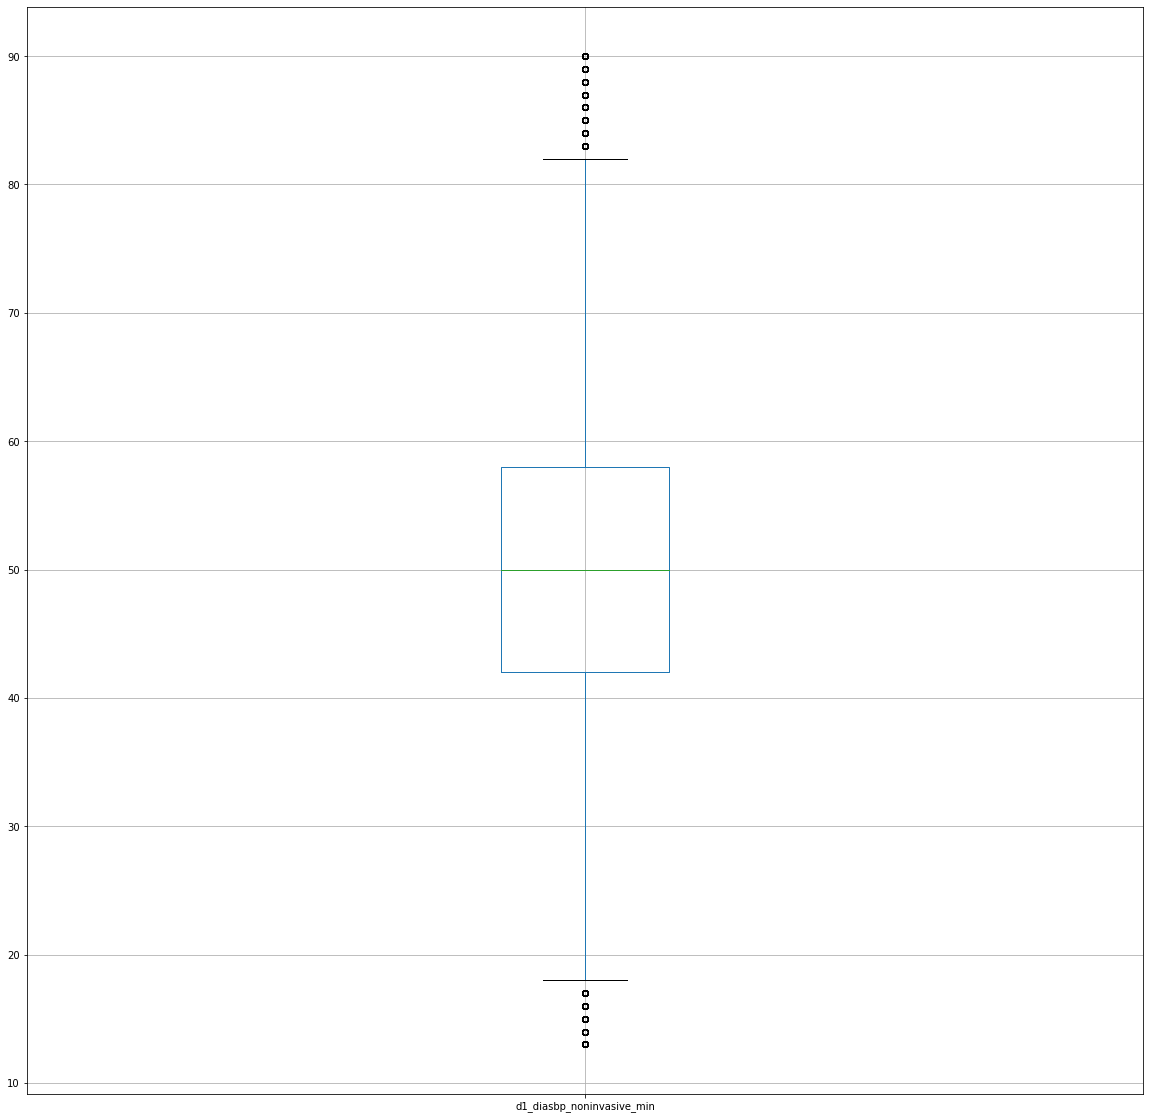

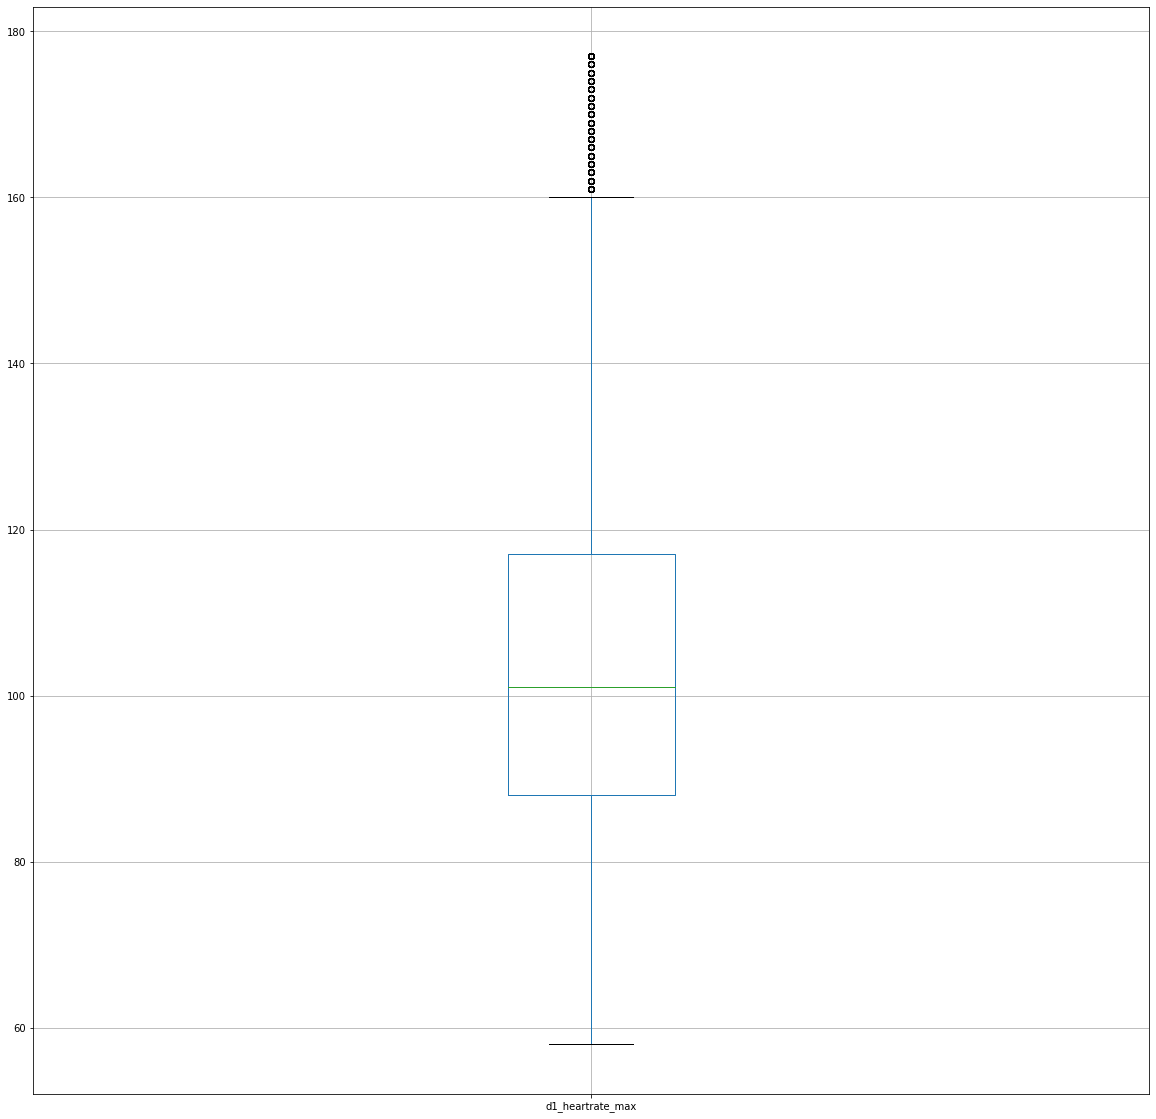

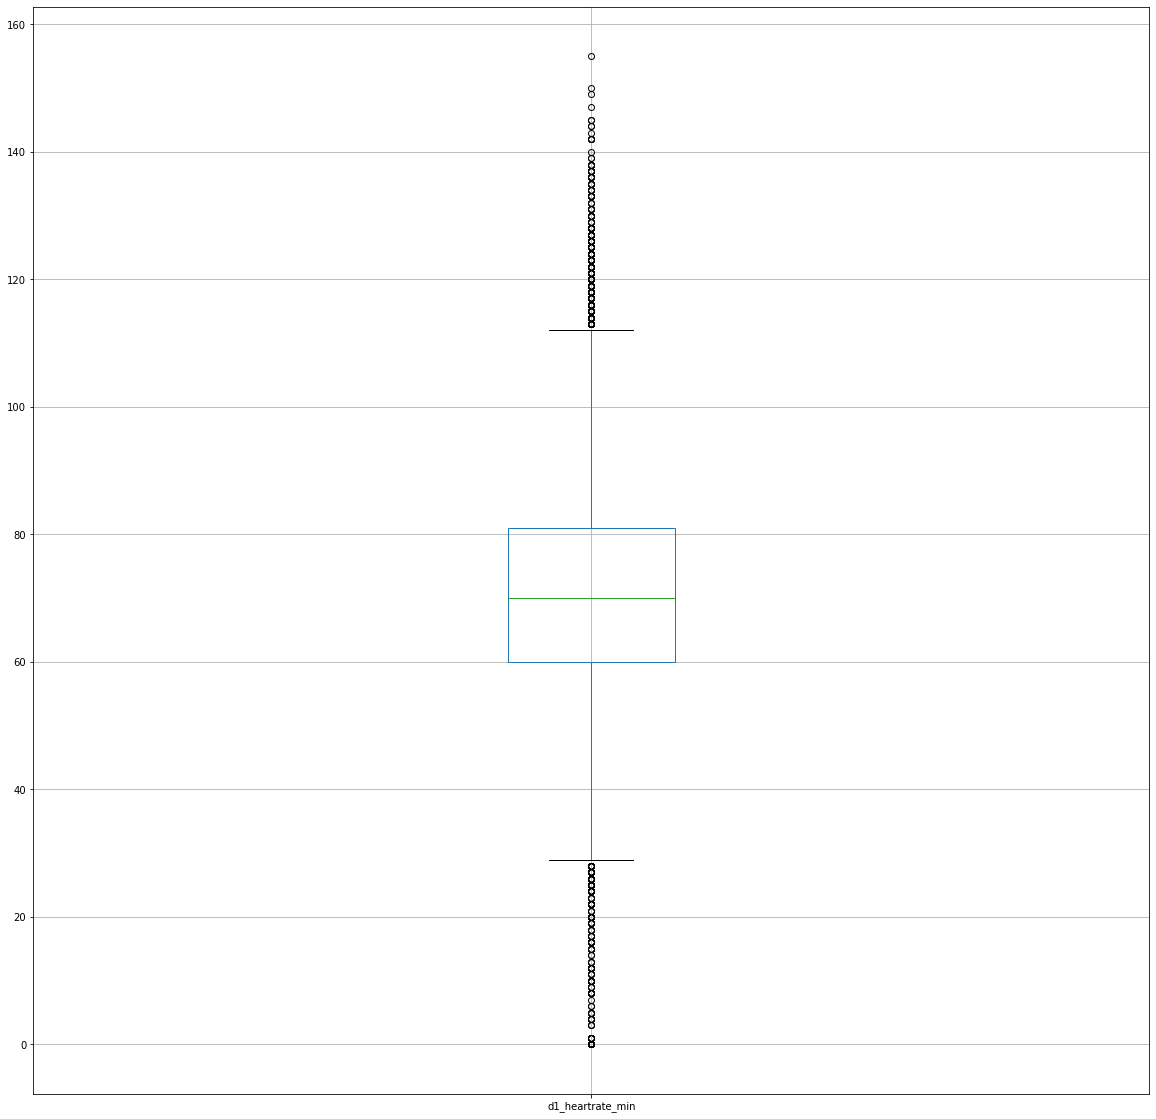

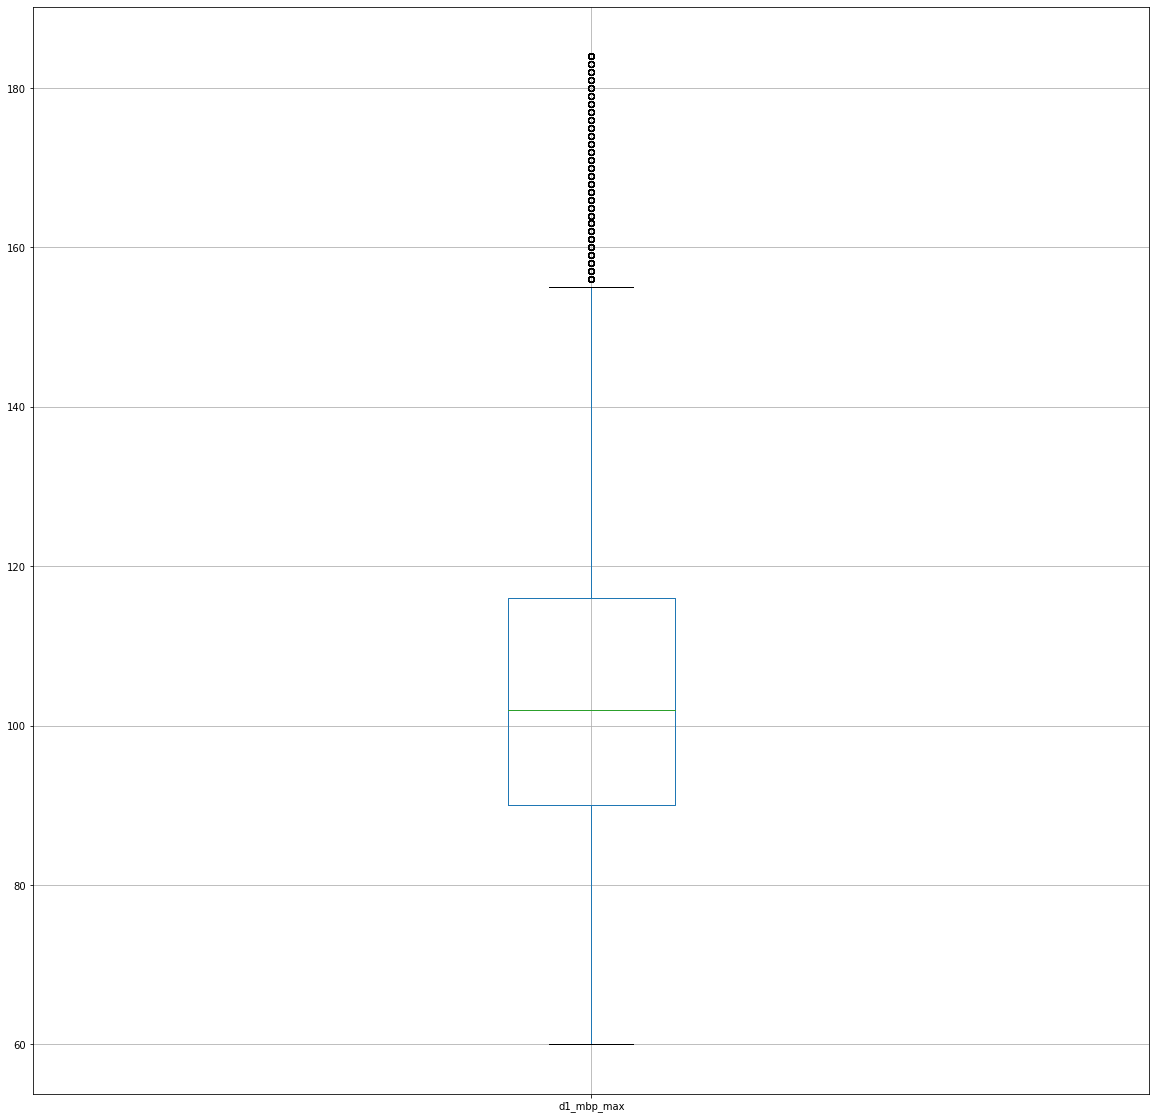

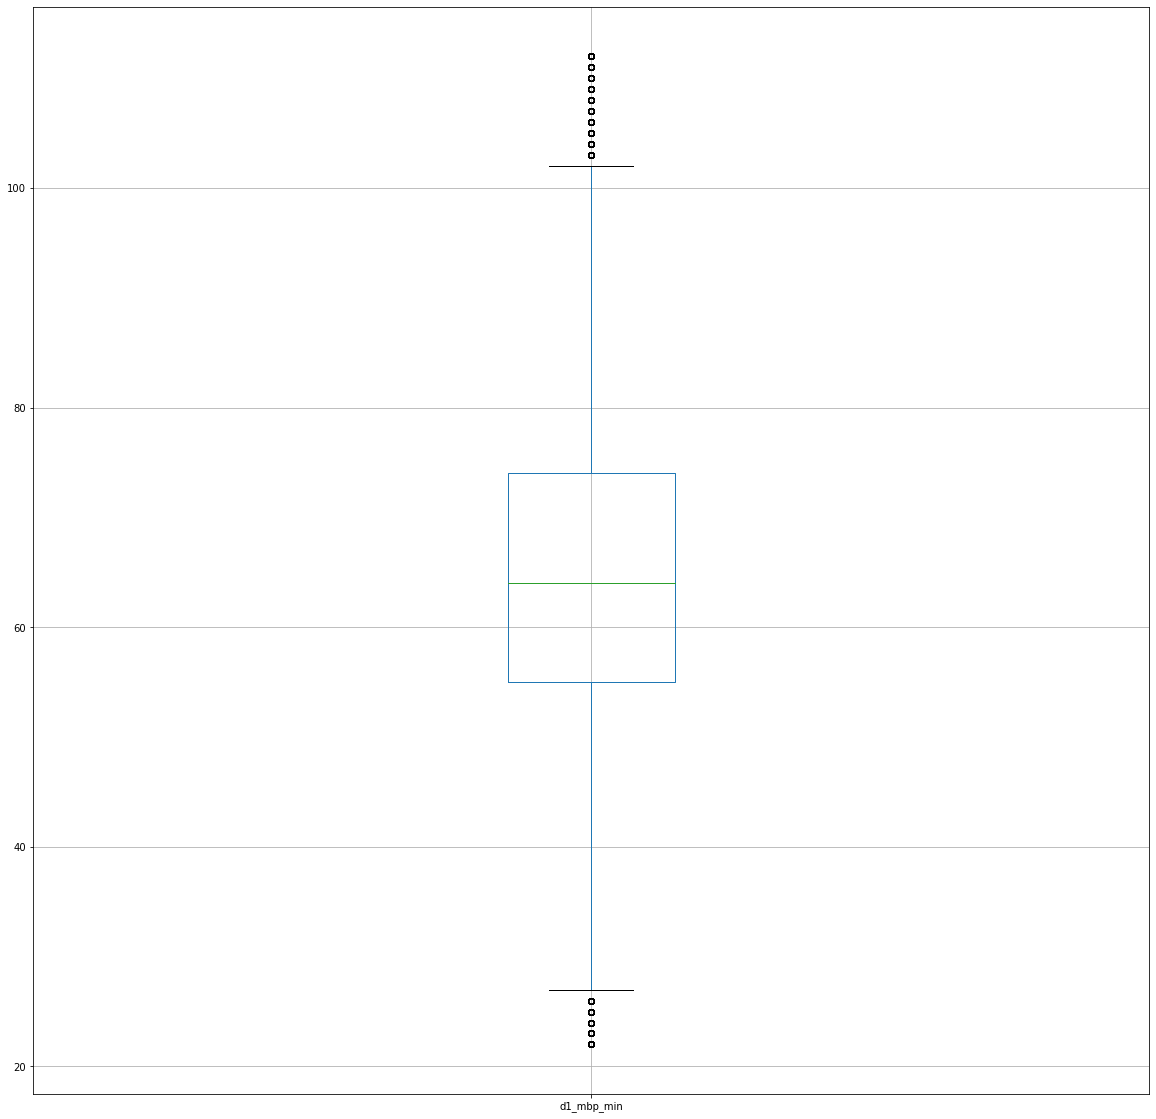

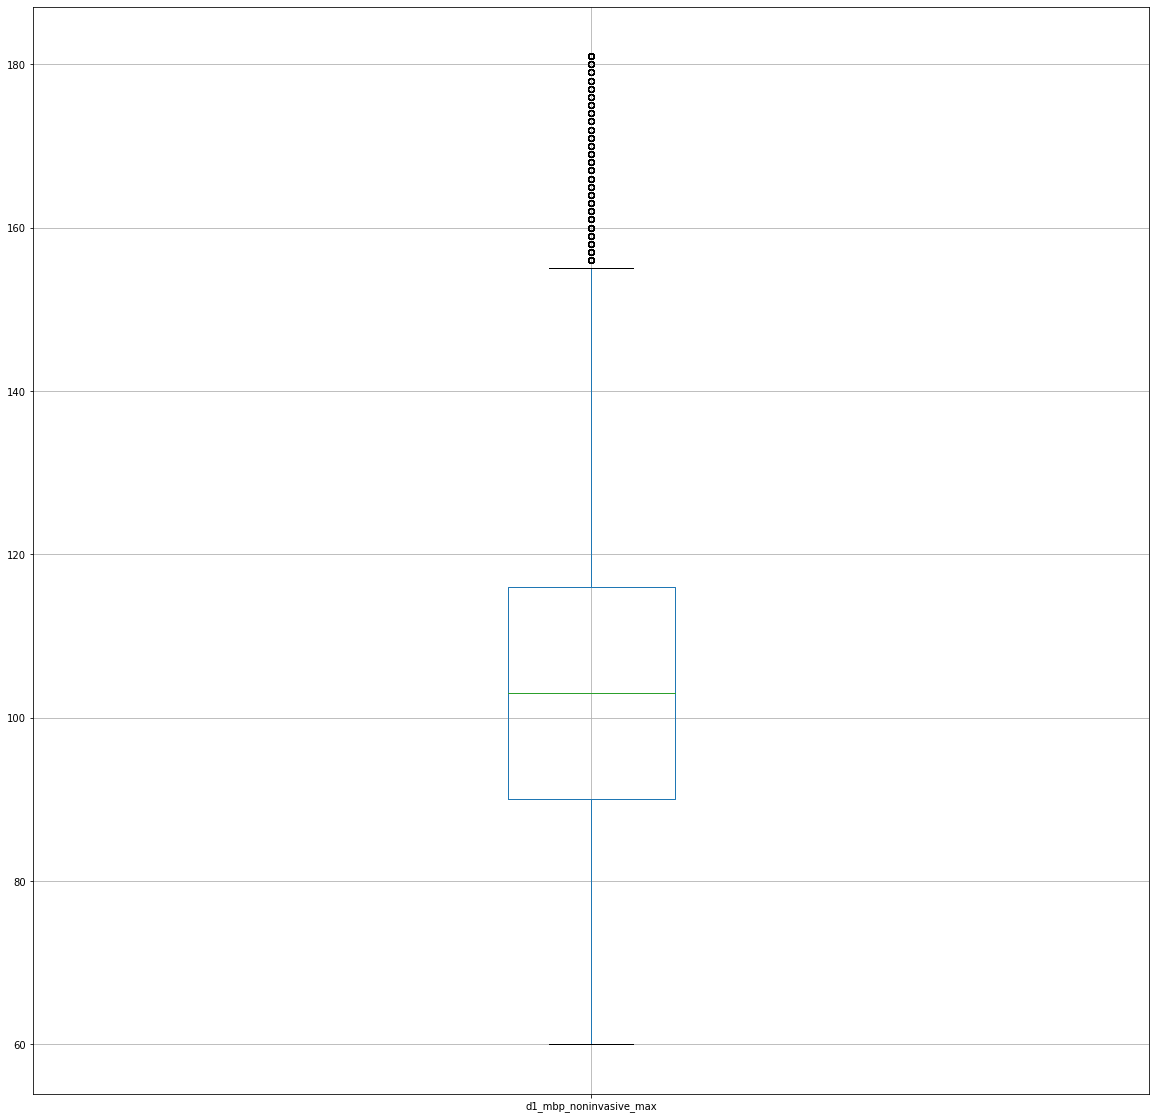

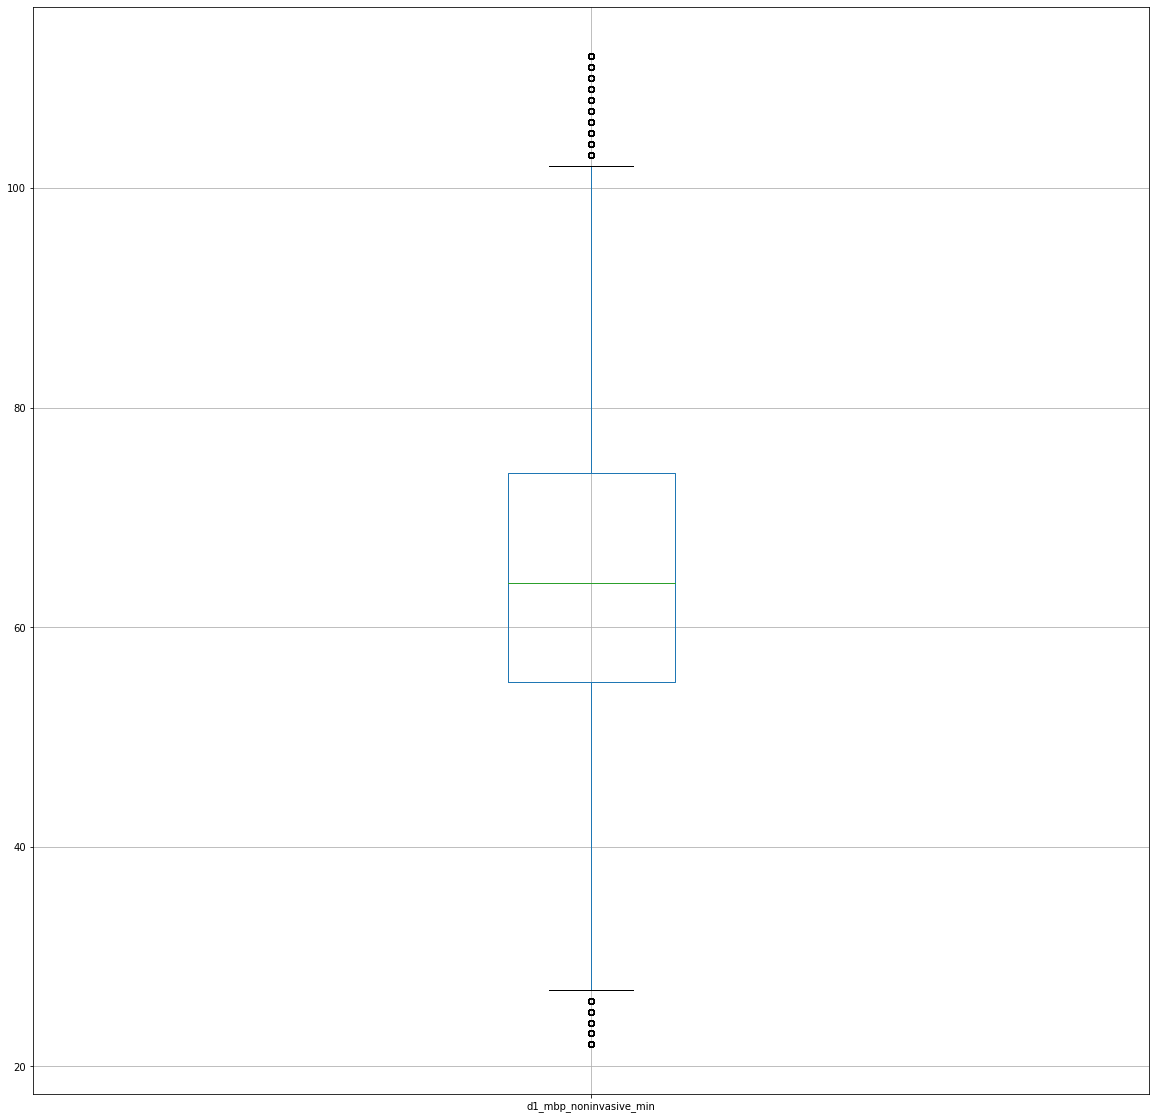

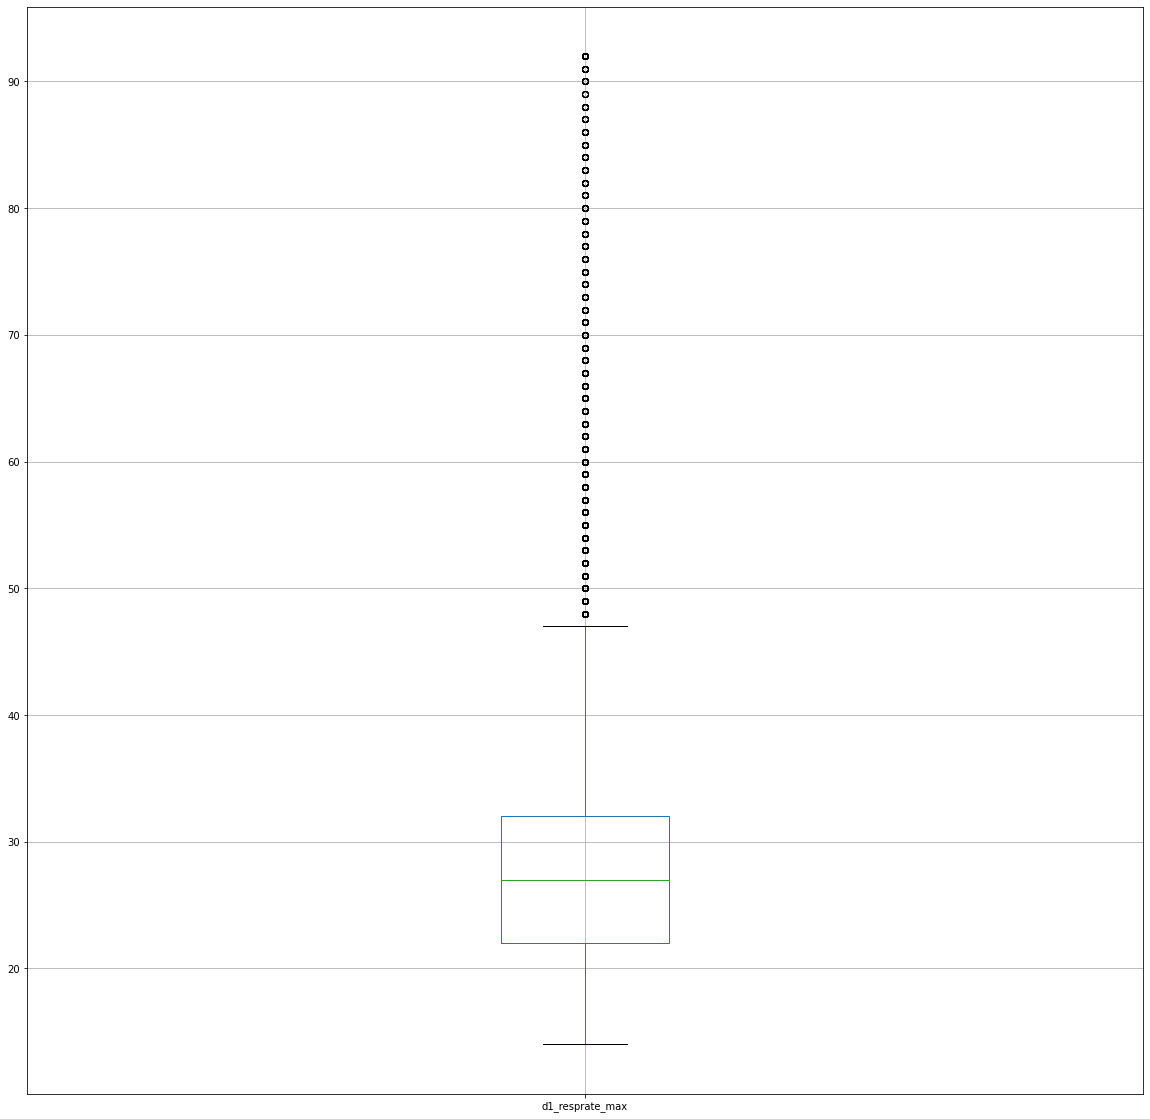

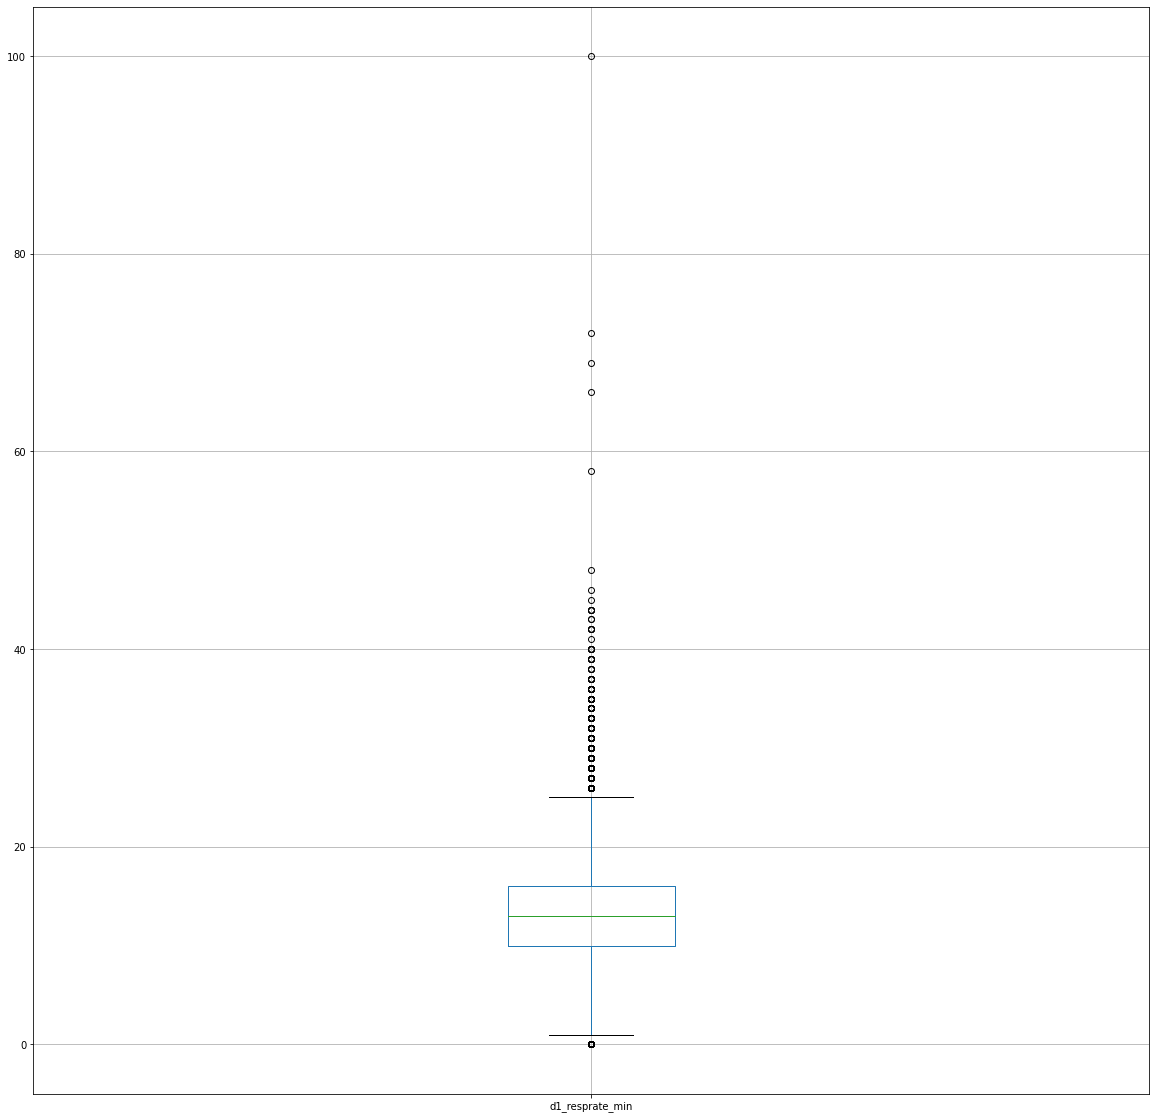

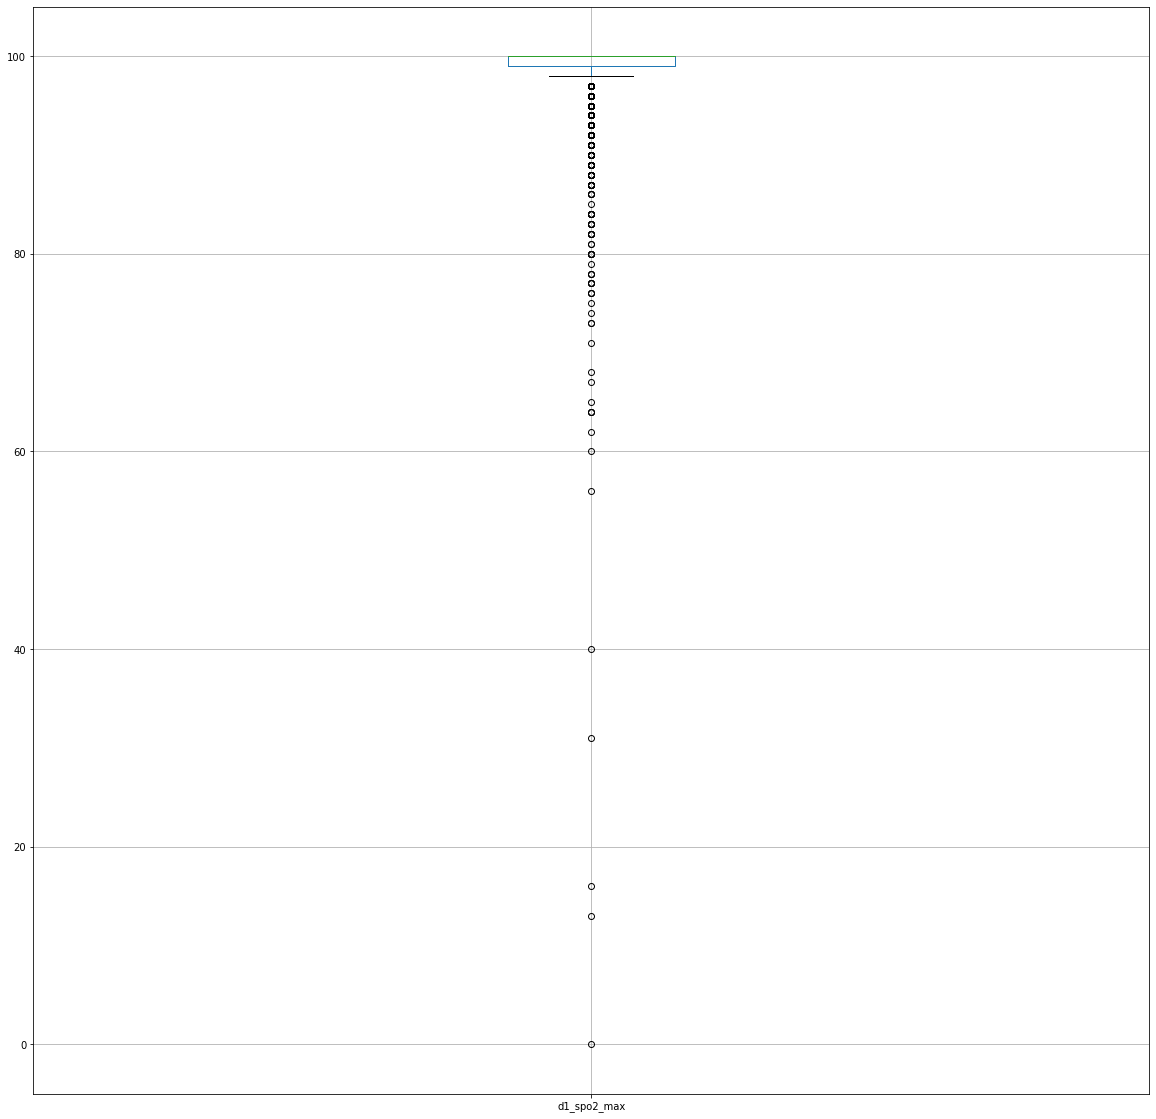

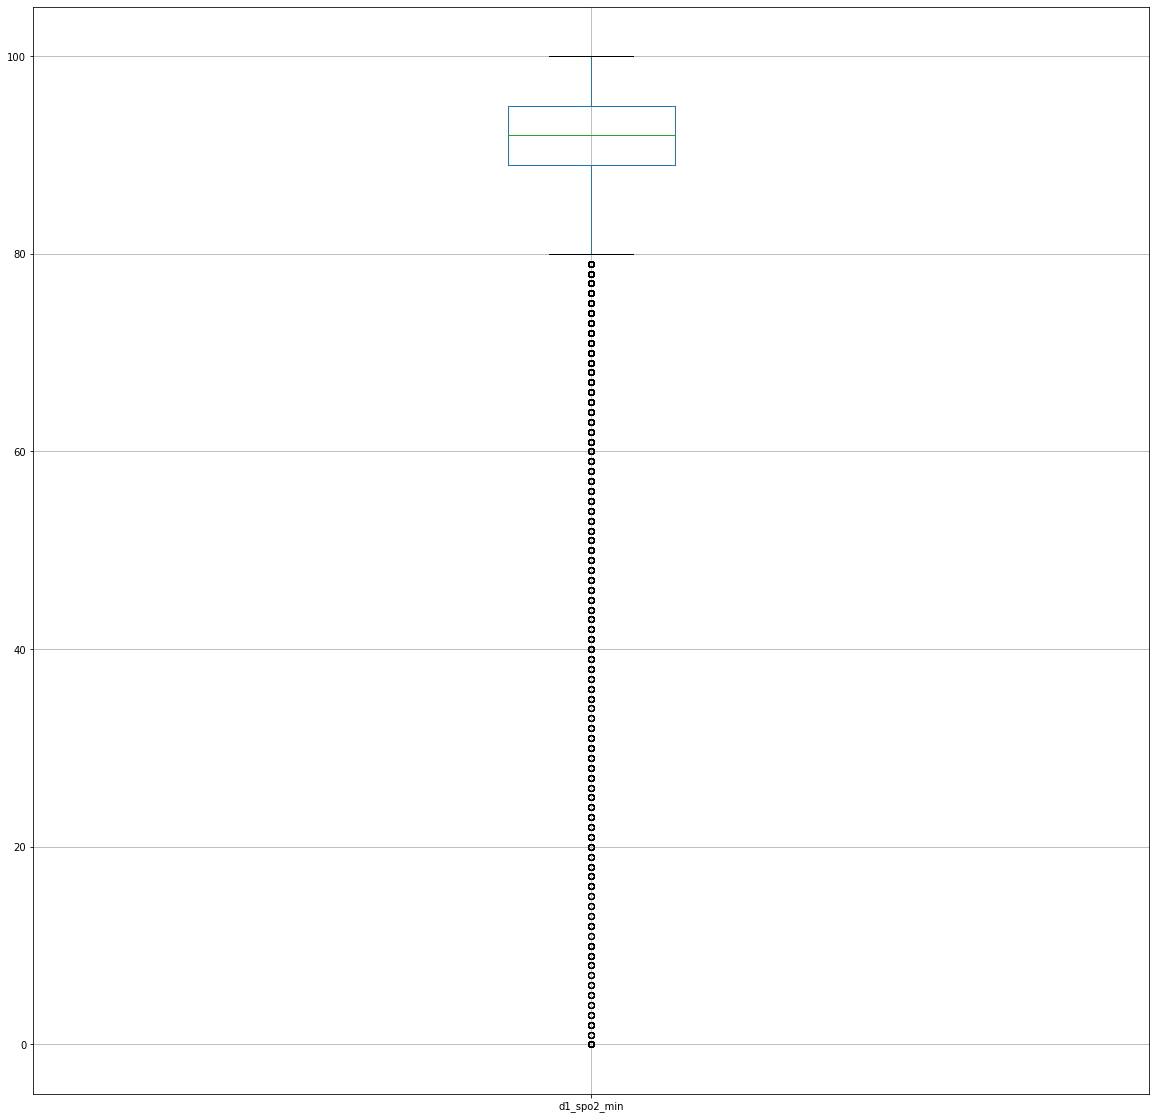

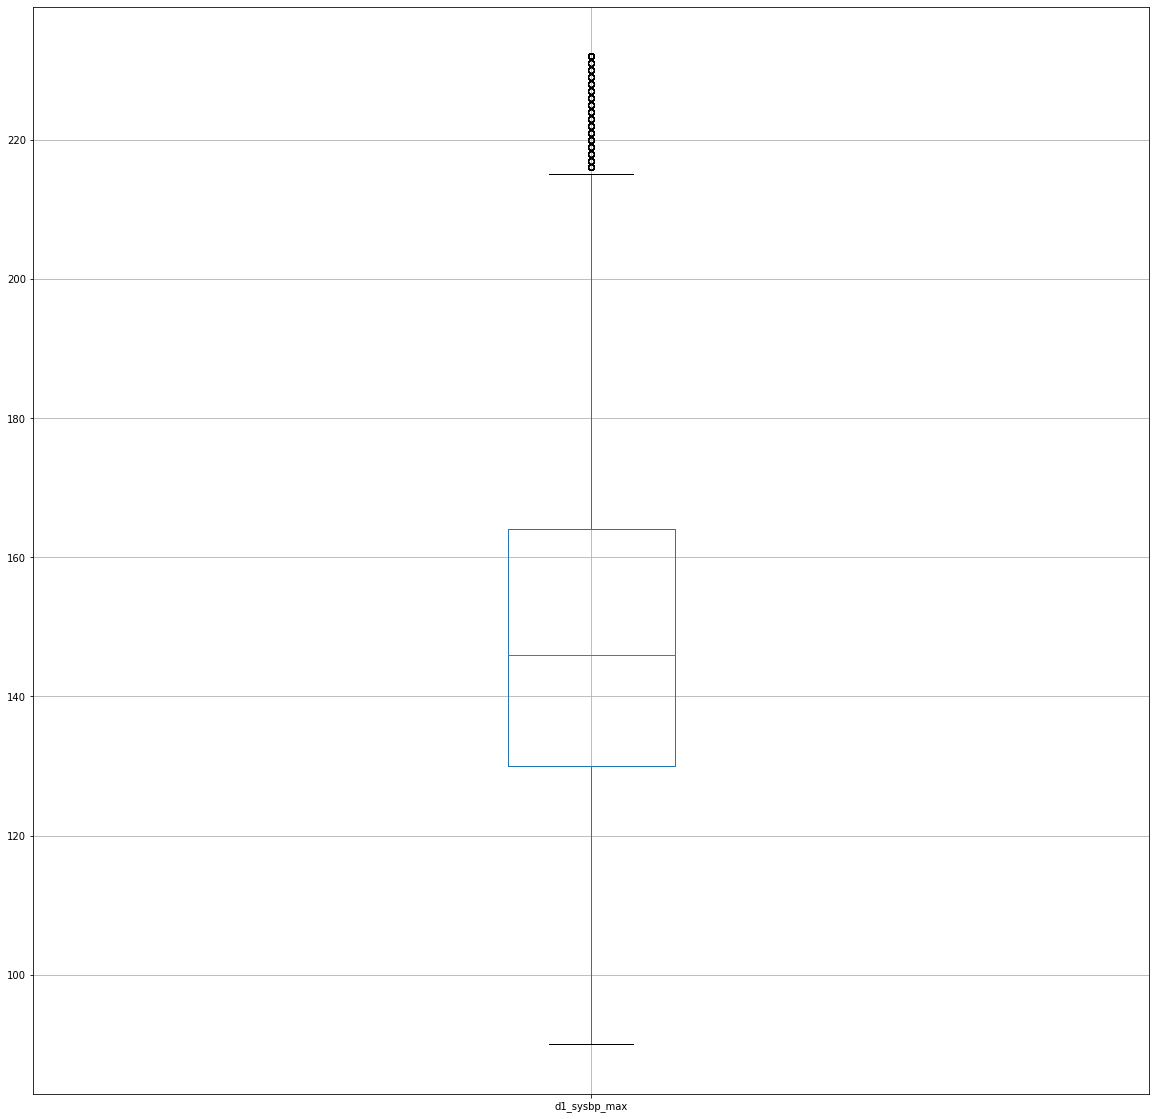

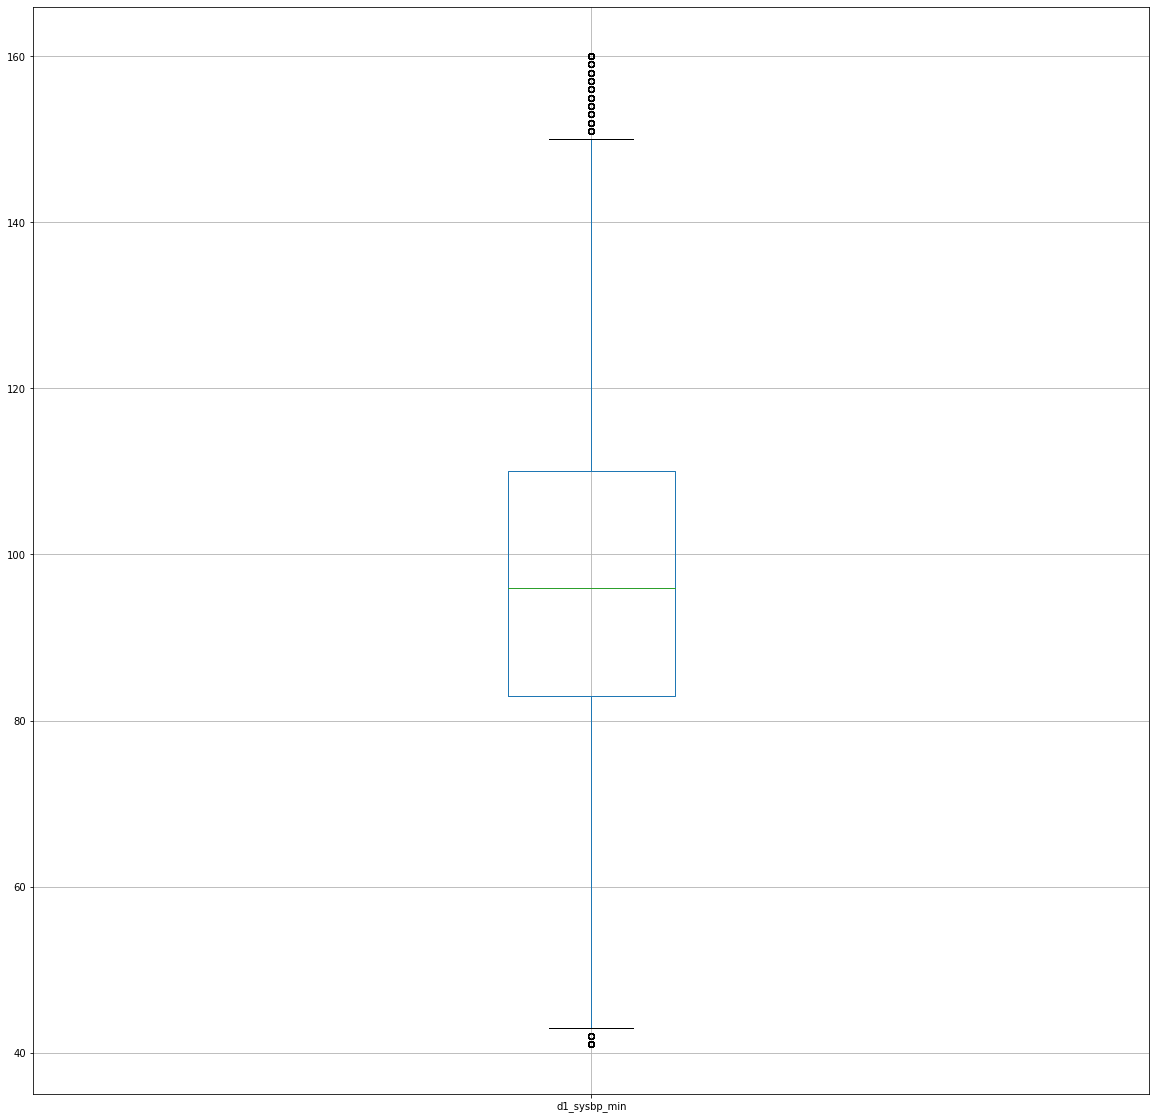

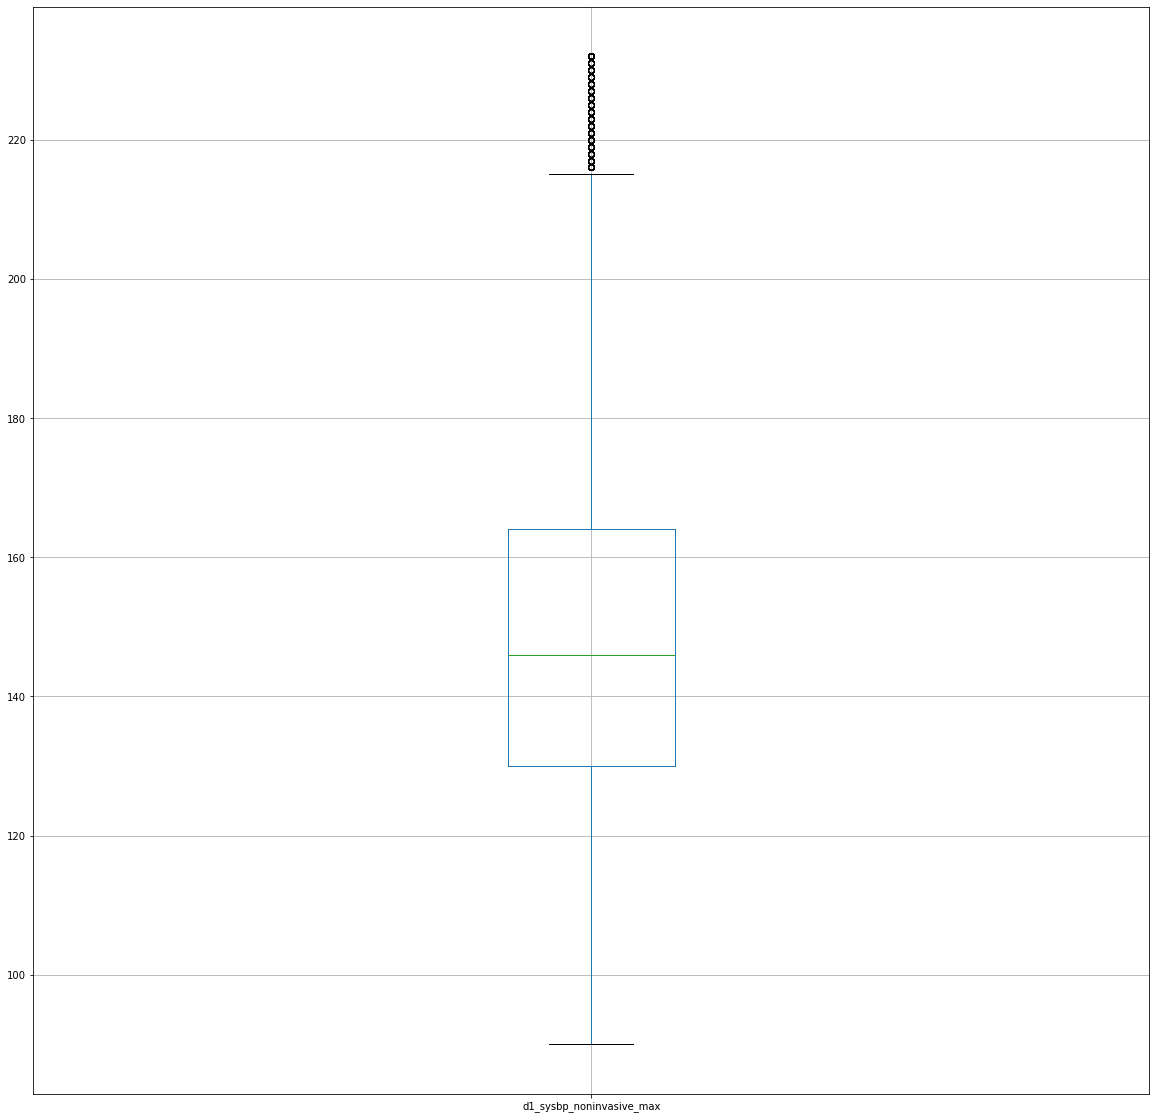

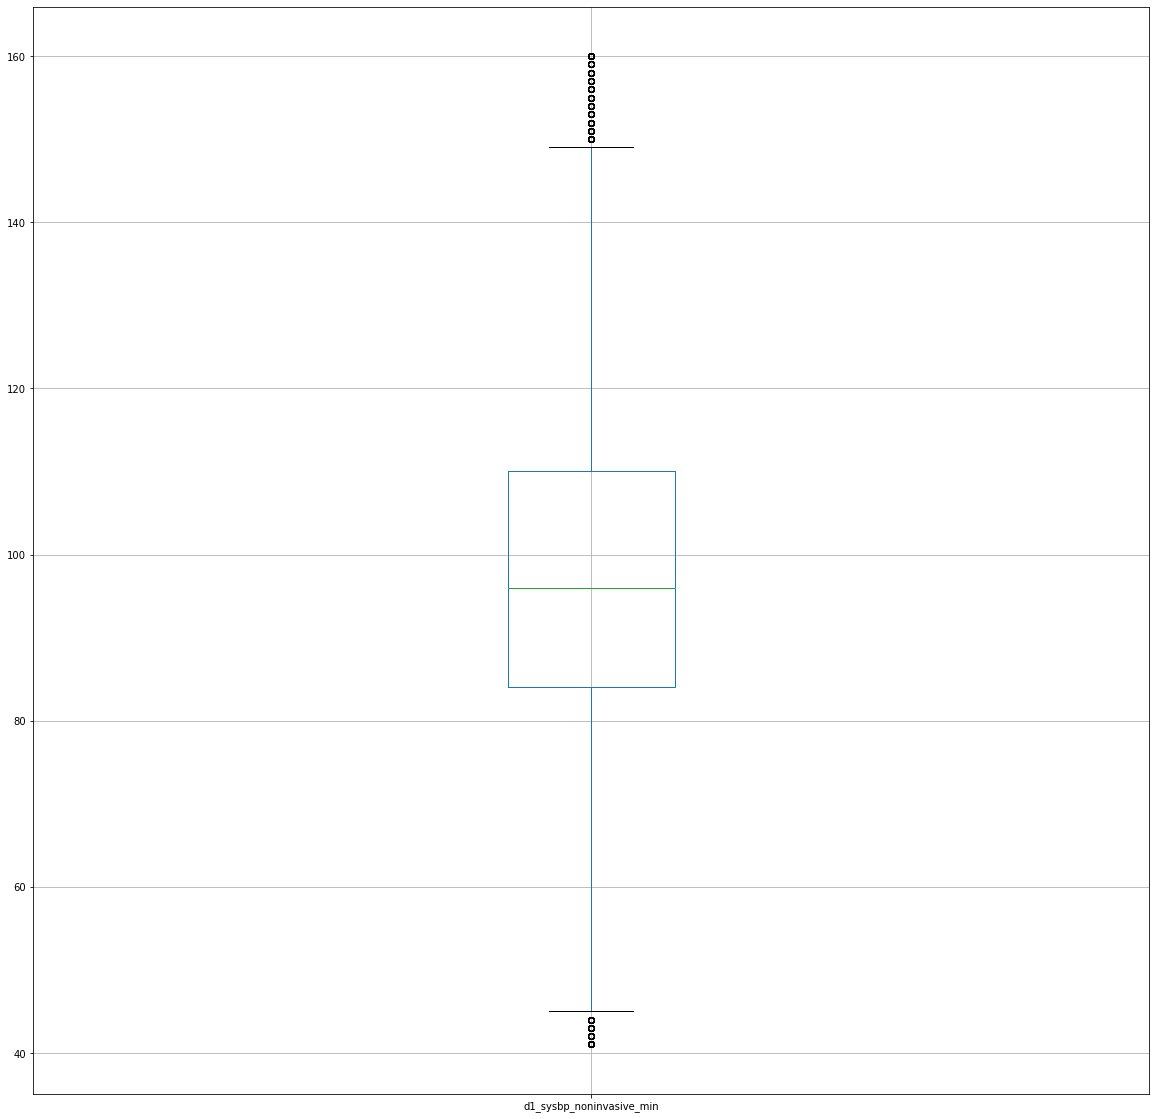

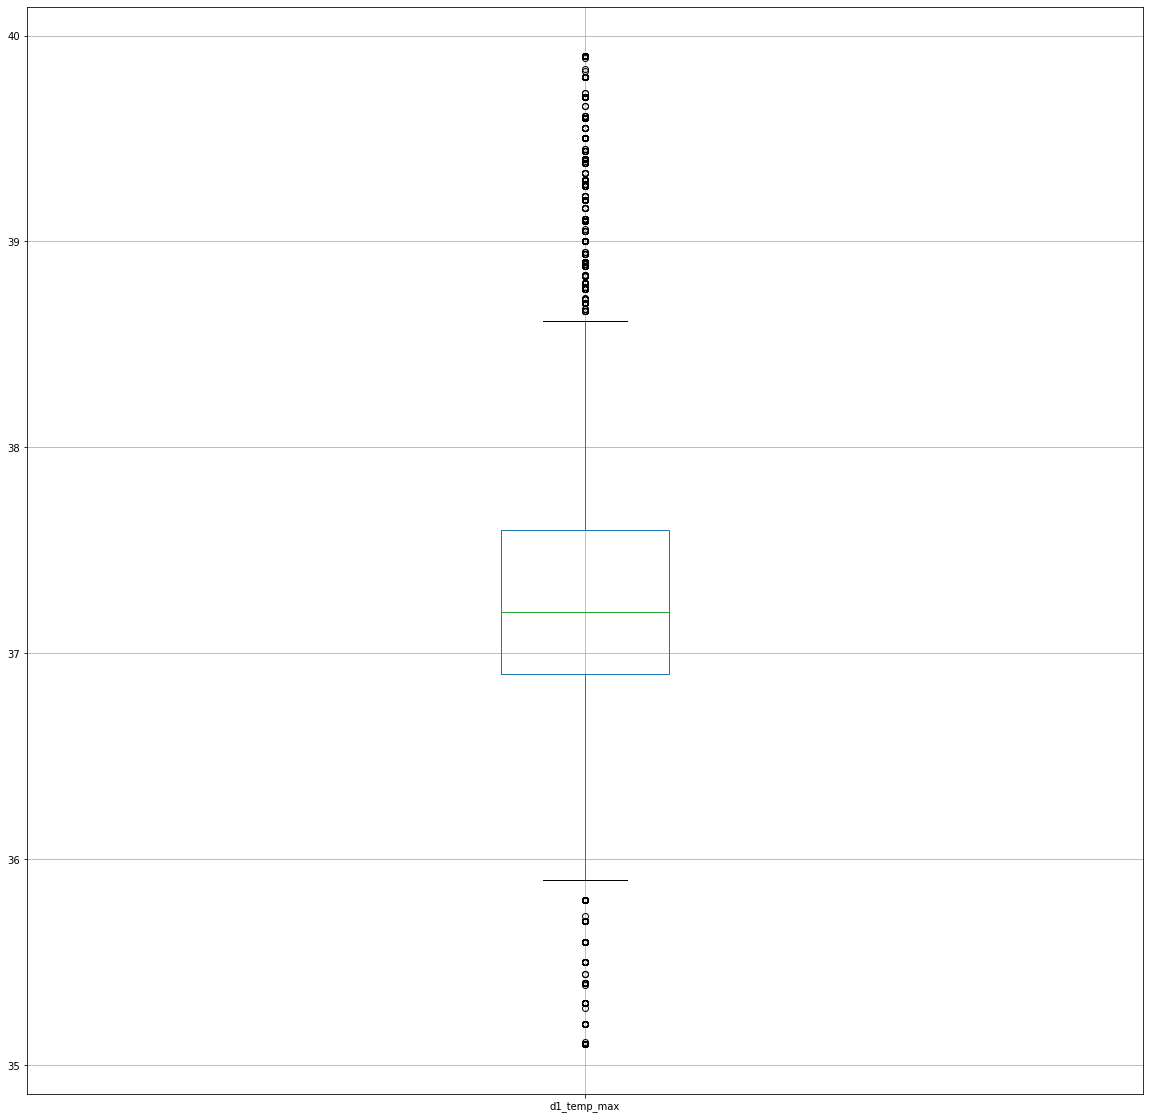

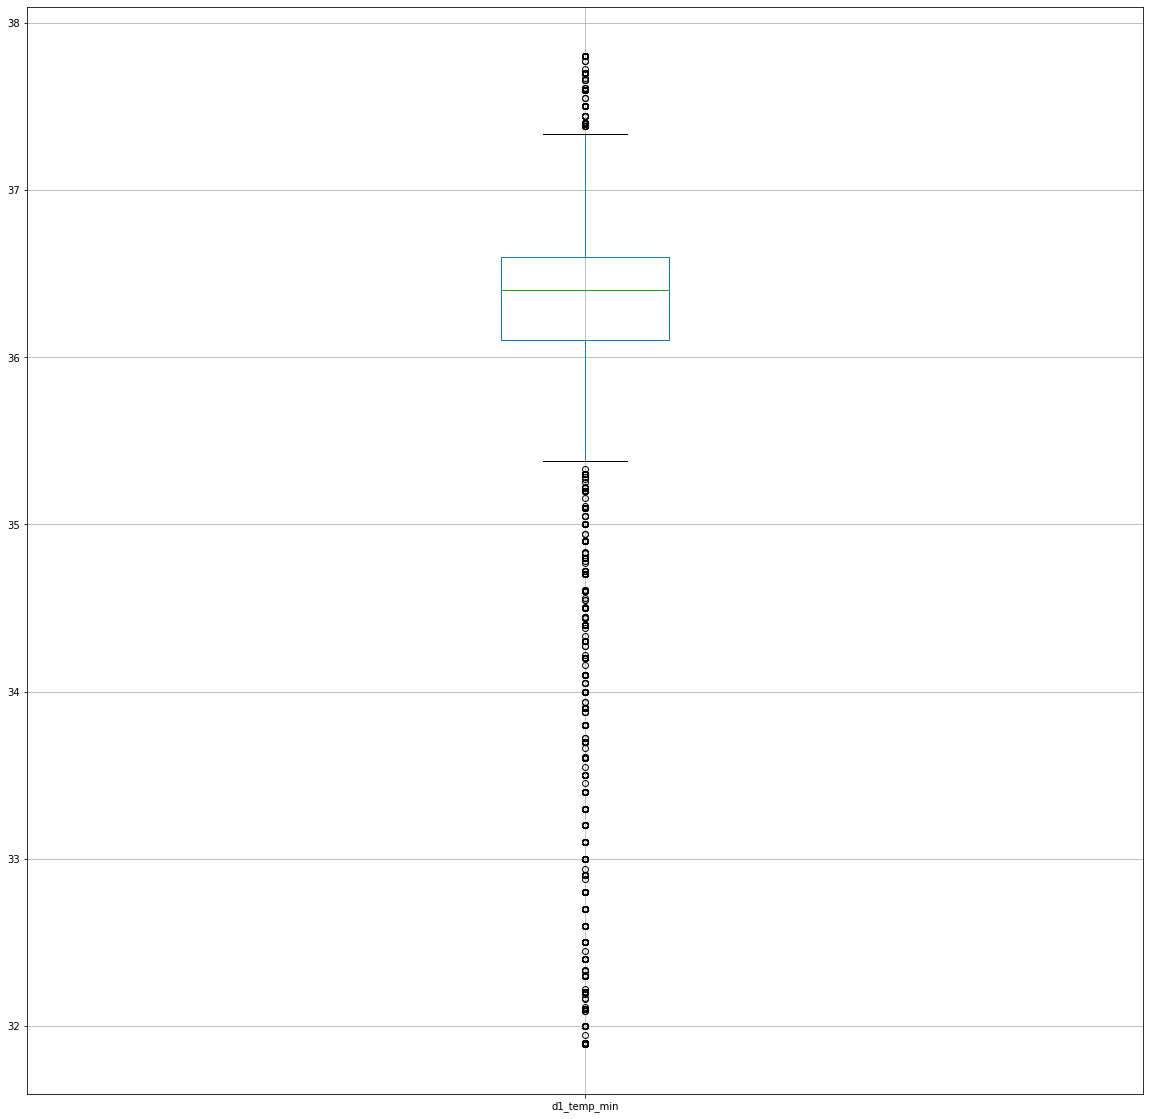

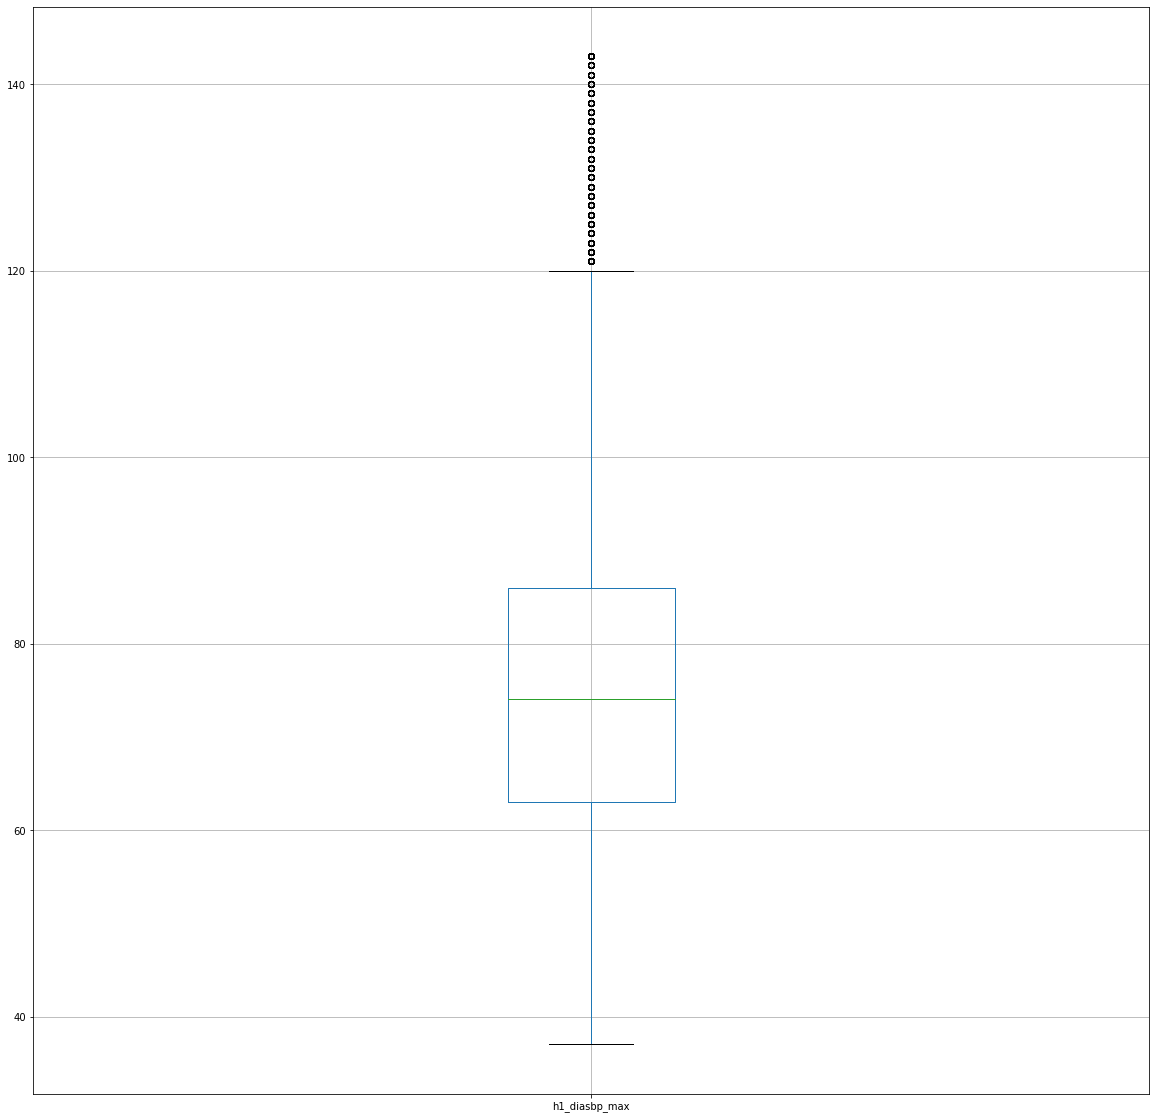

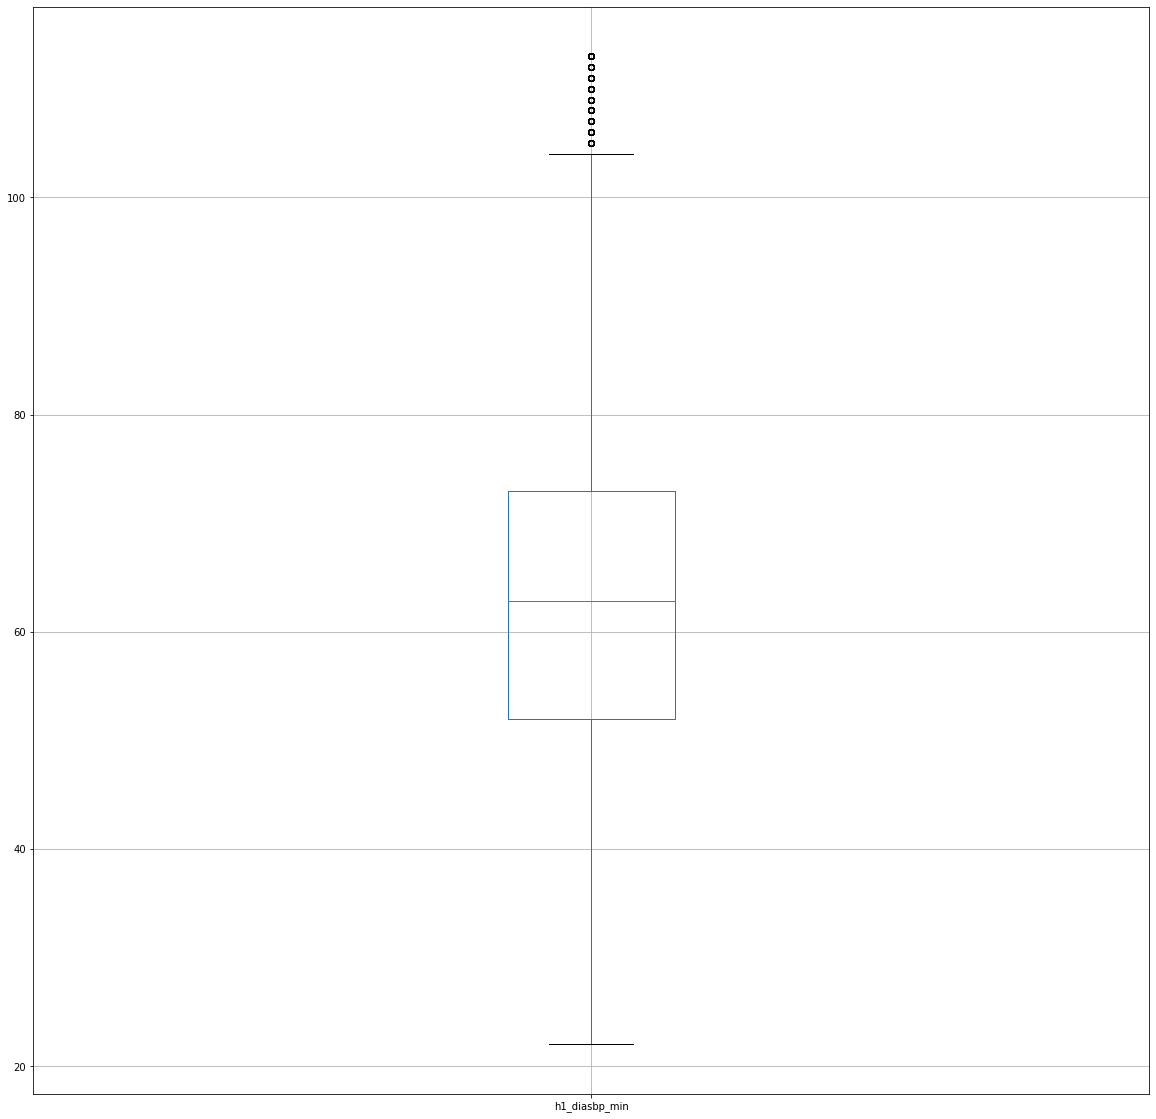

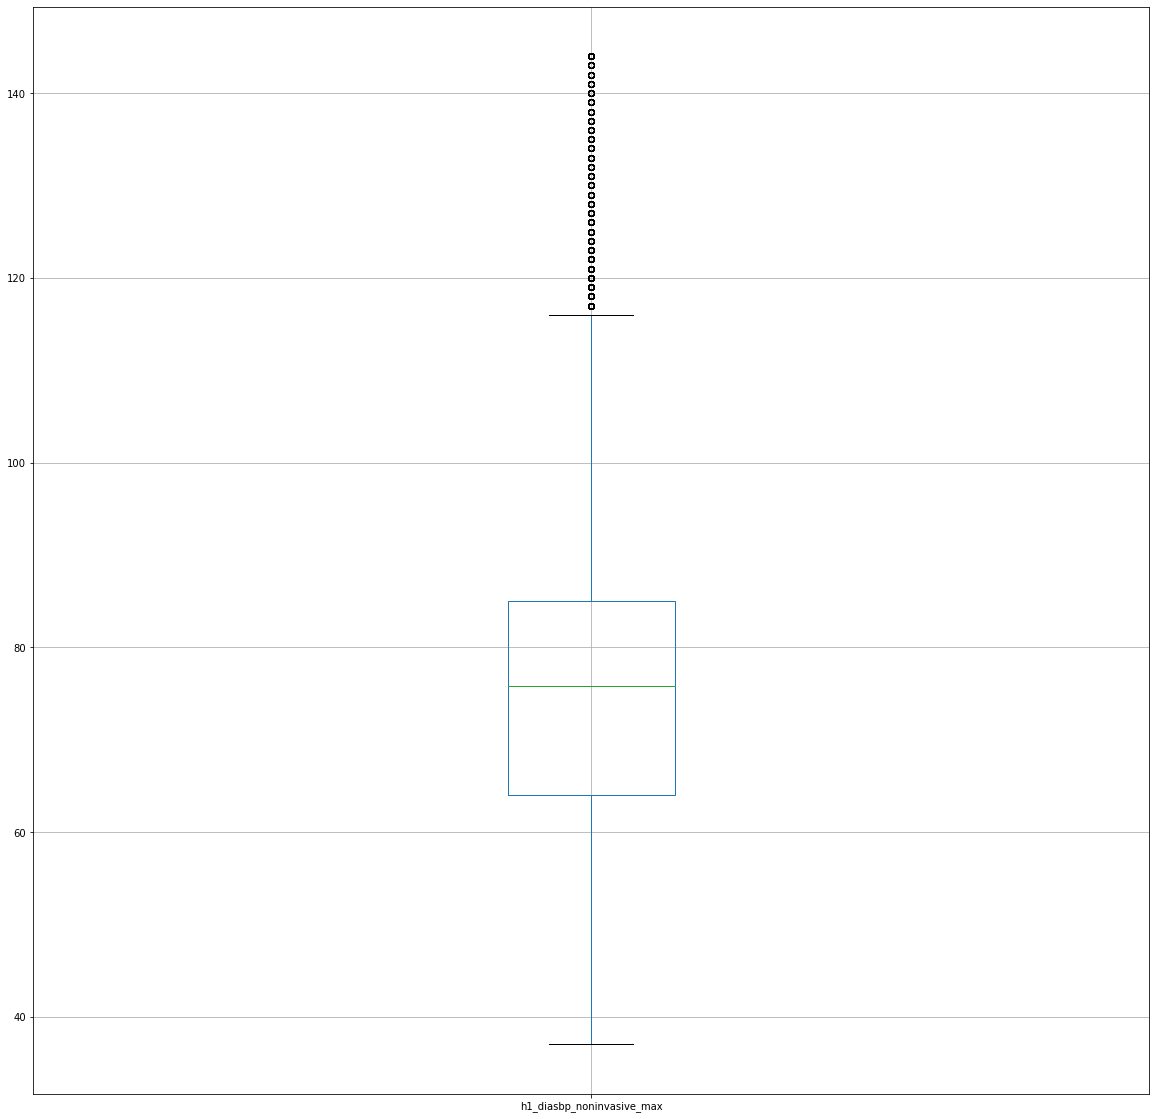

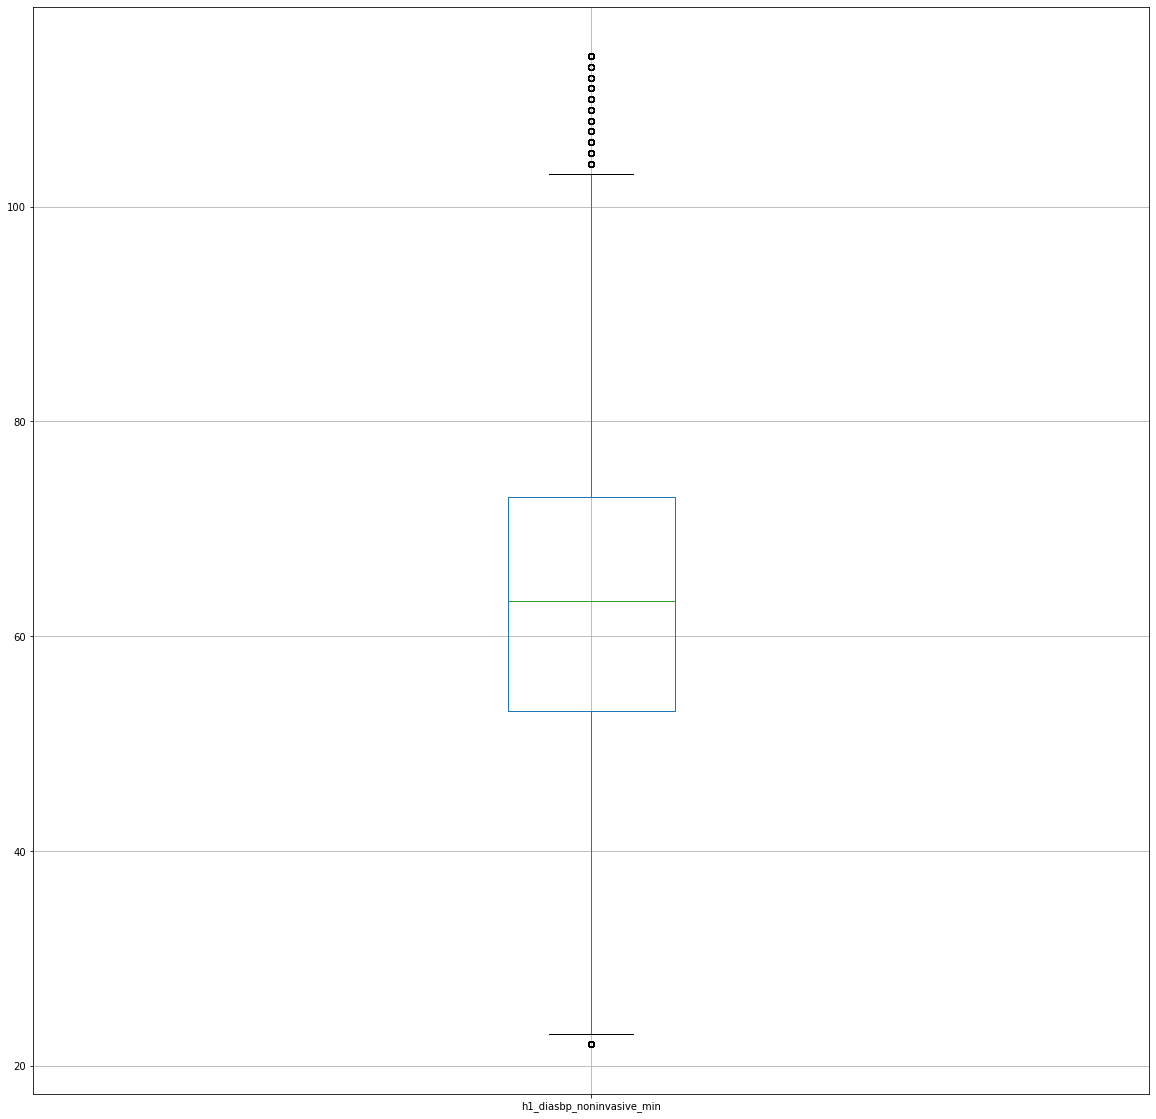

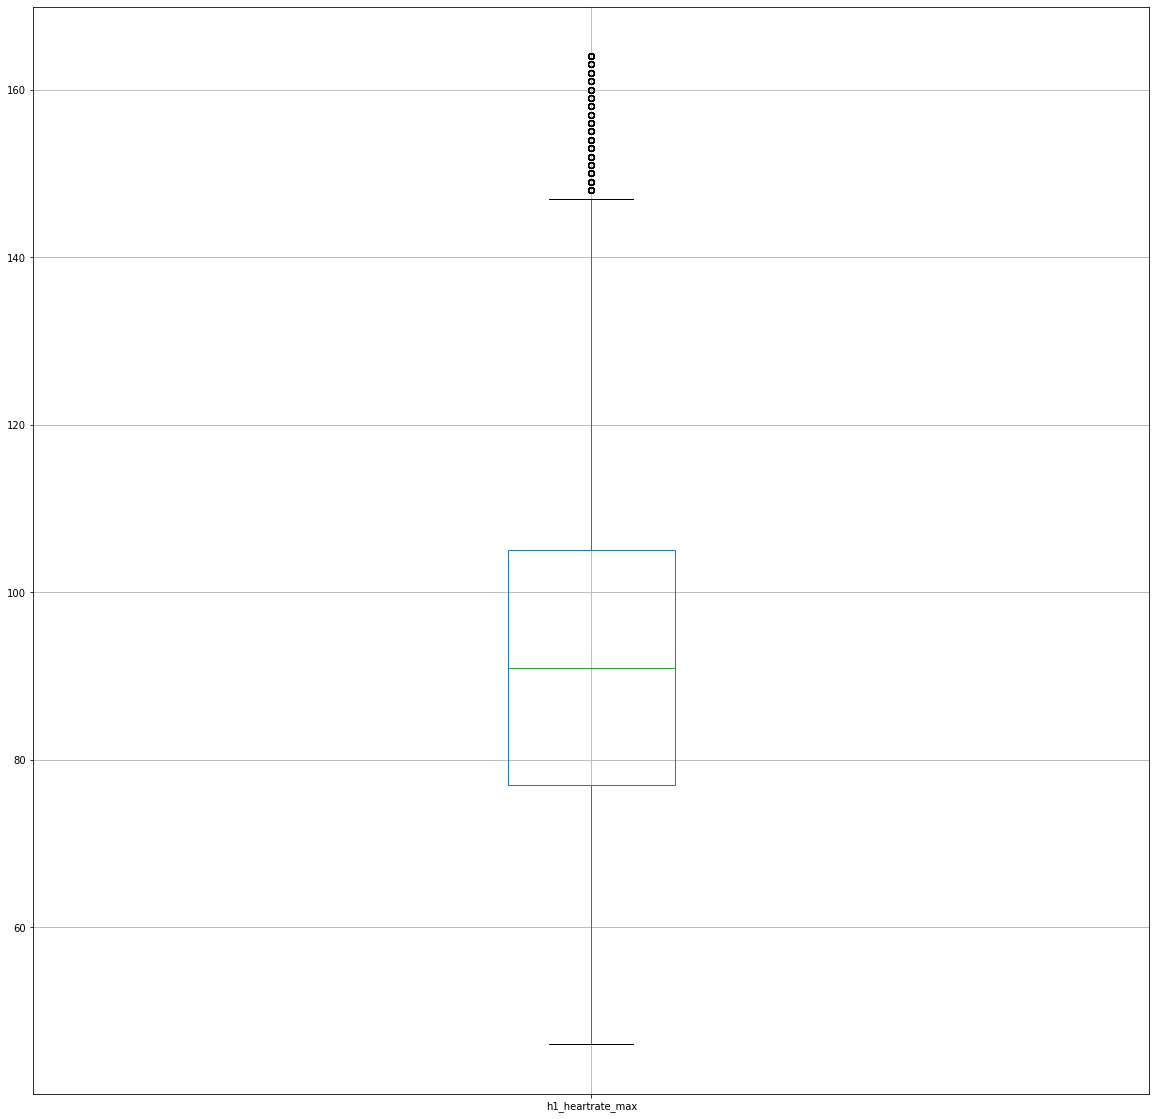

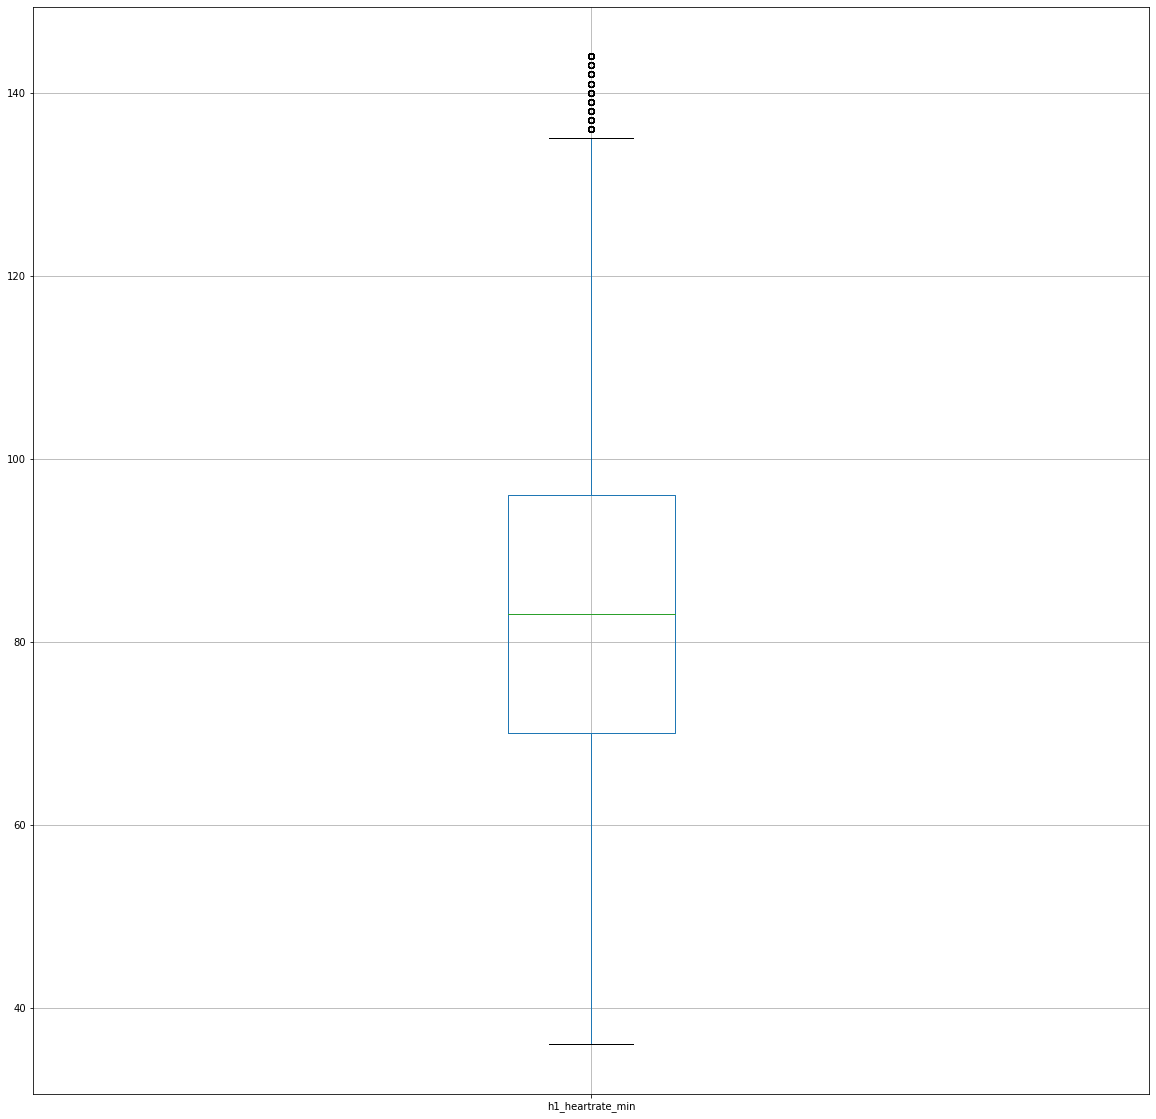

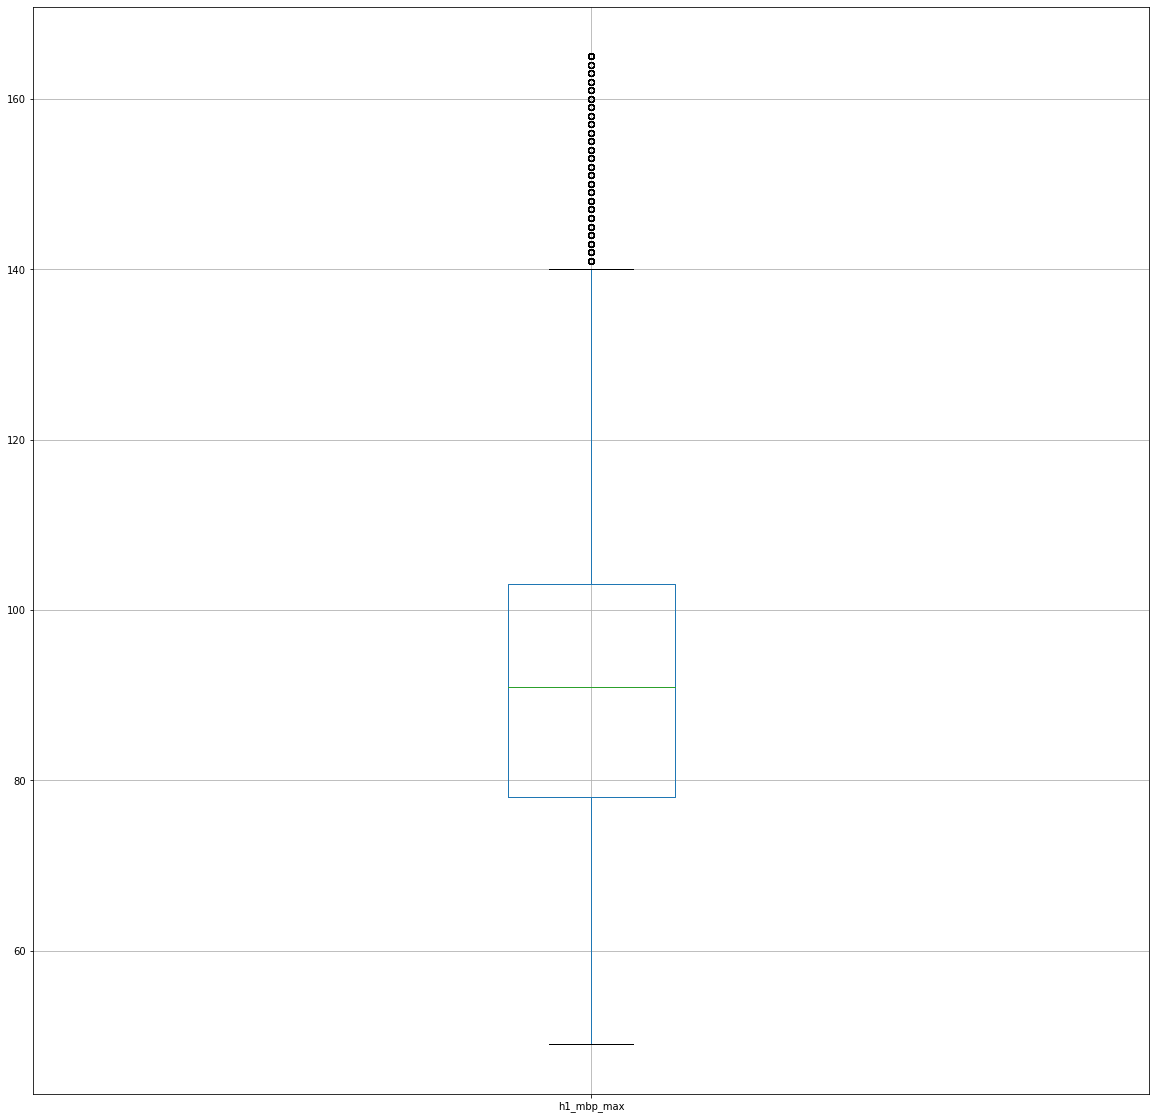

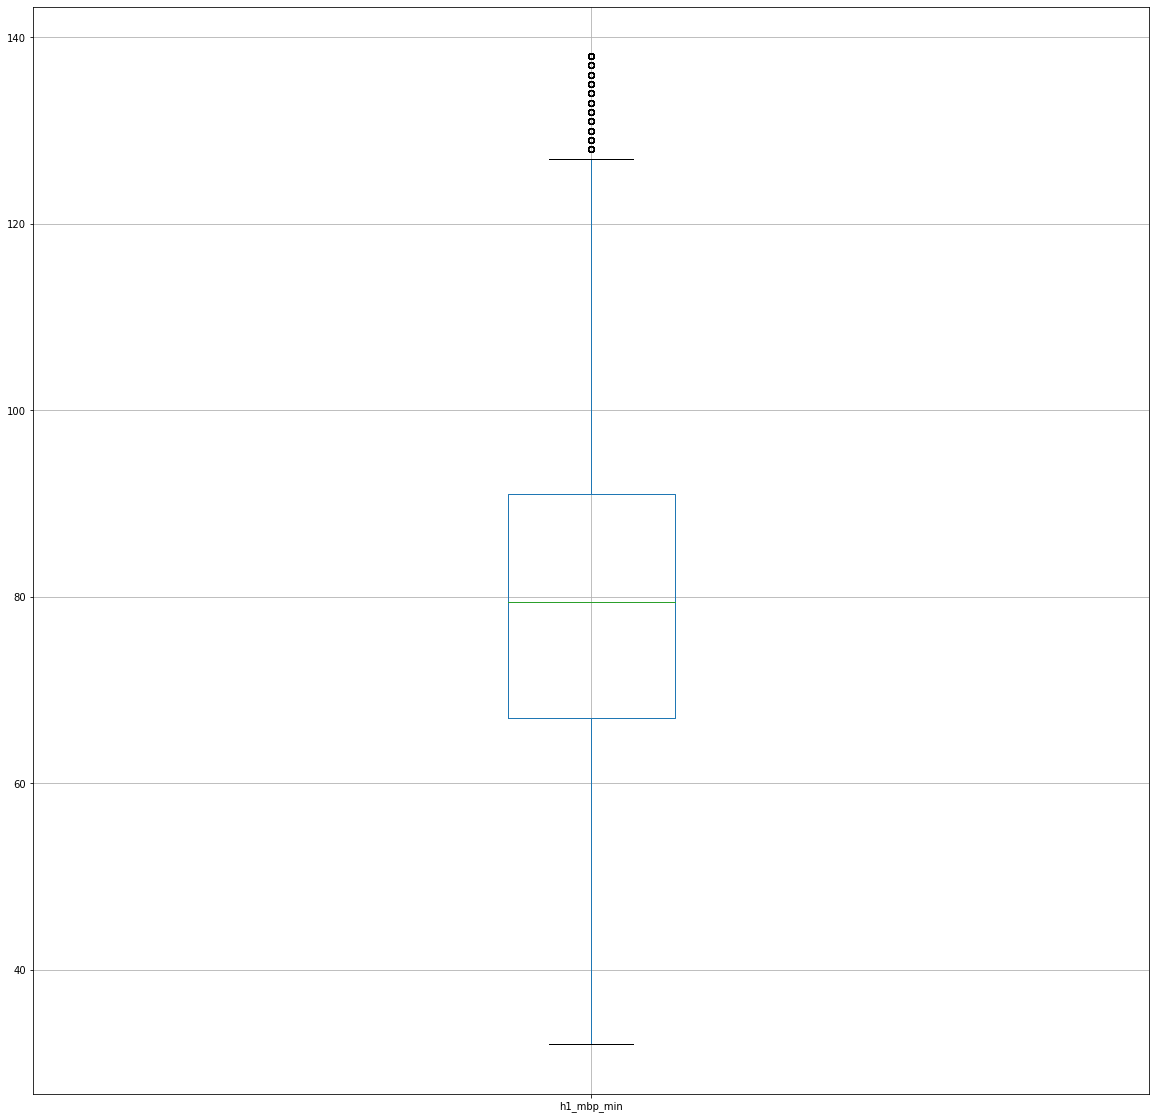

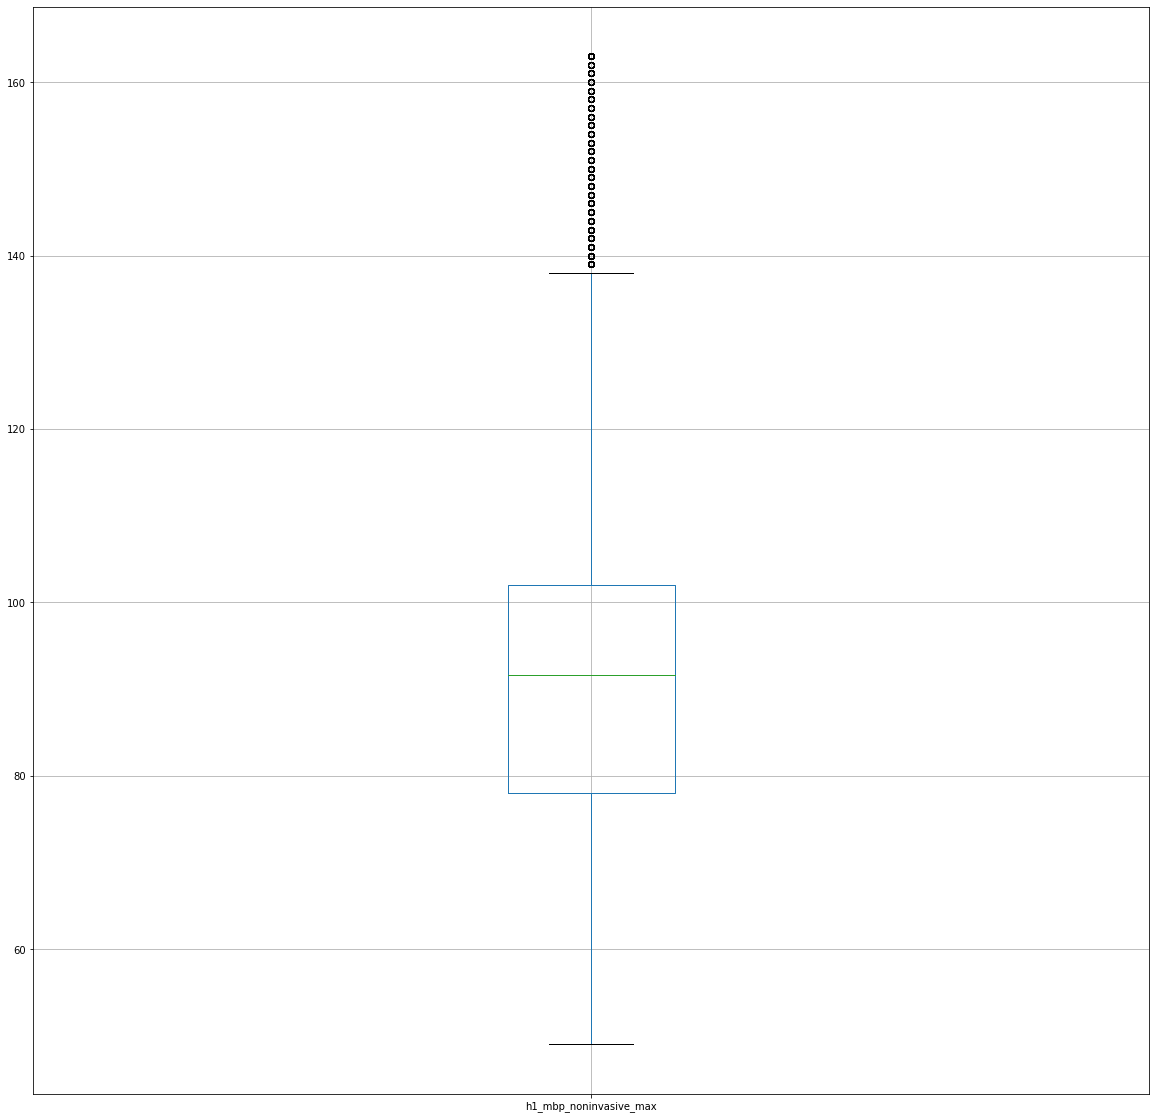

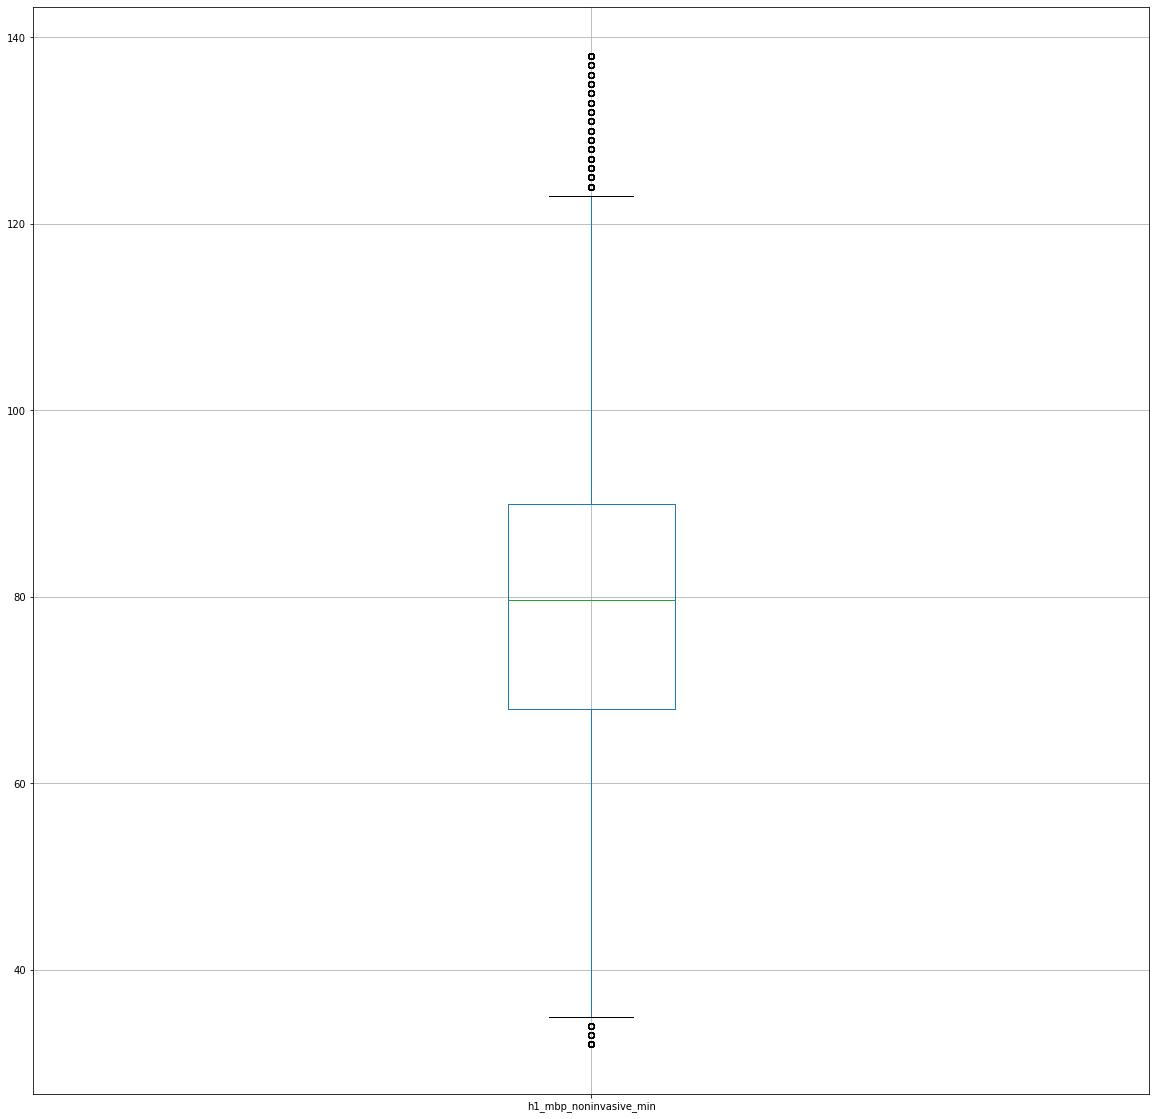

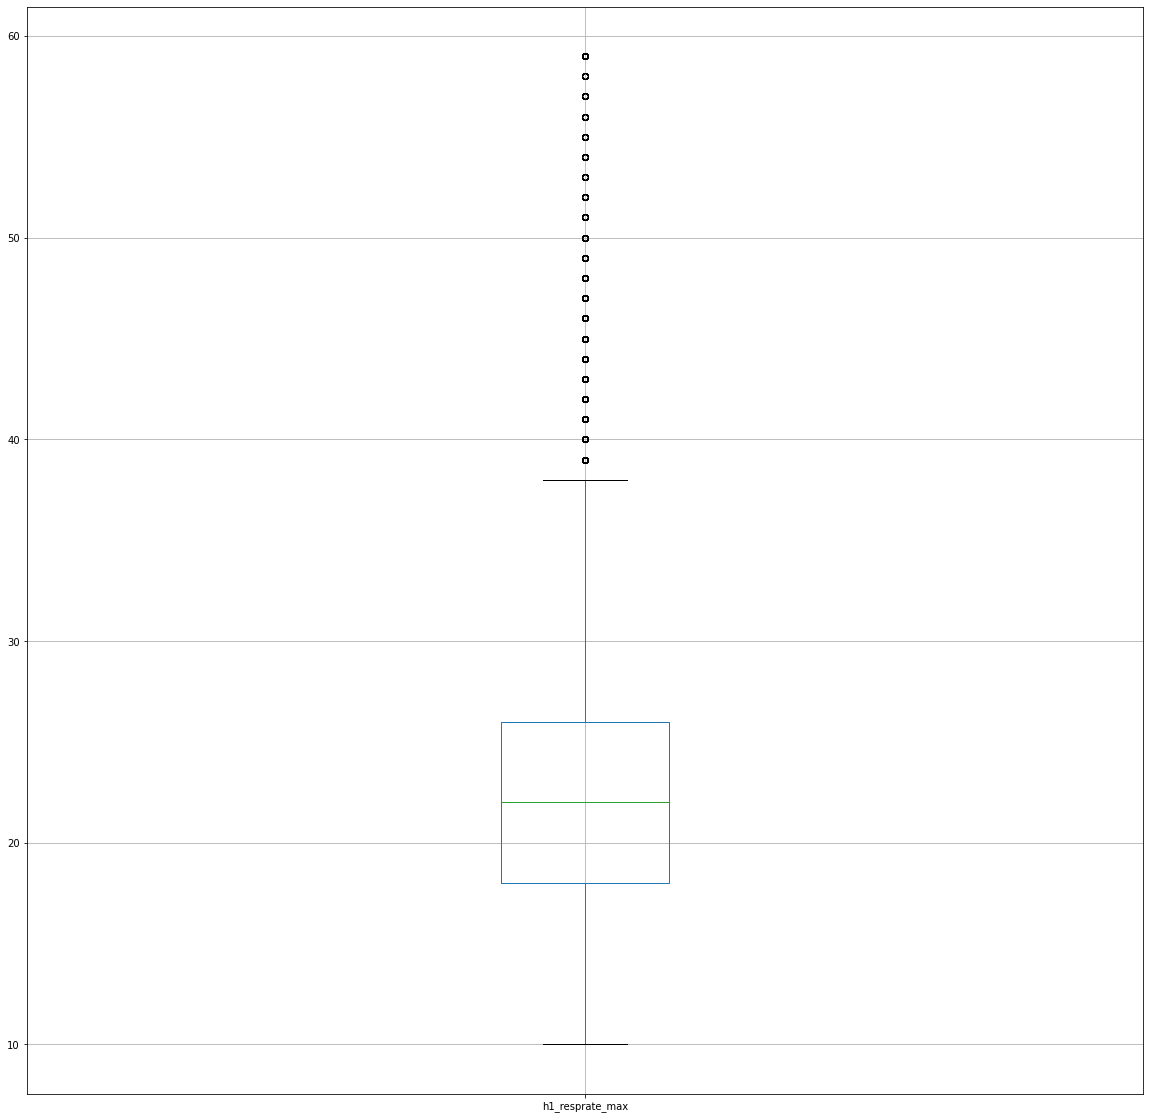

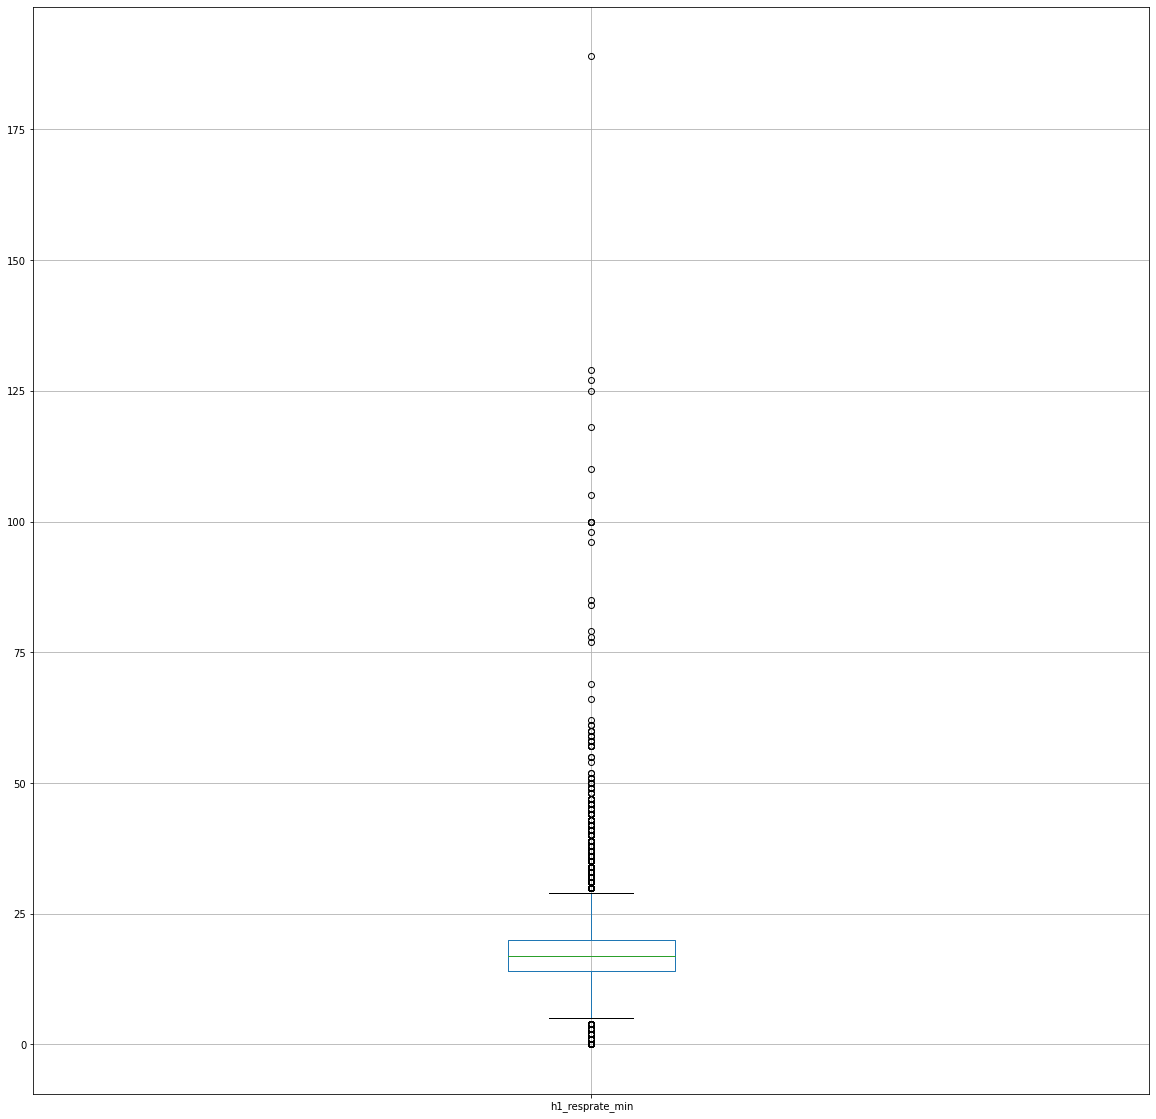

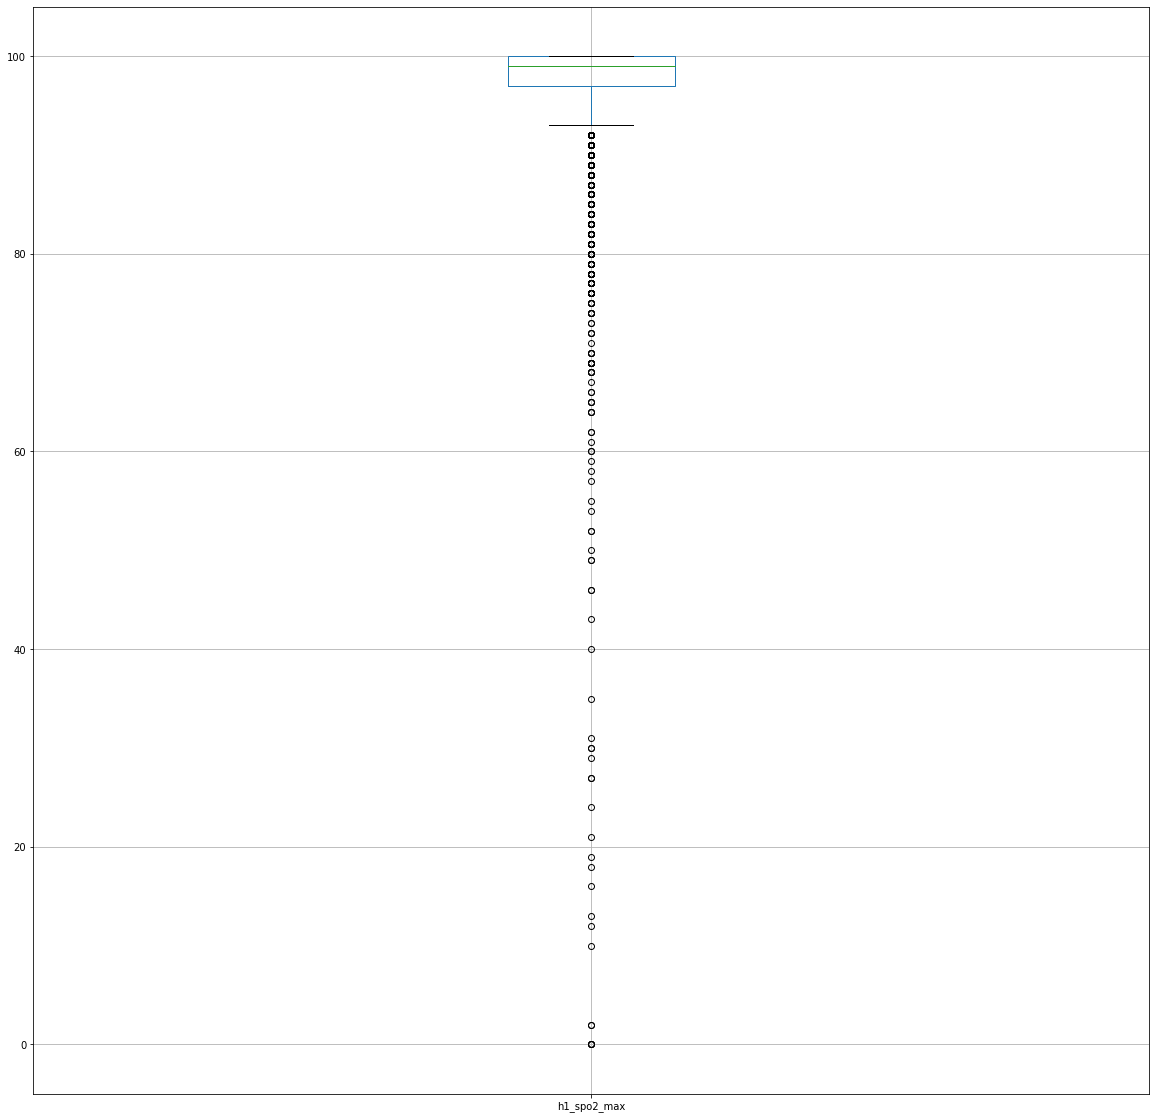

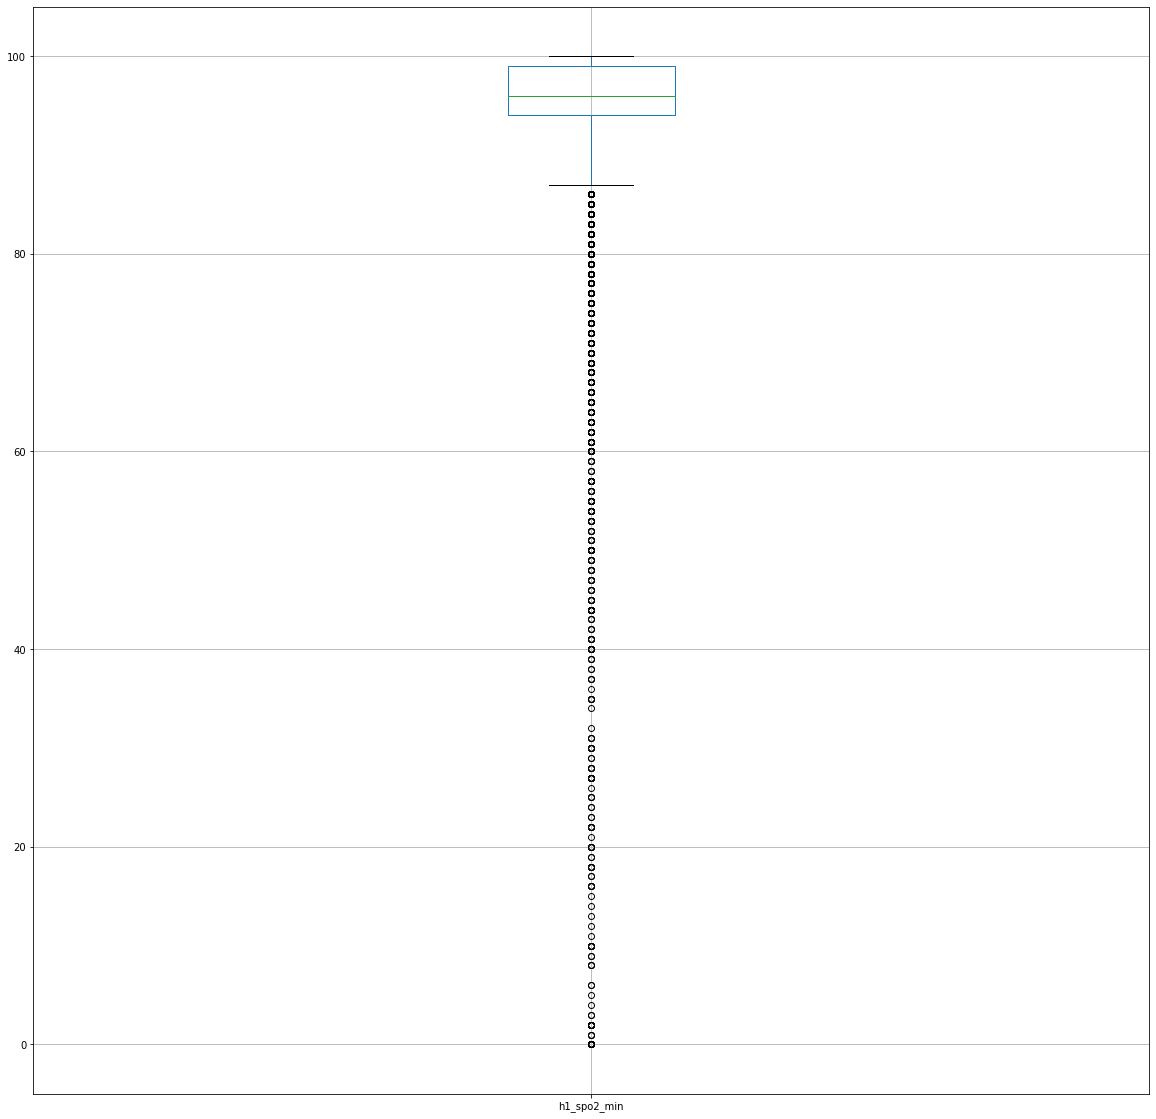

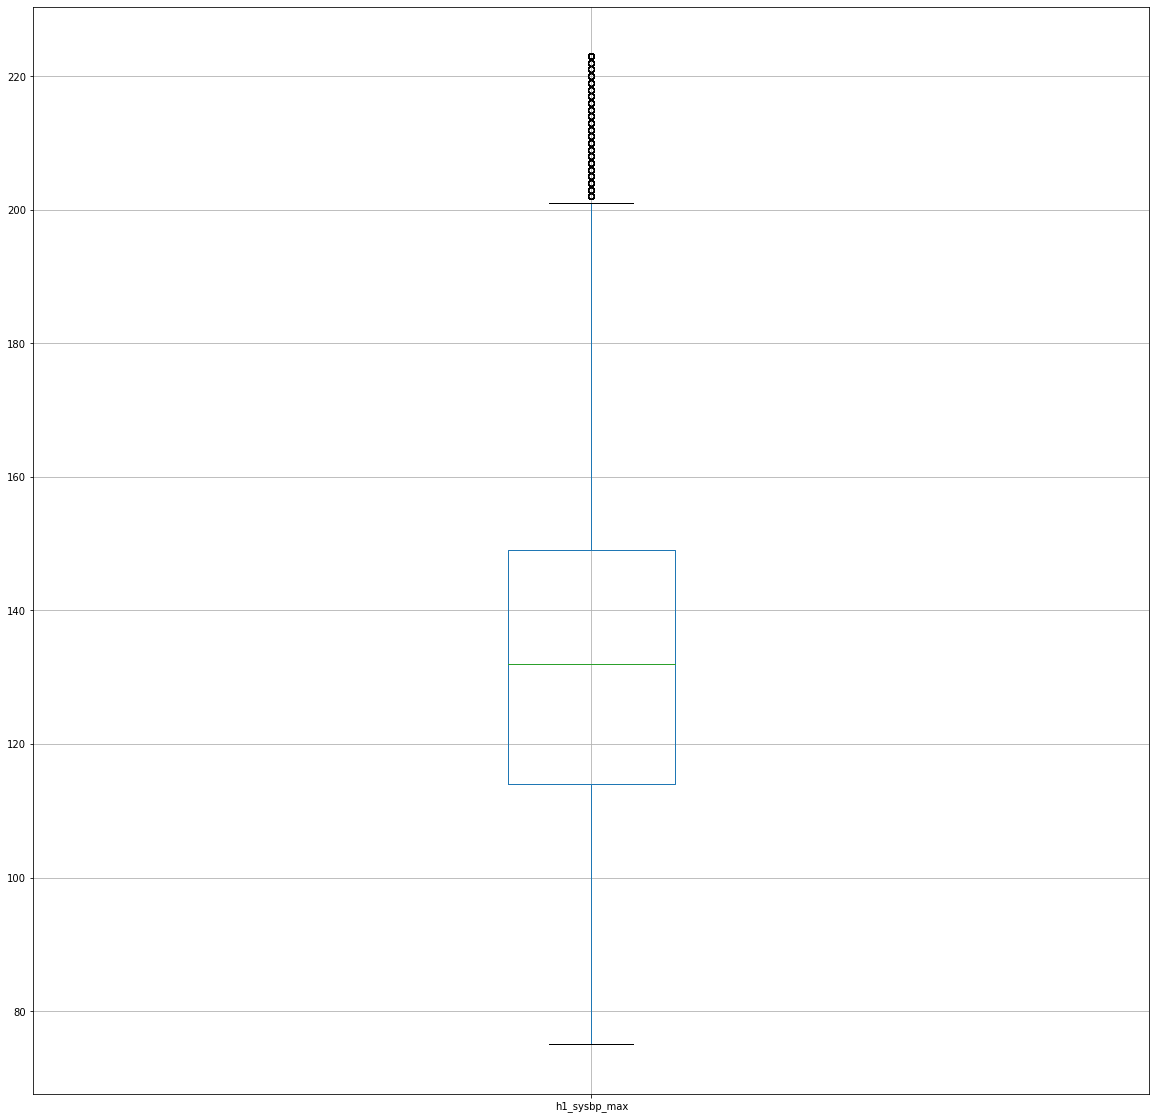

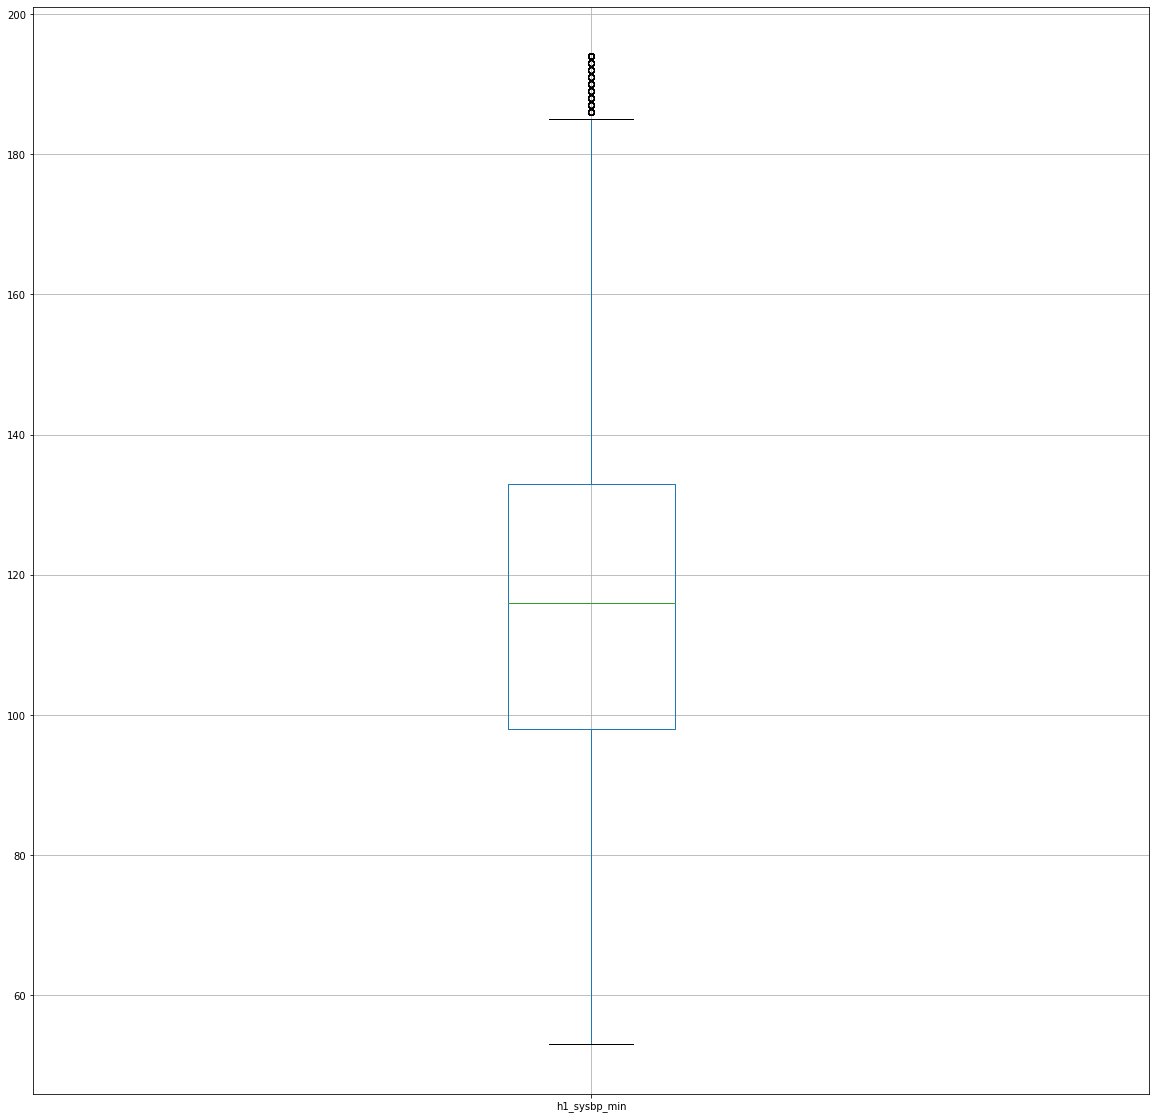

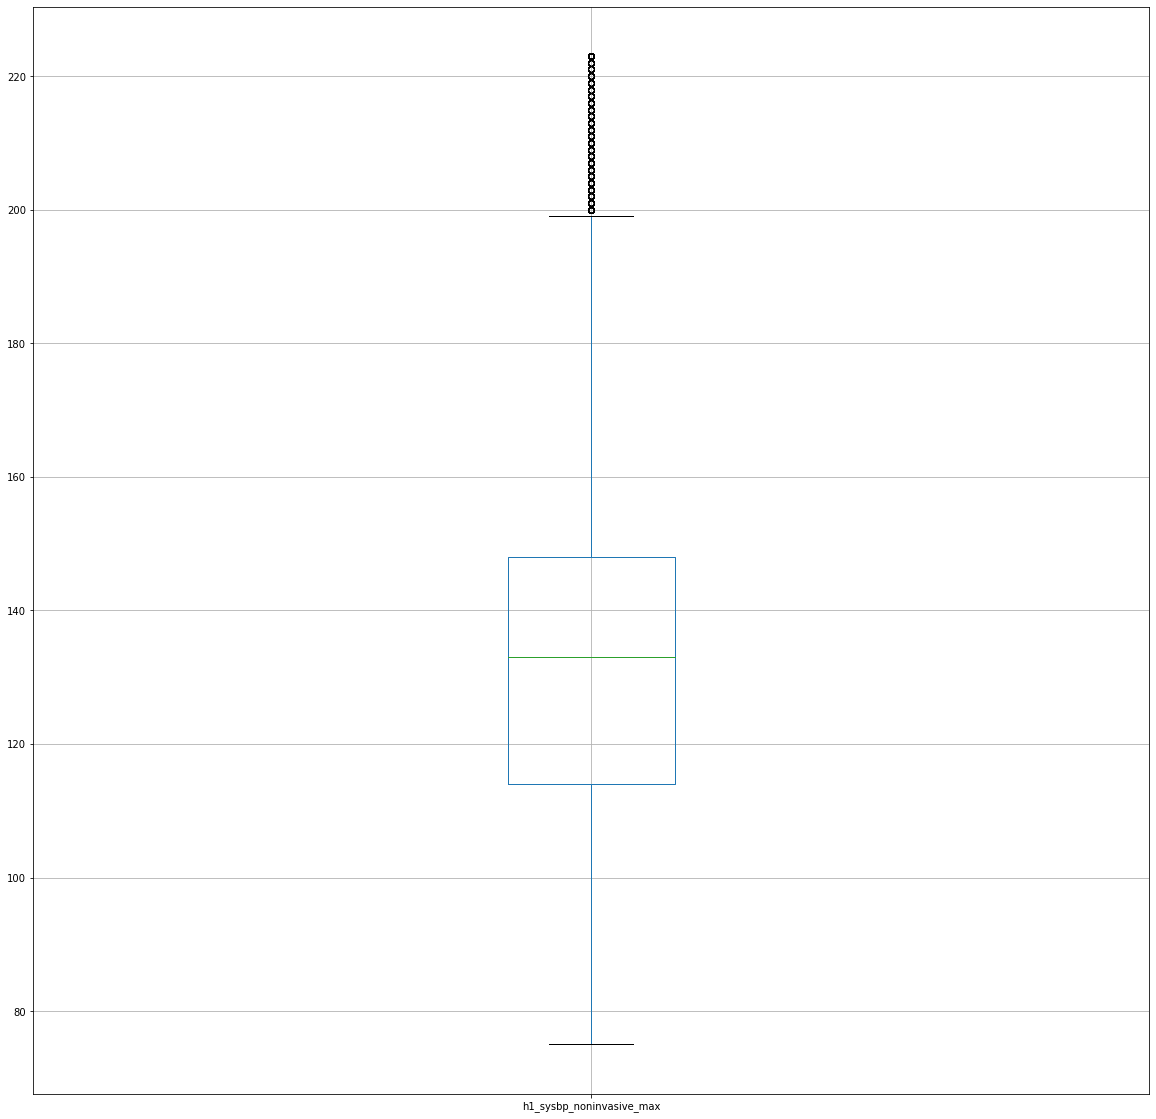

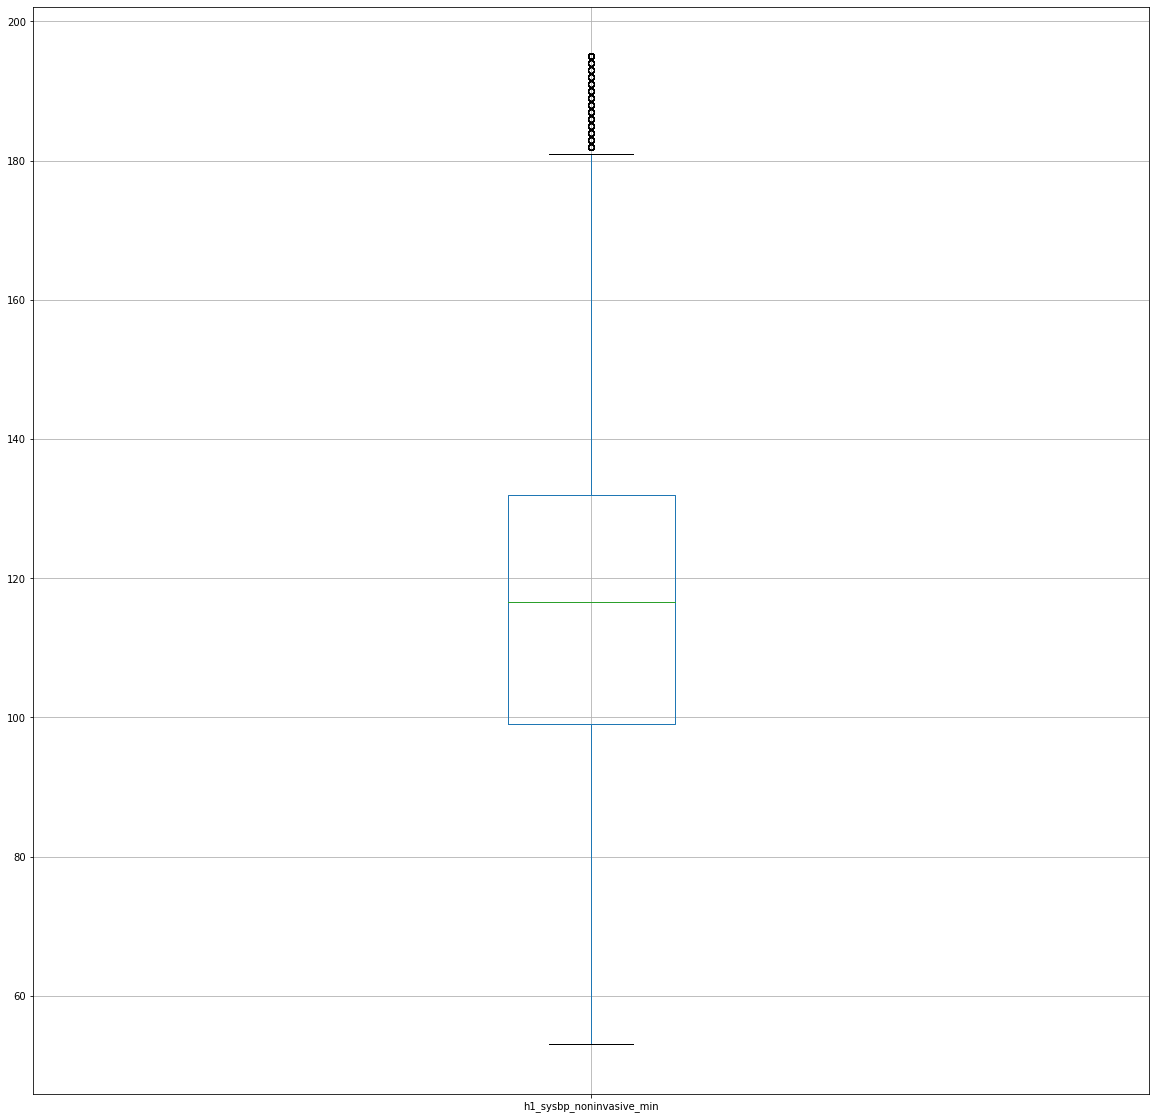

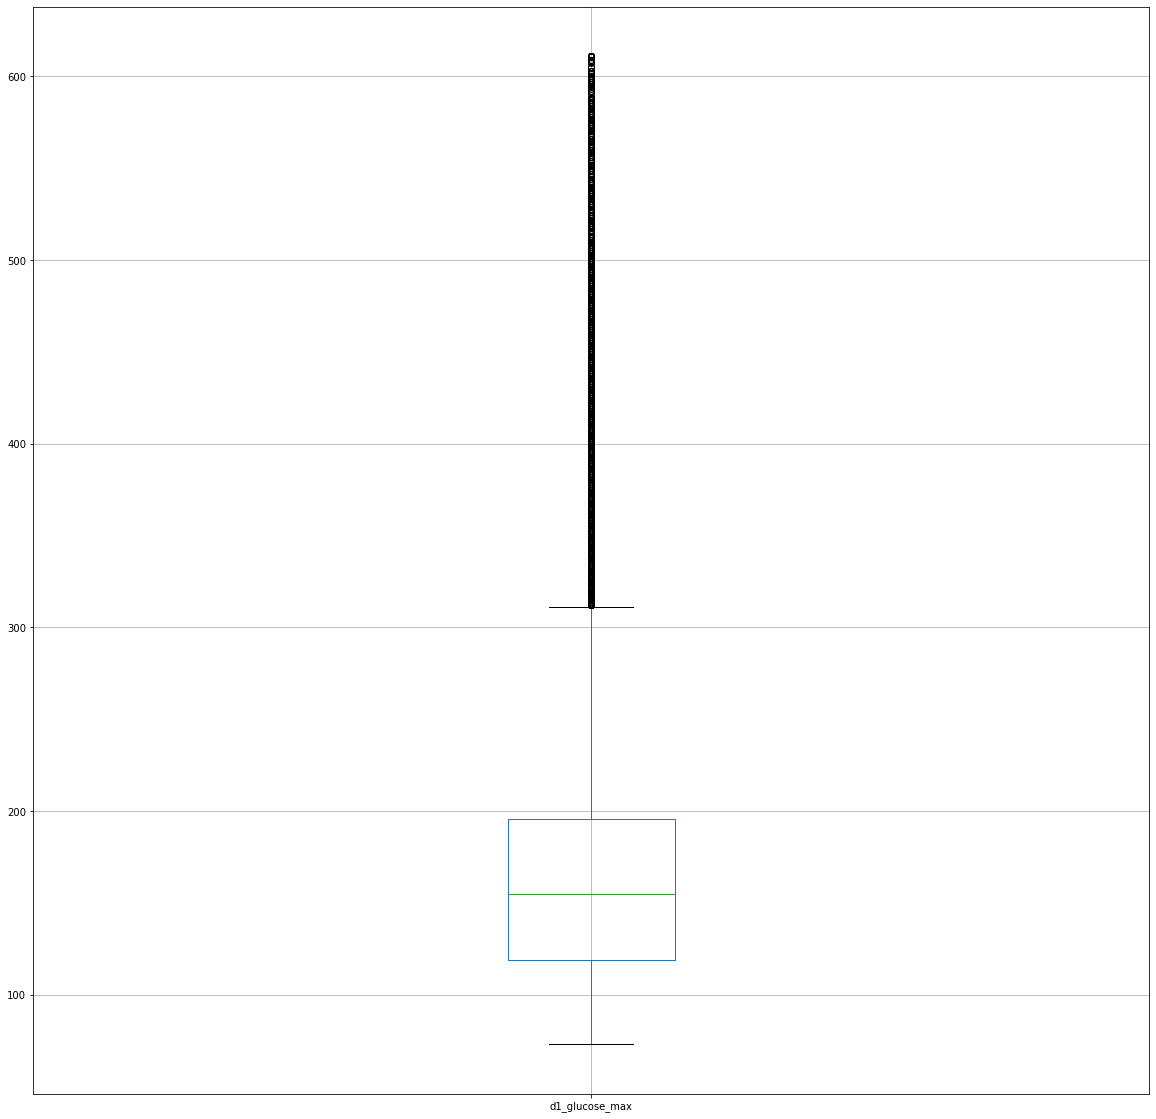

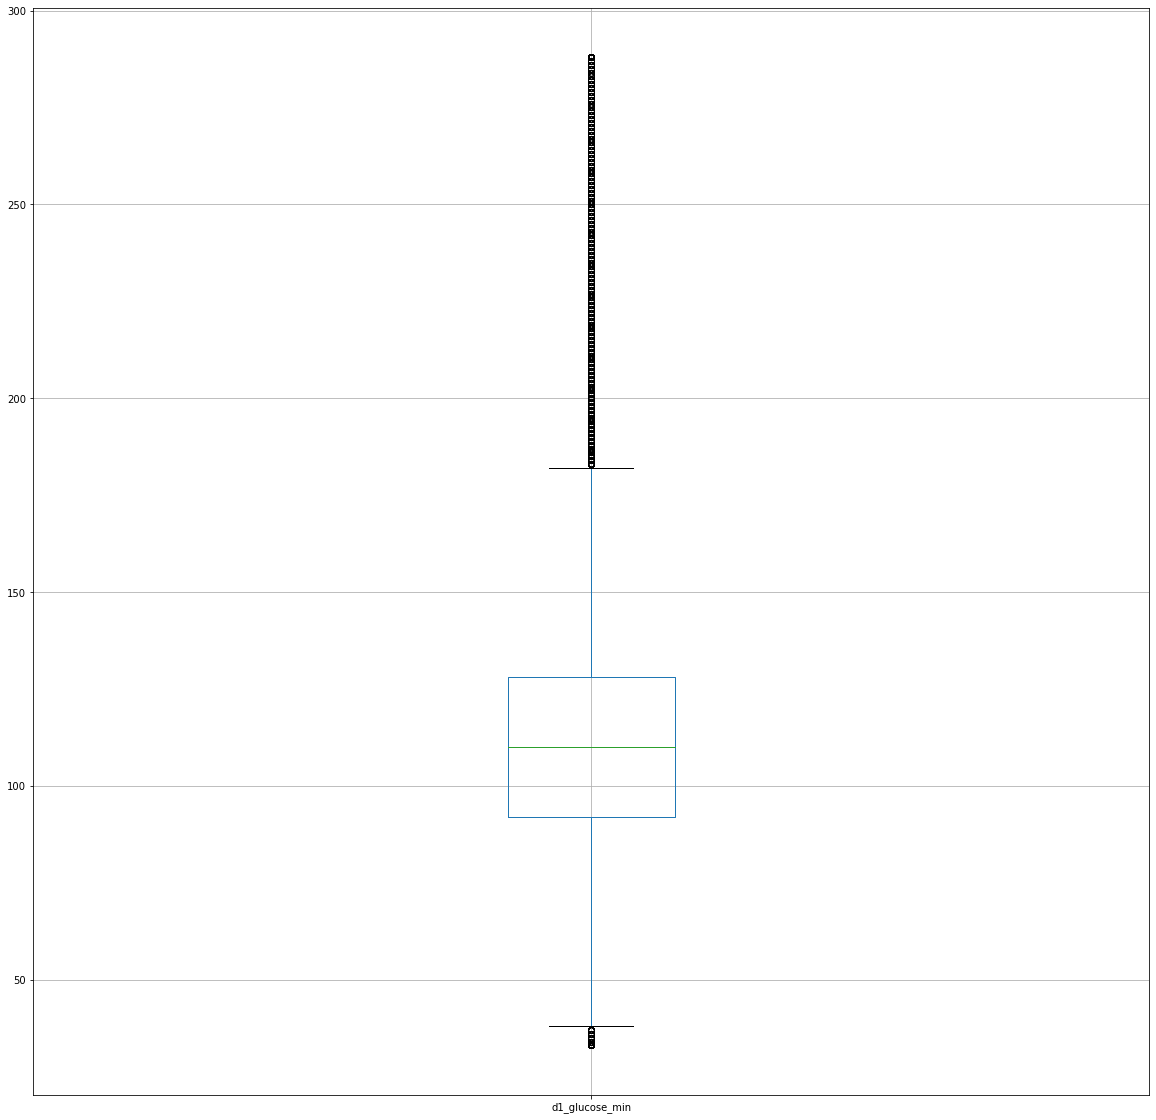

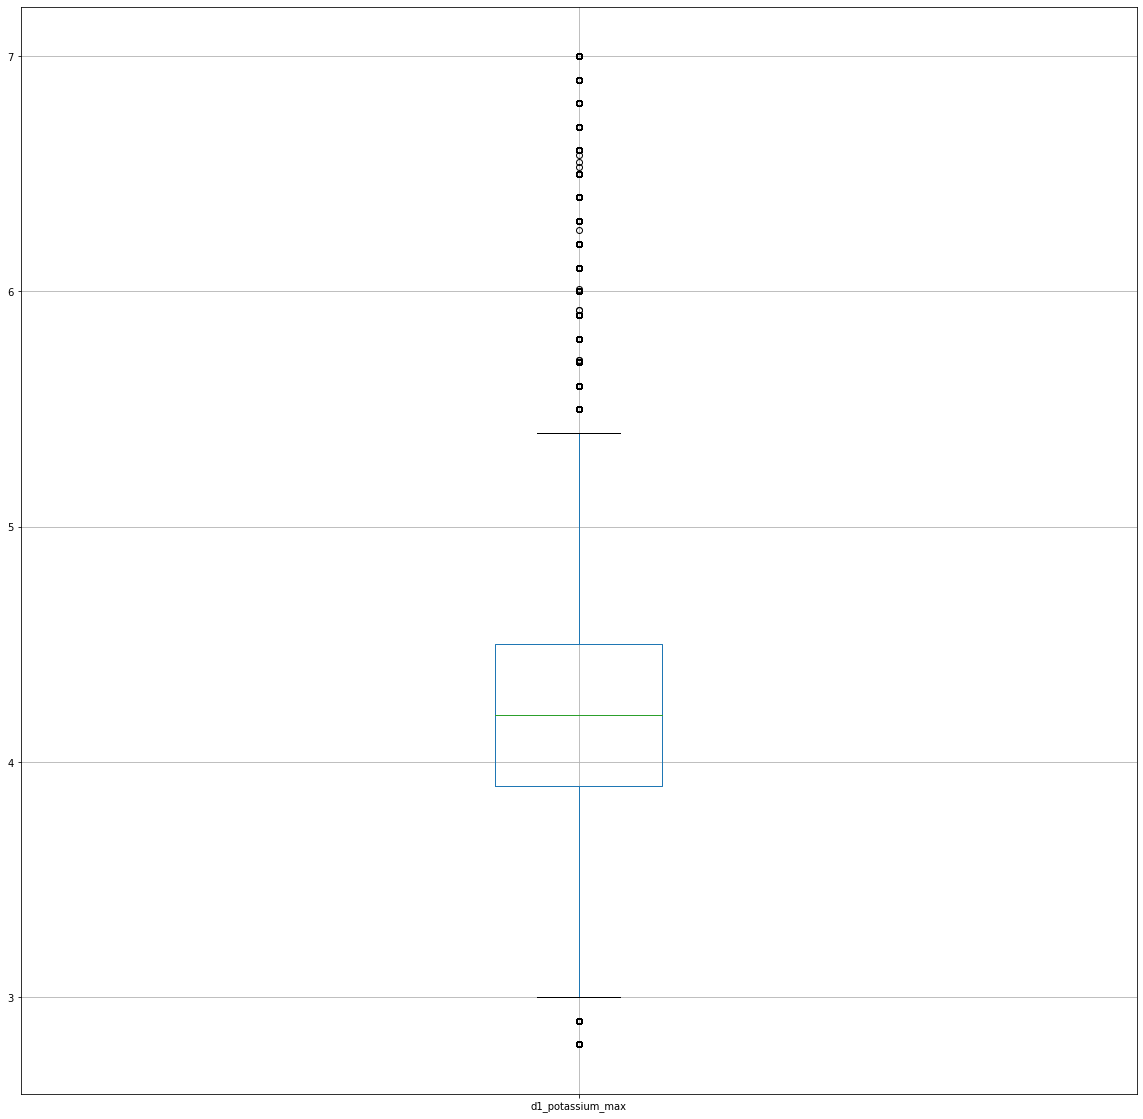

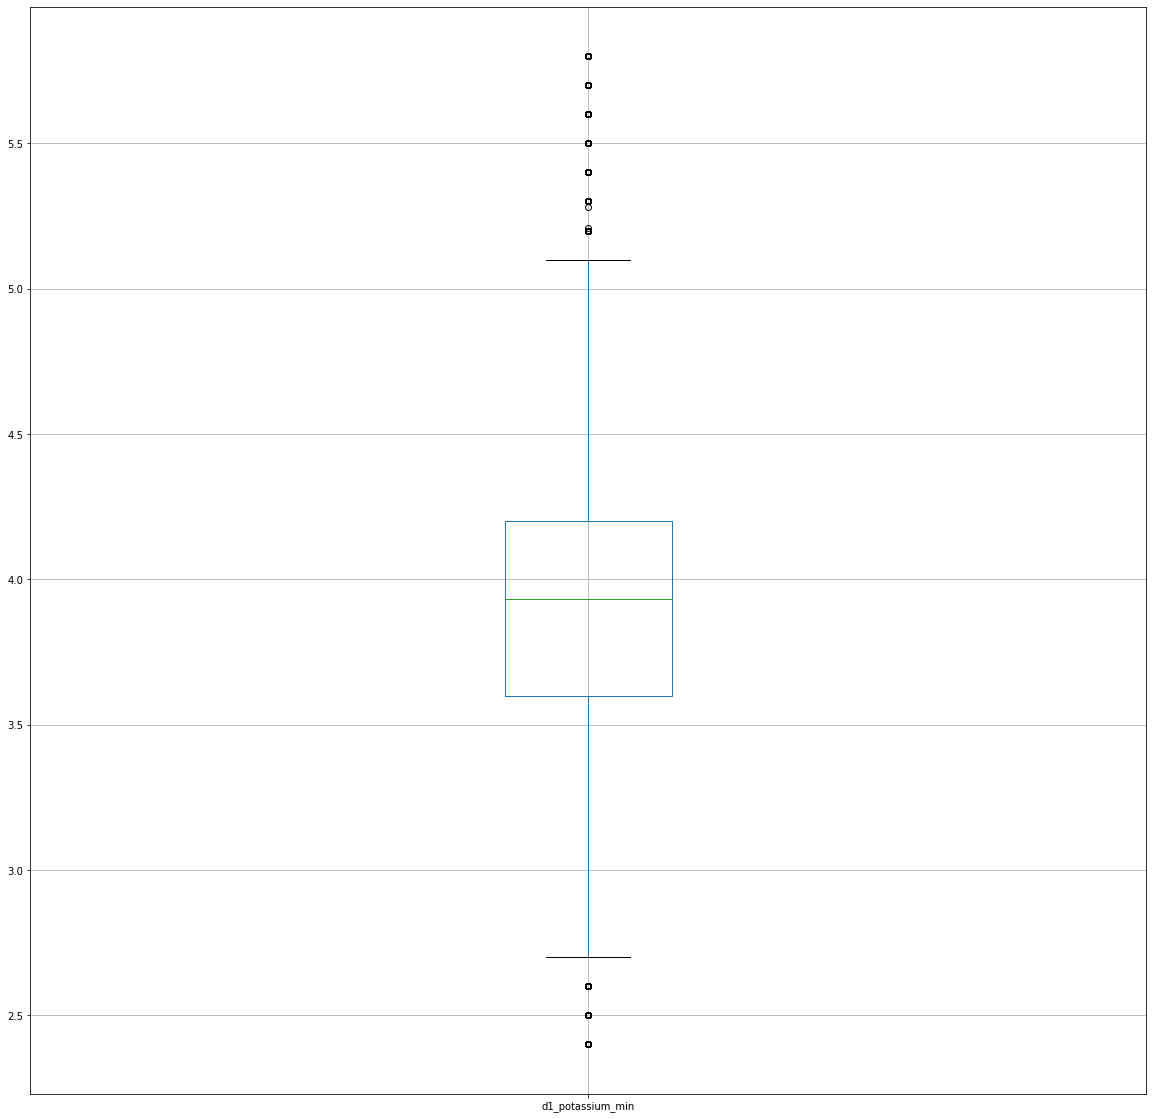

In [ ]:
continous = xtrain1[['age','bmi','height','pre_icu_los_days','weight','d1_diasbp_max','d1_diasbp_min',
                    'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min',
                    'd1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max',
                    'd1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min',
                    'd1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min',
                    'h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min',
                    'h1_heartrate_max','h1_heartrate_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max',
                    'h1_mbp_noninvasive_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_max',
                    'h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','d1_glucose_max',
                    'd1_glucose_min','d1_potassium_max','d1_potassium_min']]

for column in continous:
    fig = plt.figure(figsize=(20,20))
    continous.boxplot([column])

Next we take a look at two boxplots for each continous variable, one for patients who survived,
and one for patients who died. This will come in handy later when assesing the most important predictors of death,
and whether or not lower or higher values of these are more dangerous.

C:\Users\450G2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\450G2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\450G2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\450G2\anacond

<AxesSubplot:xlabel='hospital_death', ylabel='d1_potassium_min'>

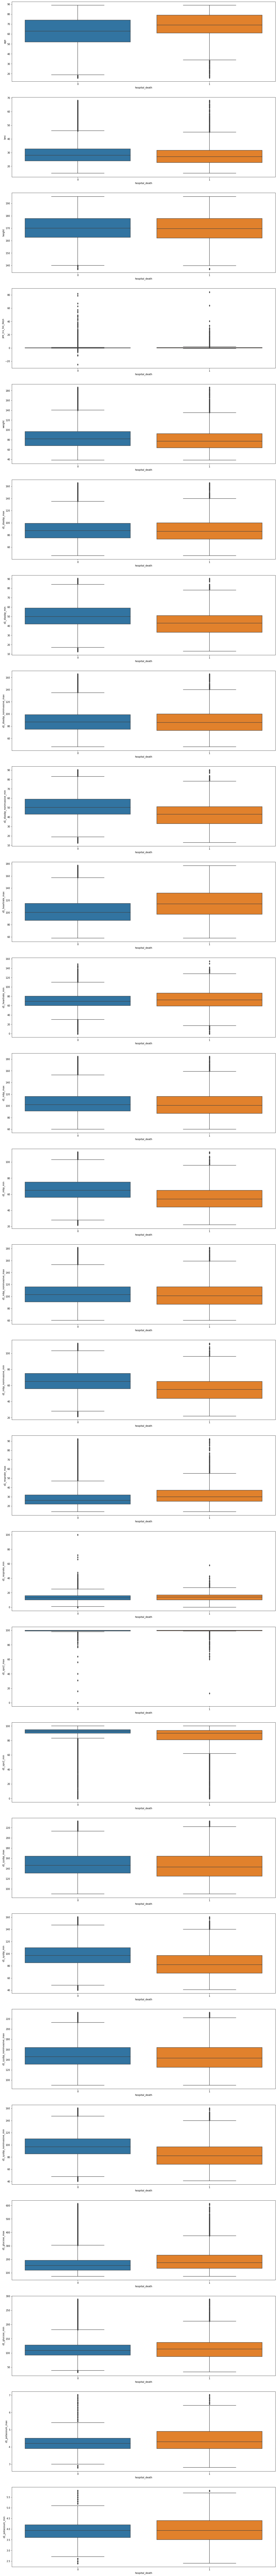

In [ ]:
plt.figure(figsize=(20,200))
plt.subplot(27,1,1)
sns.boxplot(xtrain1['hospital_death'],xtrain1['age'])
plt.subplot(27,1,2)
sns.boxplot(xtrain1['hospital_death'],xtrain1['bmi'])
plt.subplot(27,1,3)
sns.boxplot(xtrain1['hospital_death'],xtrain1['height'])
plt.subplot(27,1,4)
sns.boxplot(xtrain1['hospital_death'],xtrain1['pre_icu_los_days'])
plt.subplot(27,1,5)
sns.boxplot(xtrain1['hospital_death'],xtrain1['weight'])
plt.subplot(27,1,6)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_diasbp_max'])
plt.subplot(27,1,7)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_diasbp_min'])
plt.subplot(27,1,8)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_diasbp_noninvasive_max'])
plt.subplot(27,1,9)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_diasbp_noninvasive_min'])
plt.subplot(27,1,10)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_heartrate_max'])
plt.subplot(27,1,11)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_heartrate_min'])
plt.subplot(27,1,12)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_mbp_max'])
plt.subplot(27,1,13)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_mbp_min'])
plt.subplot(27,1,14)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_mbp_noninvasive_max'])
plt.subplot(27,1,15)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_mbp_noninvasive_min'])
plt.subplot(27,1,16)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_resprate_max'])
plt.subplot(27,1,17)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_resprate_min'])
plt.subplot(27,1,18)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_spo2_max'])
plt.subplot(27,1,19)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_spo2_min'])
plt.subplot(27,1,20)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_sysbp_max'])
plt.subplot(27,1,21)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_sysbp_min'])
plt.subplot(27,1,22)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_sysbp_noninvasive_max'])
plt.subplot(27,1,23)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_sysbp_noninvasive_min'])
plt.subplot(27,1,24)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_glucose_max'])
plt.subplot(27,1,25)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_glucose_min'])
plt.subplot(27,1,26)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_potassium_max'])
plt.subplot(27,1,27)
sns.boxplot(xtrain1['hospital_death'],xtrain1['d1_potassium_min'])



Here I'll create a couple of interaction features based on the boxplots. Age, max heartrate, and max resprate all look significantly higher for patients who died.

In [ ]:
xtrain1['age_heart_d1'] = xtrain1['age']*xtrain1['d1_heartrate_max']
xtrain1['age_resp_d1'] = xtrain1['age']*xtrain1['d1_resprate_max']




In [ ]:
xtrain1.head()

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M,age_heart_d1,age_resp_d1
49846,81.0,26.393430,0,180.30,523,0.141667,85.80,0,0.0,4.0,6.0,1.0,5.0,63.0,1.0,53.0,38.0,36.417603,1.0,72.0,45.0,72.0,45.0,86.0,63.0,88.0,53.0,88.0,53.0,38.0,0.0,100.0,93.0,117.0,69.0,117.0,69.0,37.288762,36.270299,66.0,50.0,66.0,50.0,86.0,73.0,77.000000,58.000000,77.000000,58.000000,38.0,15.0,100.0,99.0,100.0,75.0,100.0,75.0,125.000000,125.000000,3.200000,3.200000,0.28000,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6966.0,3078.0
16754,47.0,26.597686,0,165.10,290,0.105556,72.50,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,64.0,35.0,36.100000,0.0,79.0,46.0,79.0,46.0,115.0,85.0,88.0,62.0,88.0,62.0,36.0,5.0,100.0,99.0,126.0,91.0,126.0,91.0,36.900000,36.100000,57.0,57.0,57.0,57.0,106.0,106.0,68.000000,68.000000,68.000000,68.000000,28.0,28.0,100.0,100.0,111.0,111.0,111.0,111.0,240.000000,146.000000,3.900000,3.500000,0.03000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5405.0,1692.0
22487,61.0,25.308642,0,180.00,317,0.068750,82.00,0,0.0,4.0,6.0,0.0,5.0,52.0,0.0,76.0,8.0,36.500000,0.0,84.0,63.0,84.0,63.0,83.0,54.0,101.0,78.0,101.0,78.0,21.0,8.0,98.0,92.0,158.0,126.0,158.0,126.0,37.000000,36.500000,78.0,64.0,78.0,64.0,75.0,54.0,78.000000,78.000000,78.000000,78.000000,17.0,16.0,98.0,92.0,145.0,128.0,145.0,128.0,100.000000,100.000000,4.250211,3.932904,0.01000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5063.0,1281.0
8415,83.0,23.831131,0,149.86,143,0.019444,53.52,0,1.0,3.0,6.0,0.0,5.0,97.0,0.0,47.0,11.0,38.500000,0.0,52.0,30.0,52.0,30.0,74.0,68.0,67.0,49.0,67.0,49.0,20.0,11.0,100.0,90.0,115.0,83.0,115.0,83.0,38.500000,37.700000,48.0,48.0

In [ ]:
xtrain1.info(max_cols=1500)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 49846 to 24227
Data columns (total 112 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    age                                         55027 non-null  float64
 1    bmi                                         55027 non-null  float64
 2    elective_surgery                            55027 non-null  int64  
 3    height                                      55027 non-null  float64
 4    icu_id                                      55027 non-null  int64  
 5    pre_icu_los_days                            55027 non-null  float64
 6    weight                                      55027 non-null  float64
 7    apache_post_operative                       55027 non-null  int64  
 8    arf_apache                                  55027 non-null  float64
 9    gcs_eyes_apache                             55027 non-null  float6

For the random forest and gradient boosted models we will use the data as it currently is. For my logistic regression model I'll
select a smaller number of features, mainly to avoid multicollinearity. Many of these variables are closesly related.

In [ ]:
cont_features = xtrain1[['age','bmi','weight','d1_diasbp_min','d1_heartrate_max','d1_mbp_min','d1_resprate_max',
                        'd1_spo2_min','d1_sysbp_min','d1_glucose_max','d1_potassium_max']]
extra_columns = xtrain1[['apache_4a_hospital_death_prob','apache_4a_icu_death_prob']]





In [ ]:
more = xtrain1.iloc[:,7:18]
more.head()
end = xtrain1.iloc[:,63:113]



In [ ]:
logistic = pd.concat([cont_features,extra_columns,more,end],axis=1)
logistic.head()

,age,bmi,weight,d1_diasbp_min,d1_heartrate_max,d1_mbp_min,d1_resprate_max,d1_spo2_min,d1_sysbp_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M,age_heart_d1,age_resp_d1
49846,81.0,26.393430,85.80,45.0,86.0,53.0,38.0,93.0,69.0,125.000000,3.200000,0.28000,0.160000,0,0.0,4.0,6.0,1.0,5.0,63.0,1.0,53.0,38.0,36.417603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6966.0,3078.0
16754,47.0,26.597686,72.50,46.0,115.0,62.0,36.0,99.0,91.0,240.000000,3.900000,0.03000,0.020000,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,64.0,35.0,36.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5405.0,1692.0
22487,61.0,25.308642,82.00,63.0,83.0,78.0,21.0,92.0,126.0,100.000000,4.250211,0.01000,0.000000,0,0.0,4.0,6.0,0.0,5.0,52.0,0.0,76.0,8.0,36.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5063.0,1281.0
8415,83.0,23.831131,53.52,30.0,74.0,49.0,20.0,90.0,83.0,98.000000,4.250211,0.09000,0.040000,0,1.0,3.0,6.0,0.0,5.0,97.0,0.0,47.0,11.0,38.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6142.0,1660.0
43912,20.0,20.576132,54.00,54.0,105.0,63.0,18.0,100.0,98.0,174.427455,4.250211,0.08786,0.044926,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,63.0,17.0,36.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2100.0,360.0


In [ ]:
pd.set_option('display.max_rows',None,'display.max_columns',None)
corrs = logistic.corr()
corrs1 = corrs.abs().unstack()
corrs1_sorted = corrs1.sort_values(ascending=False)
print(corrs1_sorted)

age                                         age                                           1.000000e+00
temp_apache                                 temp_apache                                   1.000000e+00
cirrhosis                                   cirrhosis                                     1.000000e+00
diabetes_mellitus                           diabetes_mellitus                             1.000000e+00
hepatic_failure                             hepatic_failure                               1.000000e+00
immunosuppression                           immunosuppression                             1.000000e+00
leukemia                                    leukemia                                      1.000000e+00
lymphoma                                    lymphoma                                      1.000000e+00
solid_tumor_with_metastasis                 solid_tumor_with_metastasis                   1.000000e+00
hospital_death                              hospital_death               

In [ ]:
logistic = logistic.drop(columns=['apache_3j_bodysystem_Genitourinary','apache_post_operative','apache_4a_hospital_death_prob',
                                 'weight','d1_diasbp_min','gcs_eyes_apache','heart_rate_apache','d1_sysbp_min',
                                 'gcs_verbal_apache'])
logistic.head()

,age,bmi,d1_heartrate_max,d1_mbp_min,d1_resprate_max,d1_spo2_min,d1_glucose_max,d1_potassium_max,apache_4a_icu_death_prob,arf_apache,gcs_motor_apache,gcs_unable_apache,intubated_apache,map_apache,resprate_apache,temp_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M,age_heart_d1,age_resp_d1
49846,81.0,26.393430,86.0,53.0,38.0,93.0,125.000000,3.200000,0.160000,0.0,6.0,1.0,1.0,53.0,38.0,36.417603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6966.0,3078.0
16754,47.0,26.597686,115.0,62.0,36.0,99.0,240.000000,3.900000,0.020000,0.0,6.0,0.0,0.0,64.0,35.0,36.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5405.0,1692.0
22487,61.0,25.308642,83.0,78.0,21.0,92.0,100.000000,4.250211,0.000000,0.0,6.0,0.0,0.0,76.0,8.0,36.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5063.0,1281.0
8415,83.0,23.831131,74.0,49.0,20.0,90.0,98.000000,4.250211,0.040000,1.0,6.0,0.0,0.0,47.0,11.0,38.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6142.0,1660.0
43912,20.0,20.576132,105.0,63.0,18.0,100.0,174.427455,4.250211,0.044926,0.0,6.0,0.0,0.0,63.0,17.0,36.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2100.0,360.0


In [ ]:
logistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 49846 to 24227
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         55027 non-null  float64
 1   bmi                                         55027 non-null  float64
 2   d1_heartrate_max                            55027 non-null  float64
 3   d1_mbp_min                                  55027 non-null  float64
 4   d1_resprate_max                             55027 non-null  float64
 5   d1_spo2_min                                 55027 non-null  float64
 6   d1_glucose_max                              55027 non-null  float64
 7   d1_potassium_max                            55027 non-null  float64
 8   apache_4a_icu_death_prob                    55027 non-null  float64
 9   arf_apache                                  55027 non-null  float64
 10  gcs_mo

Now I'll run a logistic regression with the data modified especially for a logistic regression. Then a random forest and a gradient boosted model with all the cleaned data from the original stratified training set. For the random forest 500 estimators and using entropy instead of gini impurity as my criterion yielded the best results. For the gredient boosted model 1000 estimators and a max depth of 4, along with a .1 learning rate were used.

In [ ]:
from sklearn.linear_model import LogisticRegression

l = logistic.drop(columns=['hospital_death'])
d = logistic['hospital_death']
l_train,l_test,d_train,d_test = train_test_split(l,d,test_size=.3,random_state=42)
lr = LogisticRegression(max_iter=10000)
lr.fit(l_train,d_train)
predictions = lr.predict(l_test)
print(confusion_matrix(d_test,predictions))
print(classification_report(d_test,predictions))


[[14894   166]
 [ 1159   290]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15060
           1       0.64      0.20      0.30      1449

    accuracy                           0.92     16509
   macro avg       0.78      0.59      0.63     16509
weighted avg       0.90      0.92      0.90     16509



In [ ]:
x = xtrain1.drop(columns=['hospital_death','icu_id'])
Y = xtrain1['hospital_death']
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.3,random_state=66)
rfc = ensemble.RandomForestClassifier(n_estimators=500,criterion='entropy')
rfc.fit(x_train,Y_train)

rfc_predict = rfc.predict(x_test)

print(confusion_matrix(Y_test,rfc_predict))
print(classification_report(Y_test,rfc_predict))


[[14992   135]
 [ 1053   329]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15127
           1       0.71      0.24      0.36      1382

    accuracy                           0.93     16509
   macro avg       0.82      0.61      0.66     16509
weighted avg       0.92      0.93      0.91     16509



In [ ]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.3,random_state=66)
parameters = {'n_estimators':1000,'max_depth':4,'learning_rate':0.1,'loss':'deviance'}
clf = ensemble.GradientBoostingClassifier(**parameters)
clf.fit(x_train,Y_train)

clf_train = clf.predict(x_train)
clf_predict = clf.predict(x_test)

print(confusion_matrix(Y_test,clf_predict))
print(classification_report(Y_test,clf_predict))


[[14809   318]
 [  919   463]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15127
           1       0.59      0.34      0.43      1382

    accuracy                           0.93     16509
   macro avg       0.77      0.66      0.69     16509
weighted avg       0.91      0.93      0.92     16509



As we see all of these models have low recall for the positive class(deceased patients), this is of course due to having such an unbalanced dataset. The random forest had the best performance if precision is the main goal.
My next strategy will be to attempt oversampling, so as to mitigate the low recall. I sort the dataframe by the target variable and select all of the 1 rows and create 9 copies of them to add to the dataframe.

In [ ]:
xtrain3 = xtrain1.sort_values(by=['hospital_death'])




In [ ]:
df = xtrain3[50278:]


In [ ]:
df1 = pd.concat([df]*10,ignore_index=True)

In [ ]:
df1.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47490 entries, 0 to 47489
Data columns (total 112 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    age                                         47490 non-null  float64
 1    bmi                                         47490 non-null  float64
 2    elective_surgery                            47490 non-null  int64  
 3    height                                      47490 non-null  float64
 4    icu_id                                      47490 non-null  int64  
 5    pre_icu_los_days                            47490 non-null  float64
 6    weight                                      47490 non-null  float64
 7    apache_post_operative                       47490 non-null  int64  
 8    arf_apache                                  47490 non-null  float64
 9    gcs_eyes_apache                             47490 non-null  float64
 1

In [ ]:
xtrain5 = pd.concat([xtrain1,df1])

In [ ]:
xtrain5.info(max_cols=235)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102517 entries, 49846 to 47489
Data columns (total 112 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    age                                         102517 non-null  float64
 1    bmi                                         102517 non-null  float64
 2    elective_surgery                            102517 non-null  int64  
 3    height                                      102517 non-null  float64
 4    icu_id                                      102517 non-null  int64  
 5    pre_icu_los_days                            102517 non-null  float64
 6    weight                                      102517 non-null  float64
 7    apache_post_operative                       102517 non-null  int64  
 8    arf_apache                                  102517 non-null  float64
 9    gcs_eyes_apache                             102517 non

For this oversampled data I'll leave out the logistic regression and stick with the random forest and gradient boosted models.

In [ ]:
xo = xtrain5.drop(columns=['hospital_death','icu_id'])
yo = xtrain5['hospital_death']
xo_train,xo_test,yo_train,yo_test = train_test_split(xo,yo,test_size=0.3,random_state=66)

rfc.fit(xo_train,yo_train)
rfc_predict_over = rfc.predict(xo_test)
print(confusion_matrix(yo_test,rfc_predict_over))
print(classification_report(yo_test,rfc_predict_over))


[[14485   415]
 [    0 15856]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     14900
           1       0.97      1.00      0.99     15856

    accuracy                           0.99     30756
   macro avg       0.99      0.99      0.99     30756
weighted avg       0.99      0.99      0.99     30756



In [ ]:
xo_train,xo_test,yo_train,yo_test = train_test_split(xo,yo,test_size=0.3,random_state=66)
clf.fit(xo_train,yo_train)
clf_predicto = clf.predict(xo_test)
print(confusion_matrix(yo_test,clf_predicto))
print(classification_report(yo_test,clf_predicto))


[[13253  1647]
 [  481 15375]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     14900
           1       0.90      0.97      0.94     15856

    accuracy                           0.93     30756
   macro avg       0.93      0.93      0.93     30756
weighted avg       0.93      0.93      0.93     30756



Obviously better results are obtained when this model is trained and tested on a balanced dataset, in this case the model is also being tested on a lot of the data it was trained on, so these results don't mean much. But it's true value will come from it's performance on the test set that was initially created from stratification.

My next strategy will involve undersampling.

In [ ]:
xtrain2 = xtrain1.sort_values(by=['hospital_death'])
xtrain2 = xtrain2[45000:]
xtrain2 = xtrain2.sort_index()

In [ ]:
x1 = xtrain2.drop(columns=['hospital_death','icu_id'])
Y1 = xtrain2['hospital_death']
x1_train,x1_test,Y1_train,Y1_test = train_test_split(x1,Y1,test_size=.3,random_state=66)
rfc.fit(x1_train,Y1_train)

rfc_predict1 = rfc.predict(x1_test)

print(confusion_matrix(Y1_test,rfc_predict1))
print(classification_report(Y1_test,rfc_predict1))


[[1306  279]
 [ 286 1138]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1585
           1       0.80      0.80      0.80      1424

    accuracy                           0.81      3009
   macro avg       0.81      0.81      0.81      3009
weighted avg       0.81      0.81      0.81      3009



In [ ]:
x1_train,x1_test,Y1_train,Y1_test = train_test_split(x1,Y1,test_size=.3,random_state=66)
clf.fit(x1_train,Y1_train)

clf_train1 = clf.predict(x1_train)
clf_predict1 = clf.predict(x1_test)

print(confusion_matrix(Y1_test,clf_predict1))
print(classification_report(Y1_test,clf_predict1))


[[1277  308]
 [ 284 1140]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1585
           1       0.79      0.80      0.79      1424

    accuracy                           0.80      3009
   macro avg       0.80      0.80      0.80      3009
weighted avg       0.80      0.80      0.80      3009



The undersampling trained model will also need to be validated with the stratification test set.

Given that the Random Forest is by far the best performer so far, it will be the only model I'll be using going forward.

The next thing I'll do is to drop all columns that aren't raw medical stats (such as scores). This will be for later on when we look at the columns that were the most important in the random forest decision trees.This way we can also get a report on which traditional raw medical stats may have the greatest impact on patient survival.

In [ ]:
xr = xtrain1.drop(columns=['icu_id','apache_post_operative','arf_apache','gcs_eyes_apache','gcs_motor_apache',
                          'gcs_unable_apache','gcs_verbal_apache','heart_rate_apache','intubated_apache',
                          'map_apache','resprate_apache','temp_apache','ventilated_apache',
                          'apache_4a_hospital_death_prob','apache_4a_icu_death_prob','apache_3j_bodysystem_Gastrointestinal',
                          'apache_3j_bodysystem_Genitourinary','apache_3j_bodysystem_Gynecological',
                          'apache_3j_bodysystem_Hematological','apache_3j_bodysystem_Metabolic',
                          'apache_3j_bodysystem_Musculoskeletal/Skin','apache_3j_bodysystem_Neurological',
                          'apache_3j_bodysystem_Respiratory','apache_3j_bodysystem_Sepsis',
                          'apache_3j_bodysystem_Trauma','apache_2_bodysystem_Gastrointestinal',
                          'apache_2_bodysystem_Haematologic','apache_2_bodysystem_Metabolic','apache_2_bodysystem_Respiratory',
                          'apache_2_bodysystem_Trauma','apache_2_bodysystem_Undefined Diagnoses',
                          'apache_2_bodysystem_Undefined diagnoses','hospital_death'])
xr = xr.drop(xr.columns[99:115],axis=1)
Yr = xtrain1['hospital_death']
xr_train,xr_test,Yr_train,Yr_test = train_test_split(xr,Yr,test_size=0.3,random_state=66)

rfc.fit(xr_train,Yr_train)

rfc_predict3 = rfc.predict(xr_test)

print(confusion_matrix(Yr_test,rfc_predict3))
print(classification_report(Yr_test,rfc_predict3))


[[15056    71]
 [ 1188   194]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15127
           1       0.73      0.14      0.24      1382

    accuracy                           0.92     16509
   macro avg       0.83      0.57      0.60     16509
weighted avg       0.91      0.92      0.90     16509



Next I'll apply all the data cleaning to the stratification test set that was done to the stratification training set.

In [ ]:
testdummies = pd.get_dummies(xtest[['ethnicity','apache_3j_bodysystem','apache_2_bodysystem','icu_admit_source',
                                   'icu_stay_type','icu_type','gender']],drop_first=True)
testdummies.head()

,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M
91346,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16518,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
41492,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
15778,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
60302,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
xtest.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
91346,15057,106379,30,57.0,27.493071,0,Caucasian,F,157.50,Accident & Emergency,906,admit,Neuro ICU,0.036111,68.20,121.0,401.01,0,0.0,3.0,4.0,0.0,1.0,59.0,0.0,168.0,10.0,36.6,1.0,107.0,30.0,107.0,30.0,92.0,59.0,128.0,55.0,128.0,55.0,29.0,10.0,100.0,91.0,210.0,94.0,210.0,94.0,36.9,36.6,91.0,81.0,91.0,81.0,87.0,76.0,105.0,85.0,105.0,85.0,18.0,12.0,98.0,96.0,155.0,115.0,155.0,115.0,94.0,80.0,3.6,3.6,0.29,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0
16518,45464,56172,98,48.0,23.776527,0,Caucasian,M,187.96,Accident & Emergency,267,admit,Med-Surg ICU,0.463194,84.00,105.0,207.01,0,0.0,4.0,6.0,0.0,5.0,123.0,0.0,70.0,11.0,36.8,0.0,85.0,59.0,85.0,59.0,123.0,85.0,97.0,70.0,97.0,70.0,24.0,13.0,99.0,89.0,135.0,95.0,135.0,95.0,37.1,36.8,78.0,76.0,78.0,76.0,114.0,107.0,90.0,89.0,90.0,89.0,21.0,16.0,97.0,94.0,121.0,117.0,121.0,117.0,124.0,113.0,5.0,3.5,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
41492,122419,819,186,31.0,27.932099,0,Caucasian,M,180.00,Operating Room / Recovery,498,admit,Med-Surg ICU,0.029167,90.50,207.0,1602.19,1,0.0,3.0,5.0,0.0,3.0,128.0,0.0,167.0,27.0,36.3,1.0,111.0,34.0,111.0,34.0,114.0,81.0,128.0,44.0,128.0,44.0,27.0,12.0,100.0,72.0,164.0,81.0,164.0,81.0,38.3,36.3,50.0,22.0,NaN,NaN,106.0,99.0,88.0,61.0,NaN,NaN,22.0,17.0,NaN,NaN,150.0,98.0,NaN,NaN,138.0,107.0,5.4,4.3,0.05,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
15778,89006,10403,116,49.0,21.445786,1,Caucasian,F,162.60,Operating Room / Recovery,307,admit,Med-Surg ICU,0.482639,56.70,213.0,1405.02,1,0.0,4.0,6.0,0.0,5.0,113.0,0.0,71.0,6.0,36.8,0.0,85.0,42.0,85.0,42.0,109.0,83.0,92.0,60.0,92.0,60.0,21.0,6.0,100.0,99.0,140.0,103.0,140.0,103.0,37.0,36.8,67.0,61.0,67.0,61.0,98.0,91.0,80.0,76.0,80.0,76.0,10.0,6.0,100.0,99.0,121.0,115.0,121.0,115.0,251.0,251.0,5.1,5.1,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Gastrointestinal,Gastrointestinal,NaN,0
60302,20334,22240,39,79.0,23.428592,1,Caucasian,M,167.00,Operating Room / Recovery,619,admit,CCU-CTICU,0.207639,65.34,202.0,1205.01,1,0.0,4.0,6.0,0.0,5.0,50.0,0.0,44.0,10.0,36.4,0.0,62.0,34.0,62.0,34.0,70.0,50.0,76.0,44.0,76.0,44.0,23.0,8.0,99.0,90.0,124.0,76.0,124.0,76.0,36.9,36.1,62.0,49.0,62.0,49.0,67.0,50.0,76.0,61.0,76.0,61.0,23.0,8.0,99.0,93.0,124.0,97.0,124.0,97.0,147.0,107.0,4.3,3.8,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0


In [ ]:
xtest1 = pd.concat([xtest,testdummies],axis=1)
xtest1.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M
91346,15057,106379,30,57.0,27.493071,0,Caucasian,F,157.50,Accident & Emergency,906,admit,Neuro ICU,0.036111,68.20,121.0,401.01,0,0.0,3.0,4.0,0.0,1.0,59.0,0.0,168.0,10.0,36.6,1.0,107.0,30.0,107.0,30.0,92.0,59.0,128.0,55.0,128.0,55.0,29.0,10.0,100.0,91.0,210.0,94.0,210.0,94.0,36.9,36.6,91.0,81.0,91.0,81.0,87.0,76.0,105.0,85.0,105.0,85.0,18.0,12.0,98.0,96.0,155.0,115.0,155.0,115.0,94.0,80.0,3.6,3.6,0.29,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16518,45464,56172,98,48.0,23.776527,0,Caucasian,M,187.96,Accident & Emergency,267,admit,Med-Surg ICU,0.463194,84.00,105.0,207.01,0,0.0,4.0,6.0,0.0,5.0,123.0,0.0,70.0,11.0,36.8,0.0,85.0,59.0,85.0,59.0,123.0,85.0,97.0,70.0,97.0,70.0,24.0,13.0,99.0,89.0,135.0,95.0,135.0,95.0,37.1,36.8,78.0,76.0,78.0,76.0,114.0,107.0,90.0,89.0,90.0,89.0,21.0,16.0,97.0,94.0,121.0,117.0,121.0,117.0,124.0,113.0,5.0,3.5,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
41492,122419,819,186,31.0,27.932099,0,Caucasian,M,180.00,Operating Room / Recovery,498,admit,Med-Surg ICU,0.029167,90.50,207.0,1602.19,1,0.0,3.0,5.0,0.0,3.0,128.0,0.0,167.0,27.0,36.3,1.0,111.0,34.0,111.0,34.0,114.0,81.0,128.0,44.0,128.0,44.0,27.0,12.0,100.0,72.0,164.0,81.0,164.0,81.0,38.3,36.3,50.0,22.0,NaN,NaN,106.0,99.0,88.0,61.0,NaN,NaN,22.0,17.0,NaN,NaN,150.0,98.0,NaN,NaN,138.0,107.0,5.4,4.3,0.05,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,

In [ ]:
xtest1 = xtest1.drop(xtest1.columns[83],axis=1)
xtest1 = xtest1.select_dtypes(exclude=['object'])
xtest1.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M
91346,15057,106379,30,57.0,27.493071,0,157.50,906,0.036111,68.20,121.0,401.01,0,0.0,3.0,4.0,0.0,1.0,59.0,0.0,168.0,10.0,36.6,1.0,107.0,30.0,107.0,30.0,92.0,59.0,128.0,55.0,128.0,55.0,29.0,10.0,100.0,91.0,210.0,94.0,210.0,94.0,36.9,36.6,91.0,81.0,91.0,81.0,87.0,76.0,105.0,85.0,105.0,85.0,18.0,12.0,98.0,96.0,155.0,115.0,155.0,115.0,94.0,80.0,3.6,3.6,0.29,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16518,45464,56172,98,48.0,23.776527,0,187.96,267,0.463194,84.00,105.0,207.01,0,0.0,4.0,6.0,0.0,5.0,123.0,0.0,70.0,11.0,36.8,0.0,85.0,59.0,85.0,59.0,123.0,85.0,97.0,70.0,97.0,70.0,24.0,13.0,99.0,89.0,135.0,95.0,135.0,95.0,37.1,36.8,78.0,76.0,78.0,76.0,114.0,107.0,90.0,89.0,90.0,89.0,21.0,16.0,97.0,94.0,121.0,117.0,121.0,117.0,124.0,113.0,5.0,3.5,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
41492,122419,819,186,31.0,27.932099,0,180.00,498,0.029167,90.50,207.0,1602.19,1,0.0,3.0,5.0,0.0,3.0,128.0,0.0,167.0,27.0,36.3,1.0,111.0,34.0,111.0,34.0,114.0,81.0,128.0,44.0,128.0,44.0,27.0,12.0,100.0,72.0,164.0,81.0,164.0,81.0,38.3,36.3,50.0,22.0,NaN,NaN,106.0,99.0,88.0,61.0,NaN,NaN,22.0,17.0,NaN,NaN,150.0,98.0,NaN,NaN,138.0,107.0,5.4,4.3,0.05,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
15778,89006,10403,116,49.0,21.445786,1,162.60,307,0.482639,56.70,213.0,1405.02,1,0.0,4.0,6.0,0.0,5.0,113.0,0.0,71.0,6.0,36.8,0.0,85.0,42.0,85.0,42.0,109.0,83.0,92.0,60.0,92.0,60.0,21.0,6.0,100.0,99.0,140.0,103.0,140.0,103.0,37.0,36.8,67.0,61.0,67.0,61.0,98.0,91.0,80.0,76.0,80.0,76.0,10.0,6.0,100.0,99.0,121.0,115.0,

In [ ]:
xtest1.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36686 entries, 91346 to 58736
Data columns (total 115 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    encounter_id                                36686 non-null  int64  
 1    patient_id                                  36686 non-null  int64  
 2    hospital_id                                 36686 non-null  int64  
 3    age                                         35000 non-null  float64
 4    bmi                                         35276 non-null  float64
 5    elective_surgery                            36686 non-null  int64  
 6    height                                      36116 non-null  float64
 7    icu_id                                      36686 non-null  int64  
 8    pre_icu_los_days                            36686 non-null  float64
 9    weight                                      35571 non-null  float6

In [ ]:
missing_cat_test = xtest1[['elective_surgery','apache_post_operative','arf_apache','gcs_eyes_apache',
                         'gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache','intubated_apache','ventilated_apache',
                         'aids','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia',
                         'lymphoma','solid_tumor_with_metastasis']]

for col in missing_cat_test:
    print('{}{}'.format(col,missing_cat_test[col].mode()))

elective_surgery0    0
dtype: int64
apache_post_operative0    0
dtype: int64
arf_apache0    0.0
dtype: float64
gcs_eyes_apache0    4.0
dtype: float64
gcs_motor_apache0    6.0
dtype: float64
gcs_unable_apache0    0.0
dtype: float64
gcs_verbal_apache0    5.0
dtype: float64
intubated_apache0    0.0
dtype: float64
ventilated_apache0    0.0
dtype: float64
aids0    0.0
dtype: float64
cirrhosis0    0.0
dtype: float64
diabetes_mellitus0    0.0
dtype: float64
hepatic_failure0    0.0
dtype: float64
immunosuppression0    0.0
dtype: float64
leukemia0    0.0
dtype: float64
lymphoma0    0.0
dtype: float64
solid_tumor_with_metastasis0    0.0
dtype: float64


In [ ]:
xtest1['gcs_eyes_apache'] = xtest1['gcs_eyes_apache'].fillna(4.0)
xtest1['gcs_motor_apache'] = xtest1['gcs_motor_apache'].fillna(6.0)
xtest1['gcs_verbal_apache'] = xtest1['gcs_verbal_apache'].fillna(5.0)
columns = xtest1[['elective_surgery','apache_post_operative','arf_apache','gcs_unable_apache','intubated_apache',
                        'ventilated_apache','aids','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression',
                        'leukemia','lymphoma','solid_tumor_with_metastasis']].fillna(0.0)

for col in columns:
    xtest1[col] = xtest1[col].fillna(1.0)
    
xtest1.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36686 entries, 91346 to 58736
Data columns (total 115 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    encounter_id                                36686 non-null  int64  
 1    patient_id                                  36686 non-null  int64  
 2    hospital_id                                 36686 non-null  int64  
 3    age                                         35000 non-null  float64
 4    bmi                                         35276 non-null  float64
 5    elective_surgery                            36686 non-null  int64  
 6    height                                      36116 non-null  float64
 7    icu_id                                      36686 non-null  int64  
 8    pre_icu_los_days                            36686 non-null  float64
 9    weight                                      35571 non-null  float6

In [ ]:
xtest1 = xtest1.fillna(xtest1.mean())
xtest1 = xtest1.drop(columns=['encounter_id','patient_id','hospital_id','apache_2_diagnosis','apache_3j_diagnosis'])
xtest1.head()

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,gender_M
91346,57.0,27.493071,0,157.50,906,0.036111,68.20,0,0.0,3.0,4.0,0.0,1.0,59.0,0.0,168.0,10.0,36.6,1.0,107.0,30.0,107.0,30.0,92.0,59.0,128.0,55.0,128.0,55.0,29.0,10.0,100.0,91.0,210.0,94.0,210.0,94.0,36.9,36.6,91.0,81.0,91.000000,81.000000,87.0,76.0,105.0,85.0,105.000000,85.000000,18.0,12.0,98.000000,96.000000,155.0,115.0,155.000000,115.000000,94.0,80.0,3.6,3.6,0.29,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16518,48.0,23.776527,0,187.96,267,0.463194,84.00,0,0.0,4.0,6.0,0.0,5.0,123.0,0.0,70.0,11.0,36.8,0.0,85.0,59.0,85.0,59.0,123.0,85.0,97.0,70.0,97.0,70.0,24.0,13.0,99.0,89.0,135.0,95.0,135.0,95.0,37.1,36.8,78.0,76.0,78.000000,76.000000,114.0,107.0,90.0,89.0,90.000000,89.000000,21.0,16.0,97.000000,94.000000,121.0,117.0,121.000000,117.000000,124.0,113.0,5.0,3.5,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
41492,31.0,27.932099,0,180.00,498,0.029167,90.50,1,0.0,3.0,5.0,0.0,3.0,128.0,0.0,167.0,27.0,36.3,1.0,111.0,34.0,111.0,34.0,114.0,81.0,128.0,44.0,128.0,44.0,27.0,12.0,100.0,72.0,164.0,81.0,164.0,81.0,38.3,36.3,50.0,22.0,75.837744,63.292352,106.0,99.0,88.0,61.0,91.587713,79.710942,22.0,17.0,98.054338,95.176385,150.0,98.0,133.114832,116.603619,138.0,107.0,5.4,4.3,0.05,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
15778,49.0,21.445786,1,162.60,307,0.482639,56.70,1,0.0,4.0,6.0,0.0,5.0,113.0,0.0,71.0,6.0,36.8,0.0,85.0,42.0,85.0,42.0,109.0,83.0,92.0,60.0,92.0,60.0,21.0,6.0,100.0,99.0,140.0,103.0,140.0,103.0,37.0,36.8,67.0,61.0,67.000000,61.000000,98.0,91.0,80.0,76.0,80.000000,76.000000,10.0,6.0,100.000000,99.000000,121.0,115.0,121.000000,115.000000,251.0,251

In [ ]:
xtest1.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36686 entries, 91346 to 58736
Data columns (total 110 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    age                                         36686 non-null  float64
 1    bmi                                         36686 non-null  float64
 2    elective_surgery                            36686 non-null  int64  
 3    height                                      36686 non-null  float64
 4    icu_id                                      36686 non-null  int64  
 5    pre_icu_los_days                            36686 non-null  float64
 6    weight                                      36686 non-null  float64
 7    apache_post_operative                       36686 non-null  int64  
 8    arf_apache                                  36686 non-null  float64
 9    gcs_eyes_apache                             36686 non-null  float6

In [ ]:
xtest1['age_heart_d1'] = xtest1['age']*xtest1['d1_heartrate_max']
xtest1['age_resp_d1'] = xtest1['d1_resprate_max']*xtest1['age']

Then we run the random forest model on the regular, oversampled, and undersampled data frame trained models against the stratitifcation test set to see how well it can predict patient survival for unseen data. For this I will train each model on all of the data from each of the three aformentioned dataframes.
In addition I'll also create a version of the raw medical stats dataframe for the stratification test set and train it on the previous raw medical stats dataframe, then test it on the stratification test set.

In [ ]:

X_TEST = xtest1.drop(columns=['hospital_death','icu_id'])
Y_TEST = xtest1['hospital_death']

rfc.fit(x,Y)
rfc_predict_test = rfc.predict(X_TEST)
print(confusion_matrix(Y_TEST,rfc_predict_test))
print(classification_report(Y_TEST,rfc_predict_test))


[[33257   263]
 [ 2407   759]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     33520
           1       0.74      0.24      0.36      3166

    accuracy                           0.93     36686
   macro avg       0.84      0.62      0.66     36686
weighted avg       0.92      0.93      0.91     36686



In [ ]:
Xr_TEST = xtest1.drop(columns=['icu_id','apache_post_operative','arf_apache','gcs_eyes_apache','gcs_motor_apache',
                              'gcs_unable_apache','gcs_verbal_apache','heart_rate_apache','intubated_apache','map_apache',
                              'resprate_apache','temp_apache','ventilated_apache','apache_4a_hospital_death_prob',
                              'apache_4a_icu_death_prob','apache_3j_bodysystem_Gastrointestinal',
                              'apache_3j_bodysystem_Genitourinary','apache_3j_bodysystem_Gynecological',
                              'apache_3j_bodysystem_Hematological','apache_3j_bodysystem_Metabolic',
                              'apache_3j_bodysystem_Musculoskeletal/Skin','apache_3j_bodysystem_Neurological',
                              'apache_3j_bodysystem_Respiratory','apache_3j_bodysystem_Sepsis',
                              'apache_3j_bodysystem_Trauma','apache_2_bodysystem_Gastrointestinal',
                              'apache_2_bodysystem_Haematologic','apache_2_bodysystem_Metabolic',
                              'apache_2_bodysystem_Respiratory',
                              'apache_2_bodysystem_Trauma','apache_2_bodysystem_Undefined Diagnoses',
                              'apache_2_bodysystem_Undefined diagnoses','hospital_death'])
Yr_TEST = xtest1['hospital_death']

rfc.fit(xr,Yr)
rfc_predict_raw = rfc.predict(Xr_TEST)
print(confusion_matrix(Yr_TEST,rfc_predict_raw))
print(classification_report(Yr_TEST,rfc_predict_raw))


[[33407   113]
 [ 2766   400]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33520
           1       0.78      0.13      0.22      3166

    accuracy                           0.92     36686
   macro avg       0.85      0.56      0.59     36686
weighted avg       0.91      0.92      0.89     36686



In [ ]:
rfc.fit(xo,yo)
rfc_predict_over = rfc.predict(X_TEST)
print(confusion_matrix(Y_TEST,rfc_predict_over))
print(classification_report(Y_TEST,rfc_predict_over))


[[32967   553]
 [ 2203   963]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     33520
           1       0.64      0.30      0.41      3166

    accuracy                           0.92     36686
   macro avg       0.79      0.64      0.69     36686
weighted avg       0.91      0.92      0.91     36686



In [ ]:
rfc.fit(x1,Y1)
rfc_predict_under = rfc.predict(X_TEST)
print(confusion_matrix(Y_TEST,rfc_predict_under))
print(classification_report(Y_TEST,rfc_predict_under))

[[27322  6198]
 [  712  2454]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     33520
           1       0.28      0.78      0.42      3166

    accuracy                           0.81     36686
   macro avg       0.63      0.80      0.65     36686
weighted avg       0.91      0.81      0.85     36686



The model that would be best to use here is up for debate. The original random forest has a .74 precision for death predictions, but a terrible recall rate of .24. The undersample trained model has a .78 recall which isn't bad, but a precision of only .28.
Then the model trained on the raw medical stats has the best true positive rate at .78, but a recall of only .13.

  None of these models are really that great at predicting patient survival to be fair. However, that doesn't mean they are entirely useless. The original model with a .73 precision rate for true positives could be useful in determining who has a relatively higher risk of dying. 74% of the people classified as dying actually died, and 93% of the people classified as surviving survived. This means this model does have some predictive capacity despite the bad recall rate of the deaths. This model may be useful when trying to determine patients with a high death risk. The main issue with this model is that being predicted as surviving doesn't really give you much insight. As the percentage of survival predictions and the percentage of people who survived in general are very similar. 
  On the other hand it could be argued that the undersampled model could be useful for determining death risk in general, however low. It properly classified 76% of the deceased patients, yet out of the ones classified as dying, only 28% were actually deaths. Given how many people are at risk in an ICU I'm not sure this undersampled model is best to focus on. I believe focusing on the original model with a .74 true positive rate would be best.
  I think it's clear that, as stated previously, the best use of this model is to determine very high risk patients.
  
  In the next cell we can take a look at the features that were the most important in making the predictions for the first random forest model.

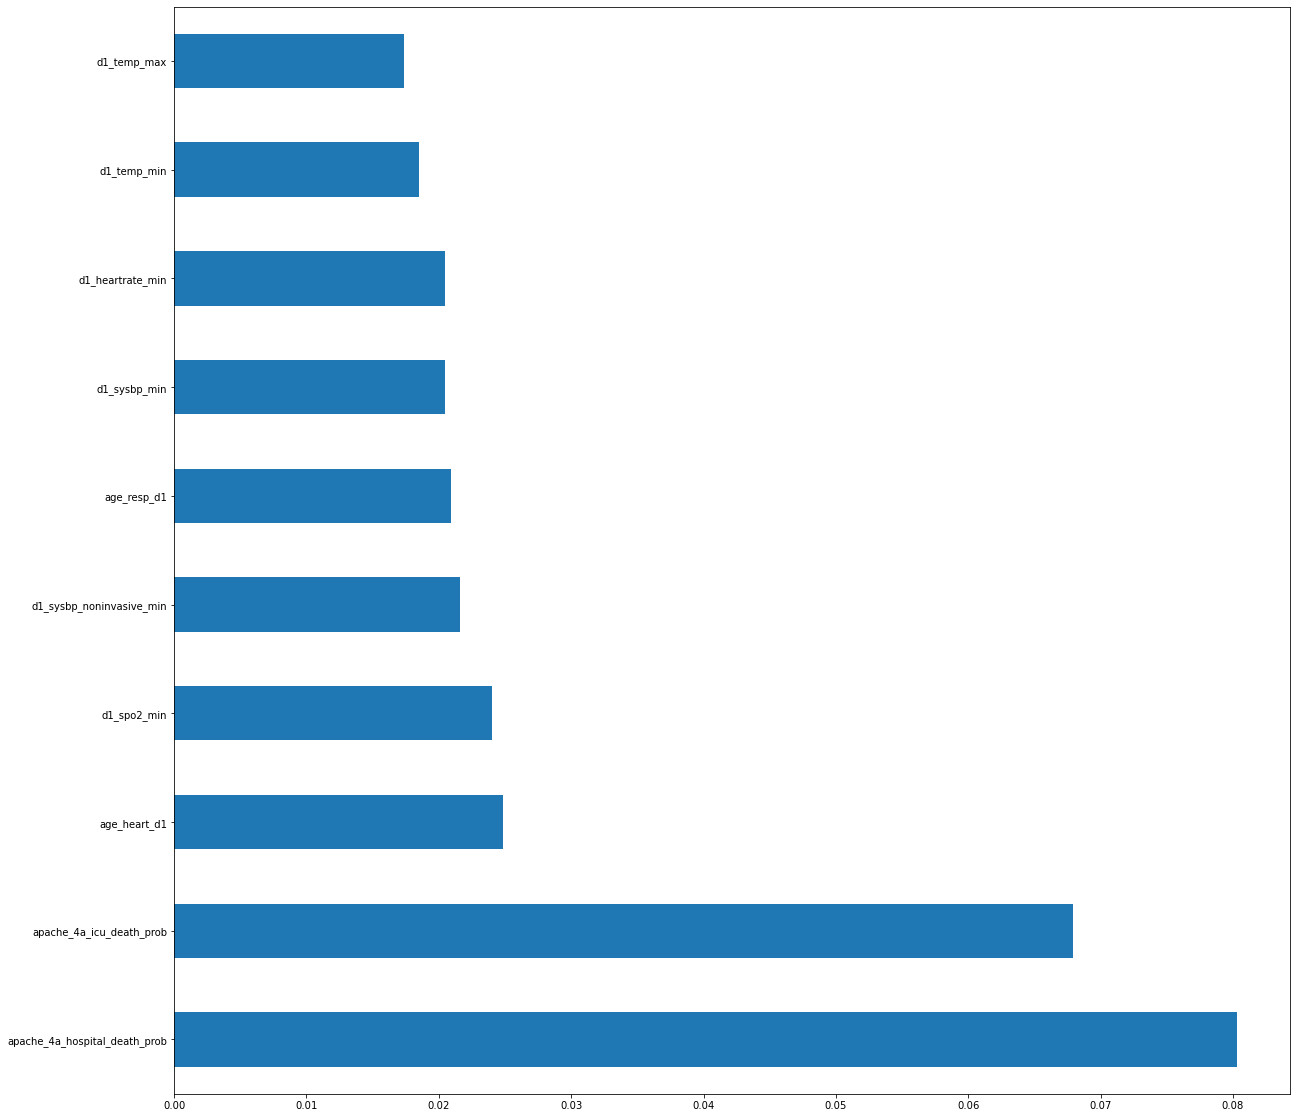

In [ ]:
rfc.fit(x,Y)
fig = plt.figure(figsize=(20,20))
feature_importances = pd.Series(rfc.feature_importances_,index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

Now let's take a look at the most important features for the random forest model run on the raw medical stats.

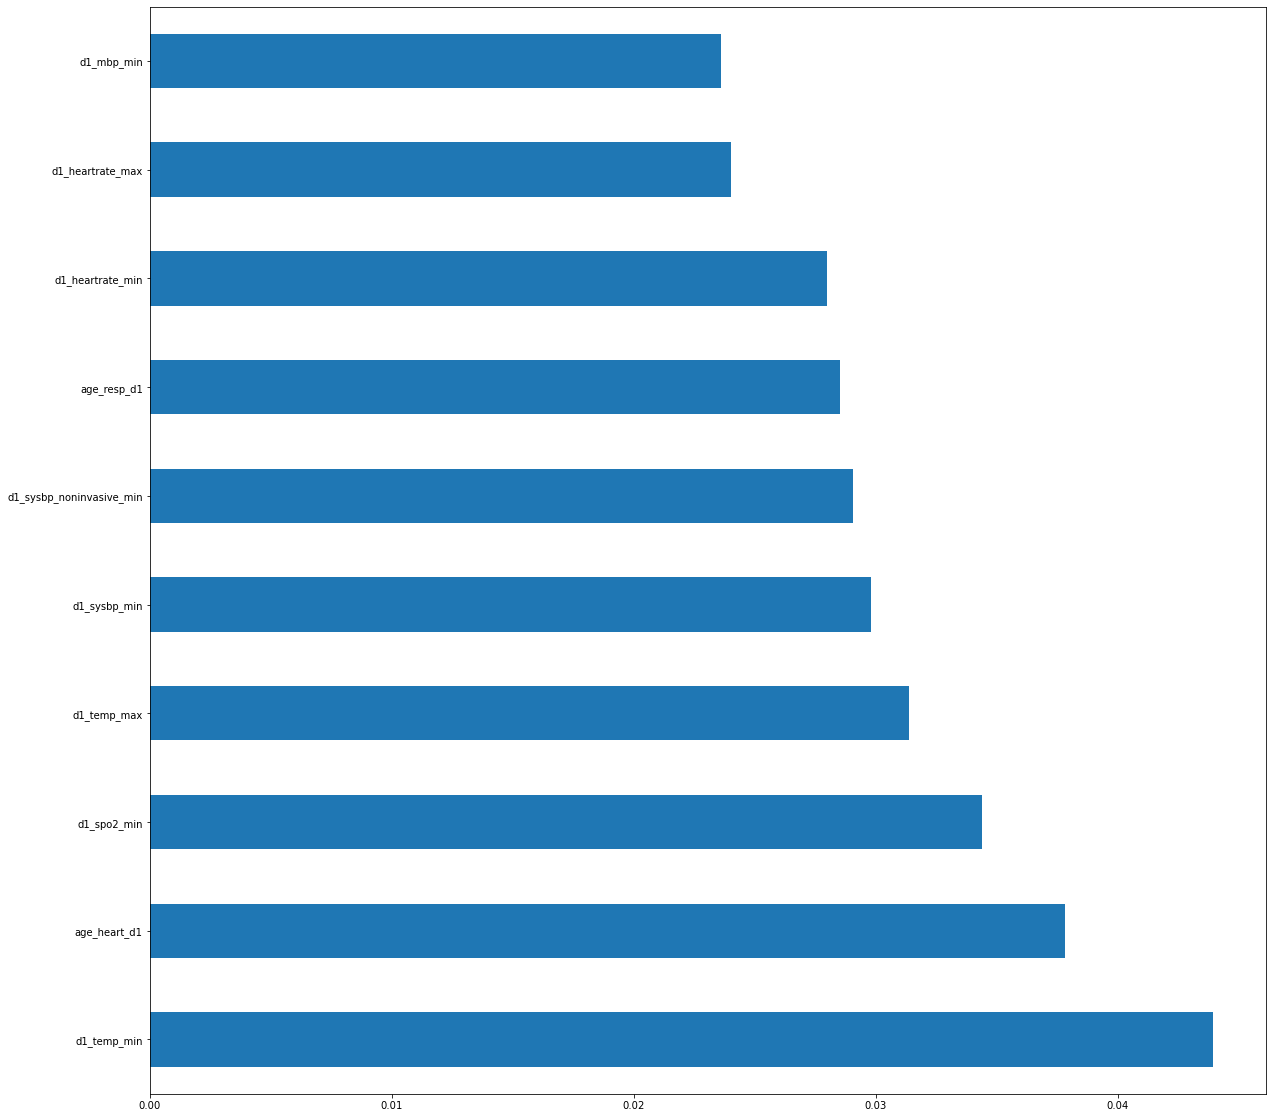

In [ ]:
rfc.fit(xr,Yr)
fig = plt.figure(figsize=(20,20))
feature_importances_2 = pd.Series(rfc.feature_importances_,index=xr.columns)
feature_importances_2.nlargest(10).plot(kind='barh')
plt.show()

For the first random forest hospital death probability and ICU death probability clearly had the most effect on the decision trees. These are scores that are a function of various other medical stats, they are used to determine the degree of care necessary for medical patients in both ICU's and hospitals in general. According to this random forest model they are effective.

Looking at both of these we see a few clear commonalities. Both top 10 have the interaction variables that were added to the features, that is, age multiplied by max heart rate for the first day in the ICU, and age multiplied by max respiration rate for the first day in the ICU. Given that age, max resprate, and max heartrate are higher on average for deceased patients, we could infer that older people are at a higher risk if their heartrate or respiration rate becomes elevated, this is also rather intuitive.

Other important features that the models have in common here are day 1 minimum temperature, day 1 minimum oxygen levels, and day 1 minimum systolic blood pressure. Let's look at some of the means here to get a sense of what the average differences are for deceased and non deceased patients.

In [ ]:
avg_min_temp_deceased = data.loc[data['hospital_death']==1].d1_temp_min.mean()
avg_min_temp_survived = data.loc[data['hospital_death']==0].d1_temp_min.mean()
avg_min_spo2_deceased = data.loc[data['hospital_death']==1].d1_spo2_min.dropna().mean()
avg_min_spo2_survived = data.loc[data['hospital_death']==0].d1_spo2_min.dropna().mean()
avg_min_sysbp_deceased = data.loc[data['hospital_death']==1].d1_sysbp_min.dropna().mean()
avg_min_sysbp_survived = data.loc[data['hospital_death']==0].d1_sysbp_min.dropna().mean()

In [ ]:
print('average min temp for deceased patients was {}C, and {}C for non deceased patients'.format(avg_min_temp_deceased,
                                                                                              avg_min_temp_survived))
print('average min blood oxygen levels for deceased patients were {}%, and {}% for non deceased patients'.format(
avg_min_spo2_deceased,avg_min_spo2_survived))
print('average min systolic blood pressure for deceased patients was {}mmHg, and {}mmHg for non deceased patients'.format(
avg_min_sysbp_deceased,avg_min_sysbp_survived))

average min temp for deceased patients was 35.761697785382175C, and 36.315453159831875C for non deceased patients
average min blood oxygen levels for deceased patients were 83.58792116973935%, and 91.10151469795845% for non deceased patients
average min systolic blood pressure for deceased patients was 82.76636225266363mmHg, and 98.25789410780447mmHg for non deceased patients


In summary this random forest model could be useful in assessing high death risk in ICU patients. Also temperature, blood oxygen levels, and systolic blood pressure are all good looking candidates for assesing mortality risk. The existing apache hospital and icu death probabilities were also validated by this random forest model.

Though useful, this model could stand to be trained on a set with either more rows, or more features. Perhaps this would help improve the recall rate, which is the main weak point.